In [109]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns 
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression as LR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import accuracy_score
from warnings import simplefilter
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn import tree
from sklearn import datasets
import random
import math
import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import random_split
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import numpy as np
import torch
from torch.utils.data import random_split
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import pairwise_distances
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import DBSCAN
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
from torch.utils.data import TensorDataset, DataLoader
from tqdm import tqdm

In [110]:
data = pd.read_csv("/content/abalone.csv",header = None)
data

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [111]:
data.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [112]:
data.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [113]:
label = LabelEncoder()
data[0] = label.fit_transform(data[0])
print(data)

      0      1      2      3       4       5       6       7   8
0     2  0.455  0.365  0.095  0.5140  0.2245  0.1010  0.1500  15
1     2  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.0700   7
2     0  0.530  0.420  0.135  0.6770  0.2565  0.1415  0.2100   9
3     2  0.440  0.365  0.125  0.5160  0.2155  0.1140  0.1550  10
4     1  0.330  0.255  0.080  0.2050  0.0895  0.0395  0.0550   7
...  ..    ...    ...    ...     ...     ...     ...     ...  ..
4172  0  0.565  0.450  0.165  0.8870  0.3700  0.2390  0.2490  11
4173  2  0.590  0.440  0.135  0.9660  0.4390  0.2145  0.2605  10
4174  2  0.600  0.475  0.205  1.1760  0.5255  0.2875  0.3080   9
4175  0  0.625  0.485  0.150  1.0945  0.5310  0.2610  0.2960  10
4176  2  0.710  0.555  0.195  1.9485  0.9455  0.3765  0.4950  12

[4177 rows x 9 columns]


In [114]:
print(data[8].value_counts())

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: 8, dtype: int64


In [115]:
count = 0
cumil_arr = []
for j in range(30):
  for i in range(len(data)):  
    if data.iloc[i,8] == j:
      count += 1
  cumil_arr.append(count)

In [116]:
print(cumil_arr)

[0, 1, 2, 17, 74, 189, 448, 839, 1407, 2096, 2730, 3217, 3484, 3687, 3813, 3916, 3983, 4041, 4083, 4115, 4141, 4155, 4161, 4170, 4172, 4173, 4174, 4176, 4176, 4177]


In [117]:
data[9] = data[8]
for i in range(len(data)):
  if data.iloc[i,8] <= 8:
    data.iloc[i,9] = 0
  elif data.iloc[i,8] <= 10:
    data.iloc[i,9] = 1
  else:
    data.iloc[i,9] = 2

In [118]:
data

,0,1,2,3,4,5,6,7,8,9
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,2
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,1
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0
...,...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,2
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,1
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,1
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1


In [119]:

print(data[9].value_counts())

2    1447
0    1407
1    1323
Name: 9, dtype: int64


In [120]:
Y = data[9].astype(int)
X = data.drop([8,9],axis = 'columns')
user_prompt = 0.35
user_enable = True
x_train,x_test,y_train,y_test = tts(X,Y,test_size=user_prompt,shuffle=user_enable,stratify = Y)

In [121]:
print(y_train.value_counts())
print(y_test.value_counts())

2    940
0    915
1    860
Name: 9, dtype: int64
2    507
0    492
1    463
Name: 9, dtype: int64


In [122]:
x_train = np.array(x_train)
y_train = np.array(y_train)


In [123]:
x_test = np.array(x_test)
y_test = np.array(y_test)

In [124]:
# Define the network
class MyNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MyNet, self).__init__()
        self.hidden1 = nn.Linear(input_size, hidden_size)
        self.hidden2 = nn.Linear(input_size, hidden_size)
        self.output = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        x1 = self.hidden1(x)
        x1 = nn.functional.tanh(x1)
        
        x2 = self.hidden2(x)
        x2 = nn.functional.tanh(x2)
        
        x = torch.add(x1,x2)
        x = self.output(x)
        x = nn.functional.softmax(x, dim=1)
        return x

In [125]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split


X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).long()
X_val = torch.from_numpy(X_val).float()
y_val = torch.from_numpy(y_val).long()
X_test = torch.from_numpy(x_test).float()
y_test = torch.from_numpy(y_test).long()

trainset = TensorDataset(X_train, y_train)
valset = TensorDataset(X_val, y_val)
testset = TensorDataset(X_train, y_train)

batch_size = 16
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)
valloader = DataLoader(valset, batch_size=batch_size, shuffle=True)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=True)

input_size = X_train.shape[1]
hidden_size = 32
num_classes = np.unique(y_train).shape[0]
learning_rate = 0.01
num_epochs = 1000

net = MyNet(input_size, hidden_size, num_classes)
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

criterion = nn.CrossEntropyLoss()



In [126]:
best_model = None
best_val_accuracy = 0.0
history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}

for epoch in range(num_epochs):
    train_loss = 0.0
    train_accuracy = 0.0
    valid_loss = 0.0
    valid_accuracy = 0.0

    net.train()

    for inputs, targets in tqdm(trainloader, desc=f"Epoch {epoch+1} Training"):
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        train_accuracy += (predicted == targets).sum().item()
    train_loss /= len(trainloader.dataset)
    train_accuracy /= len(trainloader.dataset)
    net.eval()
    for inputs, targets in tqdm(valloader, desc=f"Epoch {epoch+1} Validation"):
        outputs = net(inputs)
        loss = criterion(outputs, targets)
        valid_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        valid_accuracy += (predicted == targets).sum().item()
    valid_loss /= len(valloader.dataset)
    valid_accuracy /= len(valloader.dataset)
    print(f"Epoch {epoch+1} Training Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.4f}")
    print(f"Epoch {epoch+1} Validation Loss: {valid_loss:.4f}, Accuracy: {valid_accuracy:.4f}")
    if valid_accuracy > best_val_accuracy:
        best_val_accuracy = valid_accuracy
        best_model = net.state_dict()
    history['train_loss'].append(train_loss)
    history['train_acc'].append(train_accuracy)
    history['val_loss'].append(valid_loss)
    history['val_acc'].append(valid_accuracy)
net.load_state_dict(best_model)
print("Training complete!")


Epoch 1 Validation: 100%|██████████| 34/34 [00:00<00:00, 2131.98it/s]


Epoch 1 Training Loss: 0.9831, Accuracy: 0.5327
Epoch 1 Validation Loss: 0.9385, Accuracy: 0.5930


Epoch 2 Validation: 100%|██████████| 34/34 [00:00<00:00, 2287.45it/s]


Epoch 2 Training Loss: 0.9457, Accuracy: 0.5741
Epoch 2 Validation Loss: 0.9224, Accuracy: 0.5967


Epoch 3 Validation: 100%|██████████| 34/34 [00:00<00:00, 2064.63it/s]


Epoch 3 Training Loss: 0.9319, Accuracy: 0.5921
Epoch 3 Validation Loss: 0.9171, Accuracy: 0.6133


Epoch 4 Validation: 100%|██████████| 34/34 [00:00<00:00, 2095.24it/s]


Epoch 4 Training Loss: 0.9214, Accuracy: 0.5953
Epoch 4 Validation Loss: 0.9138, Accuracy: 0.6133


Epoch 5 Validation: 100%|██████████| 34/34 [00:00<00:00, 2168.88it/s]


Epoch 5 Training Loss: 0.9196, Accuracy: 0.6064
Epoch 5 Validation Loss: 0.9253, Accuracy: 0.5967


Epoch 6 Validation: 100%|██████████| 34/34 [00:00<00:00, 1673.14it/s]


Epoch 6 Training Loss: 0.9126, Accuracy: 0.6169
Epoch 6 Validation Loss: 0.9041, Accuracy: 0.6317


Epoch 7 Validation: 100%|██████████| 34/34 [00:00<00:00, 2111.81it/s]


Epoch 7 Training Loss: 0.9147, Accuracy: 0.6073
Epoch 7 Validation Loss: 0.9103, Accuracy: 0.6335


Epoch 8 Validation: 100%|██████████| 34/34 [00:00<00:00, 2110.59it/s]


Epoch 8 Training Loss: 0.8979, Accuracy: 0.6381
Epoch 8 Validation Loss: 0.9012, Accuracy: 0.6243


Epoch 9 Validation: 100%|██████████| 34/34 [00:00<00:00, 1891.18it/s]


Epoch 9 Training Loss: 0.9027, Accuracy: 0.6331
Epoch 9 Validation Loss: 0.9357, Accuracy: 0.5820


Epoch 10 Validation: 100%|██████████| 34/34 [00:00<00:00, 2053.51it/s]


Epoch 10 Training Loss: 0.8965, Accuracy: 0.6349
Epoch 10 Validation Loss: 0.9059, Accuracy: 0.6022


Epoch 11 Validation: 100%|██████████| 34/34 [00:00<00:00, 2090.60it/s]


Epoch 11 Training Loss: 0.8958, Accuracy: 0.6308
Epoch 11 Validation Loss: 0.8962, Accuracy: 0.6317


Epoch 12 Validation: 100%|██████████| 34/34 [00:00<00:00, 2197.83it/s]


Epoch 12 Training Loss: 0.9105, Accuracy: 0.6202
Epoch 12 Validation Loss: 0.8997, Accuracy: 0.6280


Epoch 13 Validation: 100%|██████████| 34/34 [00:00<00:00, 2406.86it/s]


Epoch 13 Training Loss: 0.8878, Accuracy: 0.6533
Epoch 13 Validation Loss: 0.9310, Accuracy: 0.5967


Epoch 14 Validation: 100%|██████████| 34/34 [00:00<00:00, 2067.87it/s]


Epoch 14 Training Loss: 0.8958, Accuracy: 0.6358
Epoch 14 Validation Loss: 0.9173, Accuracy: 0.6096


Epoch 15 Validation: 100%|██████████| 34/34 [00:00<00:00, 1995.97it/s]


Epoch 15 Training Loss: 0.8941, Accuracy: 0.6390
Epoch 15 Validation Loss: 0.9191, Accuracy: 0.6151


Epoch 16 Validation: 100%|██████████| 34/34 [00:00<00:00, 2323.87it/s]


Epoch 16 Training Loss: 0.8987, Accuracy: 0.6335
Epoch 16 Validation Loss: 0.9197, Accuracy: 0.6077


Epoch 17 Validation: 100%|██████████| 34/34 [00:00<00:00, 2156.58it/s]


Epoch 17 Training Loss: 0.8905, Accuracy: 0.6349
Epoch 17 Validation Loss: 0.9152, Accuracy: 0.6225


Epoch 18 Validation: 100%|██████████| 34/34 [00:00<00:00, 1979.05it/s]


Epoch 18 Training Loss: 0.8921, Accuracy: 0.6436
Epoch 18 Validation Loss: 0.8966, Accuracy: 0.6390


Epoch 19 Validation: 100%|██████████| 34/34 [00:00<00:00, 1697.61it/s]


Epoch 19 Training Loss: 0.8955, Accuracy: 0.6363
Epoch 19 Validation Loss: 0.9098, Accuracy: 0.6169


Epoch 20 Validation: 100%|██████████| 34/34 [00:00<00:00, 1882.67it/s]


Epoch 20 Training Loss: 0.8908, Accuracy: 0.6409
Epoch 20 Validation Loss: 0.8987, Accuracy: 0.6225


Epoch 21 Validation: 100%|██████████| 34/34 [00:00<00:00, 2106.57it/s]


Epoch 21 Training Loss: 0.8842, Accuracy: 0.6459
Epoch 21 Validation Loss: 0.9080, Accuracy: 0.6206


Epoch 22 Validation: 100%|██████████| 34/34 [00:00<00:00, 1950.17it/s]


Epoch 22 Training Loss: 0.8889, Accuracy: 0.6464
Epoch 22 Validation Loss: 0.9122, Accuracy: 0.6188


Epoch 23 Validation: 100%|██████████| 34/34 [00:00<00:00, 1992.01it/s]


Epoch 23 Training Loss: 0.8894, Accuracy: 0.6395
Epoch 23 Validation Loss: 0.8989, Accuracy: 0.6298


Epoch 24 Validation: 100%|██████████| 34/34 [00:00<00:00, 1996.28it/s]


Epoch 24 Training Loss: 0.8909, Accuracy: 0.6413
Epoch 24 Validation Loss: 0.8979, Accuracy: 0.6262


Epoch 25 Validation: 100%|██████████| 34/34 [00:00<00:00, 1885.55it/s]


Epoch 25 Training Loss: 0.8879, Accuracy: 0.6459
Epoch 25 Validation Loss: 0.8997, Accuracy: 0.6409


Epoch 26 Validation: 100%|██████████| 34/34 [00:00<00:00, 2111.81it/s]


Epoch 26 Training Loss: 0.8845, Accuracy: 0.6436
Epoch 26 Validation Loss: 0.9304, Accuracy: 0.6004


Epoch 27 Validation: 100%|██████████| 34/34 [00:00<00:00, 1312.88it/s]


Epoch 27 Training Loss: 0.8888, Accuracy: 0.6427
Epoch 27 Validation Loss: 0.9122, Accuracy: 0.6169


Epoch 28 Validation: 100%|██████████| 34/34 [00:00<00:00, 2013.10it/s]


Epoch 28 Training Loss: 0.8903, Accuracy: 0.6432
Epoch 28 Validation Loss: 0.9105, Accuracy: 0.6206


Epoch 29 Validation: 100%|██████████| 34/34 [00:00<00:00, 1984.64it/s]


Epoch 29 Training Loss: 0.8899, Accuracy: 0.6459
Epoch 29 Validation Loss: 0.9312, Accuracy: 0.5838


Epoch 30 Validation: 100%|██████████| 34/34 [00:00<00:00, 2180.89it/s]


Epoch 30 Training Loss: 0.8867, Accuracy: 0.6469
Epoch 30 Validation Loss: 0.9052, Accuracy: 0.6169


Epoch 31 Validation: 100%|██████████| 34/34 [00:00<00:00, 1810.46it/s]


Epoch 31 Training Loss: 0.8857, Accuracy: 0.6556
Epoch 31 Validation Loss: 0.8976, Accuracy: 0.6298


Epoch 32 Validation: 100%|██████████| 34/34 [00:00<00:00, 1958.64it/s]


Epoch 32 Training Loss: 0.8870, Accuracy: 0.6478
Epoch 32 Validation Loss: 0.9045, Accuracy: 0.6169


Epoch 33 Validation: 100%|██████████| 34/34 [00:00<00:00, 2014.50it/s]


Epoch 33 Training Loss: 0.8832, Accuracy: 0.6519
Epoch 33 Validation Loss: 0.9073, Accuracy: 0.6225


Epoch 34 Validation: 100%|██████████| 34/34 [00:00<00:00, 1965.22it/s]


Epoch 34 Training Loss: 0.8835, Accuracy: 0.6515
Epoch 34 Validation Loss: 0.8936, Accuracy: 0.6446


Epoch 35 Validation: 100%|██████████| 34/34 [00:00<00:00, 1955.87it/s]


Epoch 35 Training Loss: 0.8819, Accuracy: 0.6469
Epoch 35 Validation Loss: 0.9102, Accuracy: 0.6096


Epoch 36 Validation: 100%|██████████| 34/34 [00:00<00:00, 1947.64it/s]


Epoch 36 Training Loss: 0.8841, Accuracy: 0.6533
Epoch 36 Validation Loss: 0.8963, Accuracy: 0.6483


Epoch 37 Validation: 100%|██████████| 34/34 [00:00<00:00, 1968.59it/s]


Epoch 37 Training Loss: 0.8837, Accuracy: 0.6441
Epoch 37 Validation Loss: 0.8933, Accuracy: 0.6409


Epoch 38 Validation: 100%|██████████| 34/34 [00:00<00:00, 1832.19it/s]


Epoch 38 Training Loss: 0.8796, Accuracy: 0.6561
Epoch 38 Validation Loss: 0.8908, Accuracy: 0.6501


Epoch 39 Validation: 100%|██████████| 34/34 [00:00<00:00, 1961.60it/s]


Epoch 39 Training Loss: 0.8784, Accuracy: 0.6607
Epoch 39 Validation Loss: 0.9026, Accuracy: 0.6169


Epoch 40 Validation: 100%|██████████| 34/34 [00:00<00:00, 2124.14it/s]


Epoch 40 Training Loss: 0.8870, Accuracy: 0.6487
Epoch 40 Validation Loss: 0.9012, Accuracy: 0.6298


Epoch 41 Validation: 100%|██████████| 34/34 [00:00<00:00, 1945.01it/s]


Epoch 41 Training Loss: 0.8907, Accuracy: 0.6409
Epoch 41 Validation Loss: 0.9052, Accuracy: 0.6169


Epoch 42 Validation: 100%|██████████| 34/34 [00:00<00:00, 1585.92it/s]


Epoch 42 Training Loss: 0.8840, Accuracy: 0.6478
Epoch 42 Validation Loss: 0.8992, Accuracy: 0.6262


Epoch 43 Validation: 100%|██████████| 34/34 [00:00<00:00, 1336.00it/s]


Epoch 43 Training Loss: 0.8813, Accuracy: 0.6510
Epoch 43 Validation Loss: 0.8981, Accuracy: 0.6317


Epoch 44 Validation: 100%|██████████| 34/34 [00:00<00:00, 1699.45it/s]


Epoch 44 Training Loss: 0.8899, Accuracy: 0.6427
Epoch 44 Validation Loss: 0.8920, Accuracy: 0.6538


Epoch 45 Validation: 100%|██████████| 34/34 [00:00<00:00, 1749.71it/s]


Epoch 45 Training Loss: 0.8862, Accuracy: 0.6469
Epoch 45 Validation Loss: 0.9024, Accuracy: 0.6133


Epoch 46 Validation: 100%|██████████| 34/34 [00:00<00:00, 1693.68it/s]


Epoch 46 Training Loss: 0.8839, Accuracy: 0.6496
Epoch 46 Validation Loss: 0.8956, Accuracy: 0.6390


Epoch 47 Validation: 100%|██████████| 34/34 [00:00<00:00, 1726.11it/s]


Epoch 47 Training Loss: 0.8805, Accuracy: 0.6547
Epoch 47 Validation Loss: 0.8893, Accuracy: 0.6409


Epoch 48 Validation: 100%|██████████| 34/34 [00:00<00:00, 1737.32it/s]


Epoch 48 Training Loss: 0.8790, Accuracy: 0.6570
Epoch 48 Validation Loss: 0.8988, Accuracy: 0.6427


Epoch 49 Validation: 100%|██████████| 34/34 [00:00<00:00, 1755.00it/s]


Epoch 49 Training Loss: 0.8875, Accuracy: 0.6464
Epoch 49 Validation Loss: 0.8855, Accuracy: 0.6556


Epoch 50 Validation: 100%|██████████| 34/34 [00:00<00:00, 1519.89it/s]


Epoch 50 Training Loss: 0.8910, Accuracy: 0.6436
Epoch 50 Validation Loss: 0.9011, Accuracy: 0.6243


Epoch 51 Validation: 100%|██████████| 34/34 [00:00<00:00, 2100.67it/s]


Epoch 51 Training Loss: 0.8834, Accuracy: 0.6469
Epoch 51 Validation Loss: 0.9033, Accuracy: 0.6243


Epoch 52 Validation: 100%|██████████| 34/34 [00:00<00:00, 2122.40it/s]


Epoch 52 Training Loss: 0.8769, Accuracy: 0.6556
Epoch 52 Validation Loss: 0.8992, Accuracy: 0.6243


Epoch 53 Validation: 100%|██████████| 34/34 [00:00<00:00, 1987.38it/s]


Epoch 53 Training Loss: 0.8809, Accuracy: 0.6473
Epoch 53 Validation Loss: 0.8987, Accuracy: 0.6243


Epoch 54 Validation: 100%|██████████| 34/34 [00:00<00:00, 1985.36it/s]


Epoch 54 Training Loss: 0.8834, Accuracy: 0.6538
Epoch 54 Validation Loss: 0.9074, Accuracy: 0.6262


Epoch 55 Validation: 100%|██████████| 34/34 [00:00<00:00, 1869.09it/s]


Epoch 55 Training Loss: 0.8770, Accuracy: 0.6469
Epoch 55 Validation Loss: 0.9192, Accuracy: 0.6004


Epoch 56 Validation: 100%|██████████| 34/34 [00:00<00:00, 2097.65it/s]


Epoch 56 Training Loss: 0.8810, Accuracy: 0.6519
Epoch 56 Validation Loss: 0.8969, Accuracy: 0.6317


Epoch 57 Validation: 100%|██████████| 34/34 [00:00<00:00, 1688.77it/s]


Epoch 57 Training Loss: 0.8770, Accuracy: 0.6611
Epoch 57 Validation Loss: 0.9001, Accuracy: 0.6243


Epoch 58 Validation: 100%|██████████| 34/34 [00:00<00:00, 2257.93it/s]


Epoch 58 Training Loss: 0.8819, Accuracy: 0.6487
Epoch 58 Validation Loss: 0.8918, Accuracy: 0.6427


Epoch 59 Validation: 100%|██████████| 34/34 [00:00<00:00, 2191.38it/s]


Epoch 59 Training Loss: 0.8759, Accuracy: 0.6579
Epoch 59 Validation Loss: 0.8971, Accuracy: 0.6262


Epoch 60 Validation: 100%|██████████| 34/34 [00:00<00:00, 1686.39it/s]


Epoch 60 Training Loss: 0.8814, Accuracy: 0.6538
Epoch 60 Validation Loss: 0.8940, Accuracy: 0.6317


Epoch 61 Validation: 100%|██████████| 34/34 [00:00<00:00, 1843.10it/s]


Epoch 61 Training Loss: 0.8854, Accuracy: 0.6450
Epoch 61 Validation Loss: 0.9008, Accuracy: 0.6151


Epoch 62 Validation: 100%|██████████| 34/34 [00:00<00:00, 1722.61it/s]


Epoch 62 Training Loss: 0.8798, Accuracy: 0.6492
Epoch 62 Validation Loss: 0.8900, Accuracy: 0.6317


Epoch 63 Validation: 100%|██████████| 34/34 [00:00<00:00, 1947.14it/s]


Epoch 63 Training Loss: 0.8820, Accuracy: 0.6487
Epoch 63 Validation Loss: 0.8889, Accuracy: 0.6372


Epoch 64 Validation: 100%|██████████| 34/34 [00:00<00:00, 2081.12it/s]


Epoch 64 Training Loss: 0.8786, Accuracy: 0.6538
Epoch 64 Validation Loss: 0.9077, Accuracy: 0.6188


Epoch 65 Validation: 100%|██████████| 34/34 [00:00<00:00, 1932.31it/s]


Epoch 65 Training Loss: 0.8771, Accuracy: 0.6593
Epoch 65 Validation Loss: 0.8898, Accuracy: 0.6390


Epoch 66 Validation: 100%|██████████| 34/34 [00:00<00:00, 2002.76it/s]


Epoch 66 Training Loss: 0.8868, Accuracy: 0.6432
Epoch 66 Validation Loss: 0.8968, Accuracy: 0.6427


Epoch 67 Validation: 100%|██████████| 34/34 [00:00<00:00, 2092.11it/s]


Epoch 67 Training Loss: 0.8815, Accuracy: 0.6506
Epoch 67 Validation Loss: 0.8815, Accuracy: 0.6575


Epoch 68 Validation: 100%|██████████| 34/34 [00:00<00:00, 2189.09it/s]


Epoch 68 Training Loss: 0.8852, Accuracy: 0.6487
Epoch 68 Validation Loss: 0.8874, Accuracy: 0.6519


Epoch 69 Validation: 100%|██████████| 34/34 [00:00<00:00, 2100.15it/s]


Epoch 69 Training Loss: 0.8887, Accuracy: 0.6459
Epoch 69 Validation Loss: 0.8988, Accuracy: 0.6317


Epoch 70 Validation: 100%|██████████| 34/34 [00:00<00:00, 2015.38it/s]


Epoch 70 Training Loss: 0.8749, Accuracy: 0.6607
Epoch 70 Validation Loss: 0.9004, Accuracy: 0.6335


Epoch 71 Validation: 100%|██████████| 34/34 [00:00<00:00, 1781.69it/s]


Epoch 71 Training Loss: 0.8814, Accuracy: 0.6515
Epoch 71 Validation Loss: 0.9081, Accuracy: 0.6169


Epoch 72 Validation: 100%|██████████| 34/34 [00:00<00:00, 2196.51it/s]


Epoch 72 Training Loss: 0.8784, Accuracy: 0.6565
Epoch 72 Validation Loss: 0.8900, Accuracy: 0.6354


Epoch 73 Validation: 100%|██████████| 34/34 [00:00<00:00, 1846.97it/s]


Epoch 73 Training Loss: 0.8745, Accuracy: 0.6556
Epoch 73 Validation Loss: 0.8926, Accuracy: 0.6427


Epoch 74 Validation: 100%|██████████| 34/34 [00:00<00:00, 2325.00it/s]


Epoch 74 Training Loss: 0.8828, Accuracy: 0.6483
Epoch 74 Validation Loss: 0.8935, Accuracy: 0.6372


Epoch 75 Validation: 100%|██████████| 34/34 [00:00<00:00, 2040.18it/s]


Epoch 75 Training Loss: 0.8747, Accuracy: 0.6538
Epoch 75 Validation Loss: 0.8975, Accuracy: 0.6169


Epoch 76 Validation: 100%|██████████| 34/34 [00:00<00:00, 1910.13it/s]


Epoch 76 Training Loss: 0.8779, Accuracy: 0.6524
Epoch 76 Validation Loss: 0.8849, Accuracy: 0.6390


Epoch 77 Validation: 100%|██████████| 34/34 [00:00<00:00, 1950.23it/s]


Epoch 77 Training Loss: 0.8732, Accuracy: 0.6565
Epoch 77 Validation Loss: 0.8835, Accuracy: 0.6464


Epoch 78 Validation: 100%|██████████| 34/34 [00:00<00:00, 2200.51it/s]


Epoch 78 Training Loss: 0.8747, Accuracy: 0.6538
Epoch 78 Validation Loss: 0.8850, Accuracy: 0.6630


Epoch 79 Validation: 100%|██████████| 34/34 [00:00<00:00, 1737.77it/s]


Epoch 79 Training Loss: 0.8776, Accuracy: 0.6501
Epoch 79 Validation Loss: 0.9170, Accuracy: 0.6188


Epoch 80 Validation: 100%|██████████| 34/34 [00:00<00:00, 1970.41it/s]


Epoch 80 Training Loss: 0.8746, Accuracy: 0.6584
Epoch 80 Validation Loss: 0.8794, Accuracy: 0.6593


Epoch 81 Validation: 100%|██████████| 34/34 [00:00<00:00, 1989.15it/s]


Epoch 81 Training Loss: 0.8775, Accuracy: 0.6625
Epoch 81 Validation Loss: 0.8848, Accuracy: 0.6427


Epoch 82 Validation: 100%|██████████| 34/34 [00:00<00:00, 1770.41it/s]


Epoch 82 Training Loss: 0.8728, Accuracy: 0.6667
Epoch 82 Validation Loss: 0.8957, Accuracy: 0.6390


Epoch 83 Validation: 100%|██████████| 34/34 [00:00<00:00, 1990.96it/s]


Epoch 83 Training Loss: 0.8743, Accuracy: 0.6570
Epoch 83 Validation Loss: 0.8837, Accuracy: 0.6483


Epoch 84 Validation: 100%|██████████| 34/34 [00:00<00:00, 1722.13it/s]


Epoch 84 Training Loss: 0.8747, Accuracy: 0.6621
Epoch 84 Validation Loss: 0.8948, Accuracy: 0.6243


Epoch 85 Validation: 100%|██████████| 34/34 [00:00<00:00, 2077.78it/s]


Epoch 85 Training Loss: 0.8732, Accuracy: 0.6616
Epoch 85 Validation Loss: 0.8951, Accuracy: 0.6262


Epoch 86 Validation: 100%|██████████| 34/34 [00:00<00:00, 2155.97it/s]


Epoch 86 Training Loss: 0.8731, Accuracy: 0.6680
Epoch 86 Validation Loss: 0.8844, Accuracy: 0.6446


Epoch 87 Validation: 100%|██████████| 34/34 [00:00<00:00, 2010.10it/s]


Epoch 87 Training Loss: 0.8765, Accuracy: 0.6598
Epoch 87 Validation Loss: 0.8879, Accuracy: 0.6464


Epoch 88 Validation: 100%|██████████| 34/34 [00:00<00:00, 1813.80it/s]


Epoch 88 Training Loss: 0.8733, Accuracy: 0.6598
Epoch 88 Validation Loss: 0.8783, Accuracy: 0.6556


Epoch 89 Validation: 100%|██████████| 34/34 [00:00<00:00, 2038.95it/s]


Epoch 89 Training Loss: 0.8730, Accuracy: 0.6676
Epoch 89 Validation Loss: 0.8885, Accuracy: 0.6446


Epoch 90 Validation: 100%|██████████| 34/34 [00:00<00:00, 2176.93it/s]


Epoch 90 Training Loss: 0.8728, Accuracy: 0.6575
Epoch 90 Validation Loss: 0.9007, Accuracy: 0.6280


Epoch 91 Validation: 100%|██████████| 34/34 [00:00<00:00, 1944.48it/s]


Epoch 91 Training Loss: 0.8768, Accuracy: 0.6579
Epoch 91 Validation Loss: 0.8982, Accuracy: 0.6372


Epoch 92 Validation: 100%|██████████| 34/34 [00:00<00:00, 2059.15it/s]


Epoch 92 Training Loss: 0.8734, Accuracy: 0.6625
Epoch 92 Validation Loss: 0.8806, Accuracy: 0.6483


Epoch 93 Validation: 100%|██████████| 34/34 [00:00<00:00, 1984.64it/s]


Epoch 93 Training Loss: 0.8686, Accuracy: 0.6694
Epoch 93 Validation Loss: 0.8891, Accuracy: 0.6427


Epoch 94 Validation: 100%|██████████| 34/34 [00:00<00:00, 1773.69it/s]


Epoch 94 Training Loss: 0.8733, Accuracy: 0.6602
Epoch 94 Validation Loss: 0.9036, Accuracy: 0.6243


Epoch 95 Validation: 100%|██████████| 34/34 [00:00<00:00, 1447.05it/s]


Epoch 95 Training Loss: 0.8768, Accuracy: 0.6565
Epoch 95 Validation Loss: 0.8847, Accuracy: 0.6483


Epoch 96 Validation: 100%|██████████| 34/34 [00:00<00:00, 1847.69it/s]


Epoch 96 Training Loss: 0.8744, Accuracy: 0.6653
Epoch 96 Validation Loss: 0.8953, Accuracy: 0.6206


Epoch 97 Validation: 100%|██████████| 34/34 [00:00<00:00, 1538.70it/s]


Epoch 97 Training Loss: 0.8721, Accuracy: 0.6607
Epoch 97 Validation Loss: 0.8884, Accuracy: 0.6372


Epoch 98 Validation: 100%|██████████| 34/34 [00:00<00:00, 1904.16it/s]


Epoch 98 Training Loss: 0.8772, Accuracy: 0.6565
Epoch 98 Validation Loss: 0.9074, Accuracy: 0.6188


Epoch 99 Validation: 100%|██████████| 34/34 [00:00<00:00, 2050.68it/s]


Epoch 99 Training Loss: 0.8733, Accuracy: 0.6648
Epoch 99 Validation Loss: 0.9200, Accuracy: 0.6077


Epoch 100 Validation: 100%|██████████| 34/34 [00:00<00:00, 1909.03it/s]


Epoch 100 Training Loss: 0.8803, Accuracy: 0.6584
Epoch 100 Validation Loss: 0.9119, Accuracy: 0.6041


Epoch 101 Validation: 100%|██████████| 34/34 [00:00<00:00, 1951.03it/s]


Epoch 101 Training Loss: 0.8782, Accuracy: 0.6538
Epoch 101 Validation Loss: 0.8889, Accuracy: 0.6446


Epoch 102 Validation: 100%|██████████| 34/34 [00:00<00:00, 2096.69it/s]


Epoch 102 Training Loss: 0.8766, Accuracy: 0.6579
Epoch 102 Validation Loss: 0.8861, Accuracy: 0.6464


Epoch 103 Validation: 100%|██████████| 34/34 [00:00<00:00, 1954.31it/s]


Epoch 103 Training Loss: 0.8722, Accuracy: 0.6685
Epoch 103 Validation Loss: 0.8854, Accuracy: 0.6372


Epoch 104 Validation: 100%|██████████| 34/34 [00:00<00:00, 1553.58it/s]


Epoch 104 Training Loss: 0.8768, Accuracy: 0.6602
Epoch 104 Validation Loss: 0.8795, Accuracy: 0.6483


Epoch 105 Validation: 100%|██████████| 34/34 [00:00<00:00, 1386.80it/s]


Epoch 105 Training Loss: 0.8757, Accuracy: 0.6584
Epoch 105 Validation Loss: 0.8827, Accuracy: 0.6501


Epoch 106 Validation: 100%|██████████| 34/34 [00:00<00:00, 1787.70it/s]


Epoch 106 Training Loss: 0.8743, Accuracy: 0.6630
Epoch 106 Validation Loss: 0.8929, Accuracy: 0.6280


Epoch 107 Validation: 100%|██████████| 34/34 [00:00<00:00, 1554.26it/s]


Epoch 107 Training Loss: 0.8707, Accuracy: 0.6653
Epoch 107 Validation Loss: 0.8903, Accuracy: 0.6298


Epoch 108 Validation: 100%|██████████| 34/34 [00:00<00:00, 1484.66it/s]


Epoch 108 Training Loss: 0.8738, Accuracy: 0.6621
Epoch 108 Validation Loss: 0.8829, Accuracy: 0.6446


Epoch 109 Validation: 100%|██████████| 34/34 [00:00<00:00, 1569.67it/s]


Epoch 109 Training Loss: 0.8730, Accuracy: 0.6602
Epoch 109 Validation Loss: 0.9085, Accuracy: 0.6206


Epoch 110 Validation: 100%|██████████| 34/34 [00:00<00:00, 1446.74it/s]


Epoch 110 Training Loss: 0.8715, Accuracy: 0.6625
Epoch 110 Validation Loss: 0.8941, Accuracy: 0.6317


Epoch 111 Validation: 100%|██████████| 34/34 [00:00<00:00, 1550.22it/s]


Epoch 111 Training Loss: 0.8718, Accuracy: 0.6602
Epoch 111 Validation Loss: 0.8871, Accuracy: 0.6298


Epoch 112 Validation: 100%|██████████| 34/34 [00:00<00:00, 1654.44it/s]


Epoch 112 Training Loss: 0.8734, Accuracy: 0.6570
Epoch 112 Validation Loss: 0.8845, Accuracy: 0.6464


Epoch 113 Validation: 100%|██████████| 34/34 [00:00<00:00, 1949.08it/s]


Epoch 113 Training Loss: 0.8724, Accuracy: 0.6616
Epoch 113 Validation Loss: 0.8873, Accuracy: 0.6354


Epoch 114 Validation: 100%|██████████| 34/34 [00:00<00:00, 1895.93it/s]


Epoch 114 Training Loss: 0.8690, Accuracy: 0.6676
Epoch 114 Validation Loss: 0.8991, Accuracy: 0.6206


Epoch 115 Validation: 100%|██████████| 34/34 [00:00<00:00, 1758.86it/s]


Epoch 115 Training Loss: 0.8711, Accuracy: 0.6657
Epoch 115 Validation Loss: 0.9040, Accuracy: 0.6188


Epoch 116 Validation: 100%|██████████| 34/34 [00:00<00:00, 1978.69it/s]


Epoch 116 Training Loss: 0.8702, Accuracy: 0.6703
Epoch 116 Validation Loss: 0.8952, Accuracy: 0.6262


Epoch 117 Validation: 100%|██████████| 34/34 [00:00<00:00, 1843.67it/s]


Epoch 117 Training Loss: 0.8688, Accuracy: 0.6634
Epoch 117 Validation Loss: 0.9044, Accuracy: 0.6188


Epoch 118 Validation: 100%|██████████| 34/34 [00:00<00:00, 1693.60it/s]


Epoch 118 Training Loss: 0.8732, Accuracy: 0.6621
Epoch 118 Validation Loss: 0.8824, Accuracy: 0.6464


Epoch 119 Validation: 100%|██████████| 34/34 [00:00<00:00, 1851.04it/s]


Epoch 119 Training Loss: 0.8735, Accuracy: 0.6588
Epoch 119 Validation Loss: 0.8902, Accuracy: 0.6317


Epoch 120 Validation: 100%|██████████| 34/34 [00:00<00:00, 1900.35it/s]


Epoch 120 Training Loss: 0.8677, Accuracy: 0.6694
Epoch 120 Validation Loss: 0.8919, Accuracy: 0.6317


Epoch 121 Validation: 100%|██████████| 34/34 [00:00<00:00, 2054.43it/s]


Epoch 121 Training Loss: 0.8675, Accuracy: 0.6685
Epoch 121 Validation Loss: 0.8853, Accuracy: 0.6372


Epoch 122 Validation: 100%|██████████| 34/34 [00:00<00:00, 2178.83it/s]


Epoch 122 Training Loss: 0.8718, Accuracy: 0.6634
Epoch 122 Validation Loss: 0.8809, Accuracy: 0.6501


Epoch 123 Validation: 100%|██████████| 34/34 [00:00<00:00, 1761.66it/s]


Epoch 123 Training Loss: 0.8681, Accuracy: 0.6671
Epoch 123 Validation Loss: 0.8852, Accuracy: 0.6390


Epoch 124 Validation: 100%|██████████| 34/34 [00:00<00:00, 1883.49it/s]


Epoch 124 Training Loss: 0.8703, Accuracy: 0.6703
Epoch 124 Validation Loss: 0.8831, Accuracy: 0.6538


Epoch 125 Validation: 100%|██████████| 34/34 [00:00<00:00, 1491.95it/s]


Epoch 125 Training Loss: 0.8738, Accuracy: 0.6611
Epoch 125 Validation Loss: 0.8990, Accuracy: 0.6243


Epoch 126 Validation: 100%|██████████| 34/34 [00:00<00:00, 1845.25it/s]


Epoch 126 Training Loss: 0.8680, Accuracy: 0.6754
Epoch 126 Validation Loss: 0.8925, Accuracy: 0.6317


Epoch 127 Validation: 100%|██████████| 34/34 [00:00<00:00, 1702.44it/s]


Epoch 127 Training Loss: 0.8720, Accuracy: 0.6653
Epoch 127 Validation Loss: 0.8819, Accuracy: 0.6372


Epoch 128 Validation: 100%|██████████| 34/34 [00:00<00:00, 1817.17it/s]


Epoch 128 Training Loss: 0.8745, Accuracy: 0.6593
Epoch 128 Validation Loss: 0.8971, Accuracy: 0.6243


Epoch 129 Validation: 100%|██████████| 34/34 [00:00<00:00, 1802.02it/s]


Epoch 129 Training Loss: 0.8702, Accuracy: 0.6662
Epoch 129 Validation Loss: 0.8864, Accuracy: 0.6427


Epoch 130 Validation: 100%|██████████| 34/34 [00:00<00:00, 2061.23it/s]


Epoch 130 Training Loss: 0.8704, Accuracy: 0.6690
Epoch 130 Validation Loss: 0.8945, Accuracy: 0.6206


Epoch 131 Validation: 100%|██████████| 34/34 [00:00<00:00, 1851.91it/s]


Epoch 131 Training Loss: 0.8752, Accuracy: 0.6579
Epoch 131 Validation Loss: 0.8826, Accuracy: 0.6446


Epoch 132 Validation: 100%|██████████| 34/34 [00:00<00:00, 1944.19it/s]


Epoch 132 Training Loss: 0.8683, Accuracy: 0.6690
Epoch 132 Validation Loss: 0.8851, Accuracy: 0.6446


Epoch 133 Validation: 100%|██████████| 34/34 [00:00<00:00, 2050.62it/s]


Epoch 133 Training Loss: 0.8731, Accuracy: 0.6630
Epoch 133 Validation Loss: 0.8838, Accuracy: 0.6575


Epoch 134 Validation: 100%|██████████| 34/34 [00:00<00:00, 2276.20it/s]


Epoch 134 Training Loss: 0.8702, Accuracy: 0.6657
Epoch 134 Validation Loss: 0.8982, Accuracy: 0.6317


Epoch 135 Validation: 100%|██████████| 34/34 [00:00<00:00, 1691.49it/s]


Epoch 135 Training Loss: 0.8735, Accuracy: 0.6625
Epoch 135 Validation Loss: 0.8936, Accuracy: 0.6298


Epoch 136 Validation: 100%|██████████| 34/34 [00:00<00:00, 1754.83it/s]


Epoch 136 Training Loss: 0.8723, Accuracy: 0.6607
Epoch 136 Validation Loss: 0.8745, Accuracy: 0.6575


Epoch 137 Validation: 100%|██████████| 34/34 [00:00<00:00, 2100.86it/s]


Epoch 137 Training Loss: 0.8676, Accuracy: 0.6680
Epoch 137 Validation Loss: 0.8895, Accuracy: 0.6298


Epoch 138 Validation: 100%|██████████| 34/34 [00:00<00:00, 1801.90it/s]


Epoch 138 Training Loss: 0.8717, Accuracy: 0.6598
Epoch 138 Validation Loss: 0.8862, Accuracy: 0.6427


Epoch 139 Validation: 100%|██████████| 34/34 [00:00<00:00, 1778.58it/s]


Epoch 139 Training Loss: 0.8660, Accuracy: 0.6717
Epoch 139 Validation Loss: 0.8884, Accuracy: 0.6262


Epoch 140 Validation: 100%|██████████| 34/34 [00:00<00:00, 1981.74it/s]


Epoch 140 Training Loss: 0.8654, Accuracy: 0.6676
Epoch 140 Validation Loss: 0.8807, Accuracy: 0.6611


Epoch 141 Validation: 100%|██████████| 34/34 [00:00<00:00, 1655.75it/s]


Epoch 141 Training Loss: 0.8667, Accuracy: 0.6680
Epoch 141 Validation Loss: 0.8994, Accuracy: 0.6188


Epoch 142 Validation: 100%|██████████| 34/34 [00:00<00:00, 1695.60it/s]


Epoch 142 Training Loss: 0.8717, Accuracy: 0.6579
Epoch 142 Validation Loss: 0.8832, Accuracy: 0.6372


Epoch 143 Validation: 100%|██████████| 34/34 [00:00<00:00, 2019.63it/s]


Epoch 143 Training Loss: 0.8706, Accuracy: 0.6648
Epoch 143 Validation Loss: 0.8796, Accuracy: 0.6519


Epoch 144 Validation: 100%|██████████| 34/34 [00:00<00:00, 1629.77it/s]


Epoch 144 Training Loss: 0.8677, Accuracy: 0.6671
Epoch 144 Validation Loss: 0.8942, Accuracy: 0.6262


Epoch 145 Validation: 100%|██████████| 34/34 [00:00<00:00, 1765.48it/s]


Epoch 145 Training Loss: 0.8708, Accuracy: 0.6630
Epoch 145 Validation Loss: 0.8877, Accuracy: 0.6335


Epoch 146 Validation: 100%|██████████| 34/34 [00:00<00:00, 1633.28it/s]


Epoch 146 Training Loss: 0.8701, Accuracy: 0.6644
Epoch 146 Validation Loss: 0.8846, Accuracy: 0.6427


Epoch 147 Validation: 100%|██████████| 34/34 [00:00<00:00, 1852.78it/s]


Epoch 147 Training Loss: 0.8740, Accuracy: 0.6611
Epoch 147 Validation Loss: 0.8910, Accuracy: 0.6335


Epoch 148 Validation: 100%|██████████| 34/34 [00:00<00:00, 1880.56it/s]


Epoch 148 Training Loss: 0.8700, Accuracy: 0.6717
Epoch 148 Validation Loss: 0.8910, Accuracy: 0.6372


Epoch 149 Validation: 100%|██████████| 34/34 [00:00<00:00, 1914.82it/s]


Epoch 149 Training Loss: 0.8703, Accuracy: 0.6648
Epoch 149 Validation Loss: 0.8961, Accuracy: 0.6372


Epoch 150 Validation: 100%|██████████| 34/34 [00:00<00:00, 1766.13it/s]


Epoch 150 Training Loss: 0.8697, Accuracy: 0.6671
Epoch 150 Validation Loss: 0.8925, Accuracy: 0.6317


Epoch 151 Validation: 100%|██████████| 34/34 [00:00<00:00, 2260.08it/s]


Epoch 151 Training Loss: 0.8741, Accuracy: 0.6561
Epoch 151 Validation Loss: 0.8805, Accuracy: 0.6519


Epoch 152 Validation: 100%|██████████| 34/34 [00:00<00:00, 2297.14it/s]


Epoch 152 Training Loss: 0.8685, Accuracy: 0.6676
Epoch 152 Validation Loss: 0.8851, Accuracy: 0.6390


Epoch 153 Validation: 100%|██████████| 34/34 [00:00<00:00, 2044.24it/s]


Epoch 153 Training Loss: 0.8673, Accuracy: 0.6690
Epoch 153 Validation Loss: 0.8828, Accuracy: 0.6427


Epoch 154 Validation: 100%|██████████| 34/34 [00:00<00:00, 1628.89it/s]


Epoch 154 Training Loss: 0.8667, Accuracy: 0.6690
Epoch 154 Validation Loss: 0.8798, Accuracy: 0.6593


Epoch 155 Validation: 100%|██████████| 34/34 [00:00<00:00, 1607.28it/s]


Epoch 155 Training Loss: 0.8732, Accuracy: 0.6616
Epoch 155 Validation Loss: 0.8848, Accuracy: 0.6556


Epoch 156 Validation: 100%|██████████| 34/34 [00:00<00:00, 2085.31it/s]


Epoch 156 Training Loss: 0.8686, Accuracy: 0.6750
Epoch 156 Validation Loss: 0.8824, Accuracy: 0.6464


Epoch 157 Validation: 100%|██████████| 34/34 [00:00<00:00, 1981.33it/s]


Epoch 157 Training Loss: 0.8717, Accuracy: 0.6630
Epoch 157 Validation Loss: 0.8871, Accuracy: 0.6317


Epoch 158 Validation: 100%|██████████| 34/34 [00:00<00:00, 1615.99it/s]


Epoch 158 Training Loss: 0.8724, Accuracy: 0.6598
Epoch 158 Validation Loss: 0.8870, Accuracy: 0.6575


Epoch 159 Validation: 100%|██████████| 34/34 [00:00<00:00, 1761.27it/s]


Epoch 159 Training Loss: 0.8721, Accuracy: 0.6680
Epoch 159 Validation Loss: 0.8862, Accuracy: 0.6446


Epoch 160 Validation: 100%|██████████| 34/34 [00:00<00:00, 1557.99it/s]


Epoch 160 Training Loss: 0.8675, Accuracy: 0.6685
Epoch 160 Validation Loss: 0.9004, Accuracy: 0.6225


Epoch 161 Validation: 100%|██████████| 34/34 [00:00<00:00, 2162.41it/s]


Epoch 161 Training Loss: 0.8682, Accuracy: 0.6680
Epoch 161 Validation Loss: 0.8886, Accuracy: 0.6390


Epoch 162 Validation: 100%|██████████| 34/34 [00:00<00:00, 1732.38it/s]


Epoch 162 Training Loss: 0.8679, Accuracy: 0.6736
Epoch 162 Validation Loss: 0.8909, Accuracy: 0.6427


Epoch 163 Validation: 100%|██████████| 34/34 [00:00<00:00, 1744.38it/s]


Epoch 163 Training Loss: 0.8705, Accuracy: 0.6565
Epoch 163 Validation Loss: 0.8818, Accuracy: 0.6464


Epoch 164 Validation: 100%|██████████| 34/34 [00:00<00:00, 1244.22it/s]


Epoch 164 Training Loss: 0.8710, Accuracy: 0.6667
Epoch 164 Validation Loss: 0.8877, Accuracy: 0.6427


Epoch 165 Validation: 100%|██████████| 34/34 [00:00<00:00, 1423.60it/s]


Epoch 165 Training Loss: 0.8702, Accuracy: 0.6690
Epoch 165 Validation Loss: 0.9007, Accuracy: 0.6243


Epoch 166 Validation: 100%|██████████| 34/34 [00:00<00:00, 1710.85it/s]


Epoch 166 Training Loss: 0.8696, Accuracy: 0.6676
Epoch 166 Validation Loss: 0.9070, Accuracy: 0.6298


Epoch 167 Validation: 100%|██████████| 34/34 [00:00<00:00, 1538.45it/s]


Epoch 167 Training Loss: 0.8716, Accuracy: 0.6644
Epoch 167 Validation Loss: 0.8792, Accuracy: 0.6556


Epoch 168 Validation: 100%|██████████| 34/34 [00:00<00:00, 1548.08it/s]


Epoch 168 Training Loss: 0.8673, Accuracy: 0.6680
Epoch 168 Validation Loss: 0.8786, Accuracy: 0.6464


Epoch 169 Validation: 100%|██████████| 34/34 [00:00<00:00, 1765.89it/s]


Epoch 169 Training Loss: 0.8668, Accuracy: 0.6708
Epoch 169 Validation Loss: 0.8889, Accuracy: 0.6372


Epoch 170 Validation: 100%|██████████| 34/34 [00:00<00:00, 1770.08it/s]


Epoch 170 Training Loss: 0.8689, Accuracy: 0.6690
Epoch 170 Validation Loss: 0.8987, Accuracy: 0.6188


Epoch 171 Validation: 100%|██████████| 34/34 [00:00<00:00, 1808.00it/s]


Epoch 171 Training Loss: 0.8762, Accuracy: 0.6570
Epoch 171 Validation Loss: 0.8906, Accuracy: 0.6335


Epoch 172 Validation: 100%|██████████| 34/34 [00:00<00:00, 1598.55it/s]


Epoch 172 Training Loss: 0.8699, Accuracy: 0.6634
Epoch 172 Validation Loss: 0.8892, Accuracy: 0.6354


Epoch 173 Validation: 100%|██████████| 34/34 [00:00<00:00, 1736.29it/s]


Epoch 173 Training Loss: 0.8651, Accuracy: 0.6713
Epoch 173 Validation Loss: 0.8863, Accuracy: 0.6335


Epoch 174 Validation: 100%|██████████| 34/34 [00:00<00:00, 2119.94it/s]


Epoch 174 Training Loss: 0.8658, Accuracy: 0.6680
Epoch 174 Validation Loss: 0.8876, Accuracy: 0.6298


Epoch 175 Validation: 100%|██████████| 34/34 [00:00<00:00, 2033.08it/s]


Epoch 175 Training Loss: 0.8654, Accuracy: 0.6703
Epoch 175 Validation Loss: 0.8873, Accuracy: 0.6464


Epoch 176 Validation: 100%|██████████| 34/34 [00:00<00:00, 1581.76it/s]


Epoch 176 Training Loss: 0.8702, Accuracy: 0.6602
Epoch 176 Validation Loss: 0.8919, Accuracy: 0.6262


Epoch 177 Validation: 100%|██████████| 34/34 [00:00<00:00, 1658.02it/s]


Epoch 177 Training Loss: 0.8681, Accuracy: 0.6676
Epoch 177 Validation Loss: 0.8853, Accuracy: 0.6519


Epoch 178 Validation: 100%|██████████| 34/34 [00:00<00:00, 1701.58it/s]


Epoch 178 Training Loss: 0.8698, Accuracy: 0.6648
Epoch 178 Validation Loss: 0.8981, Accuracy: 0.6206


Epoch 179 Validation: 100%|██████████| 34/34 [00:00<00:00, 2132.30it/s]


Epoch 179 Training Loss: 0.8663, Accuracy: 0.6750
Epoch 179 Validation Loss: 0.8846, Accuracy: 0.6372


Epoch 180 Validation: 100%|██████████| 34/34 [00:00<00:00, 1607.72it/s]


Epoch 180 Training Loss: 0.8692, Accuracy: 0.6671
Epoch 180 Validation Loss: 0.8770, Accuracy: 0.6575


Epoch 181 Validation: 100%|██████████| 34/34 [00:00<00:00, 1607.86it/s]


Epoch 181 Training Loss: 0.8684, Accuracy: 0.6644
Epoch 181 Validation Loss: 0.8837, Accuracy: 0.6501


Epoch 182 Validation: 100%|██████████| 34/34 [00:00<00:00, 1760.83it/s]


Epoch 182 Training Loss: 0.8679, Accuracy: 0.6676
Epoch 182 Validation Loss: 0.8924, Accuracy: 0.6335


Epoch 183 Validation: 100%|██████████| 34/34 [00:00<00:00, 1654.50it/s]


Epoch 183 Training Loss: 0.8669, Accuracy: 0.6644
Epoch 183 Validation Loss: 0.8771, Accuracy: 0.6501


Epoch 184 Validation: 100%|██████████| 34/34 [00:00<00:00, 1669.39it/s]


Epoch 184 Training Loss: 0.8695, Accuracy: 0.6671
Epoch 184 Validation Loss: 0.8864, Accuracy: 0.6427


Epoch 185 Validation: 100%|██████████| 34/34 [00:00<00:00, 1859.59it/s]


Epoch 185 Training Loss: 0.8661, Accuracy: 0.6694
Epoch 185 Validation Loss: 0.8874, Accuracy: 0.6390


Epoch 186 Validation: 100%|██████████| 34/34 [00:00<00:00, 1752.63it/s]


Epoch 186 Training Loss: 0.8659, Accuracy: 0.6722
Epoch 186 Validation Loss: 0.8908, Accuracy: 0.6280


Epoch 187 Validation: 100%|██████████| 34/34 [00:00<00:00, 1864.28it/s]


Epoch 187 Training Loss: 0.8693, Accuracy: 0.6667
Epoch 187 Validation Loss: 0.8946, Accuracy: 0.6243


Epoch 188 Validation: 100%|██████████| 34/34 [00:00<00:00, 1782.78it/s]


Epoch 188 Training Loss: 0.8649, Accuracy: 0.6708
Epoch 188 Validation Loss: 0.8871, Accuracy: 0.6390


Epoch 189 Validation: 100%|██████████| 34/34 [00:00<00:00, 1879.17it/s]


Epoch 189 Training Loss: 0.8746, Accuracy: 0.6579
Epoch 189 Validation Loss: 0.8909, Accuracy: 0.6354


Epoch 190 Validation: 100%|██████████| 34/34 [00:00<00:00, 1333.36it/s]


Epoch 190 Training Loss: 0.8689, Accuracy: 0.6690
Epoch 190 Validation Loss: 0.8796, Accuracy: 0.6593


Epoch 191 Validation: 100%|██████████| 34/34 [00:00<00:00, 1431.72it/s]


Epoch 191 Training Loss: 0.8722, Accuracy: 0.6671
Epoch 191 Validation Loss: 0.8890, Accuracy: 0.6262


Epoch 192 Validation: 100%|██████████| 34/34 [00:00<00:00, 1860.58it/s]


Epoch 192 Training Loss: 0.8641, Accuracy: 0.6759
Epoch 192 Validation Loss: 0.8867, Accuracy: 0.6317


Epoch 193 Validation: 100%|██████████| 34/34 [00:00<00:00, 2231.78it/s]


Epoch 193 Training Loss: 0.8675, Accuracy: 0.6731
Epoch 193 Validation Loss: 0.8866, Accuracy: 0.6427


Epoch 194 Validation: 100%|██████████| 34/34 [00:00<00:00, 1458.62it/s]


Epoch 194 Training Loss: 0.8670, Accuracy: 0.6717
Epoch 194 Validation Loss: 0.8945, Accuracy: 0.6262


Epoch 195 Validation: 100%|██████████| 34/34 [00:00<00:00, 1796.07it/s]


Epoch 195 Training Loss: 0.8674, Accuracy: 0.6750
Epoch 195 Validation Loss: 0.8876, Accuracy: 0.6354


Epoch 196 Validation: 100%|██████████| 34/34 [00:00<00:00, 2220.28it/s]


Epoch 196 Training Loss: 0.8717, Accuracy: 0.6579
Epoch 196 Validation Loss: 0.8879, Accuracy: 0.6335


Epoch 197 Validation: 100%|██████████| 34/34 [00:00<00:00, 1541.59it/s]


Epoch 197 Training Loss: 0.8655, Accuracy: 0.6727
Epoch 197 Validation Loss: 0.9049, Accuracy: 0.6243


Epoch 198 Validation: 100%|██████████| 34/34 [00:00<00:00, 1702.42it/s]


Epoch 198 Training Loss: 0.8656, Accuracy: 0.6717
Epoch 198 Validation Loss: 0.8778, Accuracy: 0.6740


Epoch 199 Validation: 100%|██████████| 34/34 [00:00<00:00, 1659.16it/s]


Epoch 199 Training Loss: 0.8686, Accuracy: 0.6685
Epoch 199 Validation Loss: 0.8932, Accuracy: 0.6317


Epoch 200 Validation: 100%|██████████| 34/34 [00:00<00:00, 1692.01it/s]


Epoch 200 Training Loss: 0.8688, Accuracy: 0.6685
Epoch 200 Validation Loss: 0.8948, Accuracy: 0.6262


Epoch 201 Validation: 100%|██████████| 34/34 [00:00<00:00, 1775.30it/s]


Epoch 201 Training Loss: 0.8687, Accuracy: 0.6703
Epoch 201 Validation Loss: 0.9048, Accuracy: 0.6151


Epoch 202 Validation: 100%|██████████| 34/34 [00:00<00:00, 1661.36it/s]


Epoch 202 Training Loss: 0.8645, Accuracy: 0.6736
Epoch 202 Validation Loss: 0.8922, Accuracy: 0.6298


Epoch 203 Validation: 100%|██████████| 34/34 [00:00<00:00, 1713.30it/s]


Epoch 203 Training Loss: 0.8693, Accuracy: 0.6671
Epoch 203 Validation Loss: 0.9187, Accuracy: 0.6188


Epoch 204 Validation: 100%|██████████| 34/34 [00:00<00:00, 1737.81it/s]


Epoch 204 Training Loss: 0.8673, Accuracy: 0.6667
Epoch 204 Validation Loss: 0.9104, Accuracy: 0.6169


Epoch 205 Validation: 100%|██████████| 34/34 [00:00<00:00, 1583.97it/s]


Epoch 205 Training Loss: 0.8653, Accuracy: 0.6731
Epoch 205 Validation Loss: 0.8807, Accuracy: 0.6501


Epoch 206 Validation: 100%|██████████| 34/34 [00:00<00:00, 1956.59it/s]


Epoch 206 Training Loss: 0.8691, Accuracy: 0.6662
Epoch 206 Validation Loss: 0.8885, Accuracy: 0.6354


Epoch 207 Validation: 100%|██████████| 34/34 [00:00<00:00, 1922.28it/s]


Epoch 207 Training Loss: 0.8633, Accuracy: 0.6800
Epoch 207 Validation Loss: 0.8843, Accuracy: 0.6390


Epoch 208 Validation: 100%|██████████| 34/34 [00:00<00:00, 1397.50it/s]


Epoch 208 Training Loss: 0.8656, Accuracy: 0.6713
Epoch 208 Validation Loss: 0.8840, Accuracy: 0.6501


Epoch 209 Validation: 100%|██████████| 34/34 [00:00<00:00, 1965.11it/s]


Epoch 209 Training Loss: 0.8666, Accuracy: 0.6690
Epoch 209 Validation Loss: 0.8761, Accuracy: 0.6464


Epoch 210 Validation: 100%|██████████| 34/34 [00:00<00:00, 1646.72it/s]


Epoch 210 Training Loss: 0.8715, Accuracy: 0.6634
Epoch 210 Validation Loss: 0.8919, Accuracy: 0.6372


Epoch 211 Validation: 100%|██████████| 34/34 [00:00<00:00, 1635.62it/s]


Epoch 211 Training Loss: 0.8672, Accuracy: 0.6667
Epoch 211 Validation Loss: 0.8845, Accuracy: 0.6390


Epoch 212 Validation: 100%|██████████| 34/34 [00:00<00:00, 1679.05it/s]


Epoch 212 Training Loss: 0.8671, Accuracy: 0.6662
Epoch 212 Validation Loss: 0.8968, Accuracy: 0.6225


Epoch 213 Validation: 100%|██████████| 34/34 [00:00<00:00, 1498.23it/s]


Epoch 213 Training Loss: 0.8727, Accuracy: 0.6657
Epoch 213 Validation Loss: 0.8849, Accuracy: 0.6390


Epoch 214 Validation: 100%|██████████| 34/34 [00:00<00:00, 1542.12it/s]


Epoch 214 Training Loss: 0.8679, Accuracy: 0.6621
Epoch 214 Validation Loss: 0.8916, Accuracy: 0.6298


Epoch 215 Validation: 100%|██████████| 34/34 [00:00<00:00, 1484.52it/s]


Epoch 215 Training Loss: 0.8669, Accuracy: 0.6722
Epoch 215 Validation Loss: 0.8802, Accuracy: 0.6575


Epoch 216 Validation: 100%|██████████| 34/34 [00:00<00:00, 1530.97it/s]


Epoch 216 Training Loss: 0.8682, Accuracy: 0.6750
Epoch 216 Validation Loss: 0.8775, Accuracy: 0.6593


Epoch 217 Validation: 100%|██████████| 34/34 [00:00<00:00, 1880.11it/s]


Epoch 217 Training Loss: 0.8656, Accuracy: 0.6667
Epoch 217 Validation Loss: 0.8973, Accuracy: 0.6225


Epoch 218 Validation: 100%|██████████| 34/34 [00:00<00:00, 1659.45it/s]


Epoch 218 Training Loss: 0.8688, Accuracy: 0.6722
Epoch 218 Validation Loss: 0.9093, Accuracy: 0.6225


Epoch 219 Validation: 100%|██████████| 34/34 [00:00<00:00, 1742.27it/s]


Epoch 219 Training Loss: 0.8713, Accuracy: 0.6667
Epoch 219 Validation Loss: 0.9170, Accuracy: 0.6077


Epoch 220 Validation: 100%|██████████| 34/34 [00:00<00:00, 1636.22it/s]


Epoch 220 Training Loss: 0.8654, Accuracy: 0.6703
Epoch 220 Validation Loss: 0.8797, Accuracy: 0.6538


Epoch 221 Validation: 100%|██████████| 34/34 [00:00<00:00, 1628.60it/s]


Epoch 221 Training Loss: 0.8676, Accuracy: 0.6657
Epoch 221 Validation Loss: 0.8952, Accuracy: 0.6206


Epoch 222 Validation: 100%|██████████| 34/34 [00:00<00:00, 1713.17it/s]


Epoch 222 Training Loss: 0.8665, Accuracy: 0.6727
Epoch 222 Validation Loss: 0.8854, Accuracy: 0.6372


Epoch 223 Validation: 100%|██████████| 34/34 [00:00<00:00, 1545.48it/s]


Epoch 223 Training Loss: 0.8667, Accuracy: 0.6680
Epoch 223 Validation Loss: 0.8953, Accuracy: 0.6262


Epoch 224 Validation: 100%|██████████| 34/34 [00:00<00:00, 1296.40it/s]


Epoch 224 Training Loss: 0.8677, Accuracy: 0.6657
Epoch 224 Validation Loss: 0.8860, Accuracy: 0.6372


Epoch 225 Validation: 100%|██████████| 34/34 [00:00<00:00, 1556.89it/s]


Epoch 225 Training Loss: 0.8640, Accuracy: 0.6768
Epoch 225 Validation Loss: 0.8870, Accuracy: 0.6464


Epoch 226 Validation: 100%|██████████| 34/34 [00:00<00:00, 1776.83it/s]


Epoch 226 Training Loss: 0.8662, Accuracy: 0.6722
Epoch 226 Validation Loss: 0.8844, Accuracy: 0.6446


Epoch 227 Validation: 100%|██████████| 34/34 [00:00<00:00, 1662.89it/s]


Epoch 227 Training Loss: 0.8641, Accuracy: 0.6763
Epoch 227 Validation Loss: 0.8991, Accuracy: 0.6262


Epoch 228 Validation: 100%|██████████| 34/34 [00:00<00:00, 1827.54it/s]


Epoch 228 Training Loss: 0.8655, Accuracy: 0.6722
Epoch 228 Validation Loss: 0.8846, Accuracy: 0.6483


Epoch 229 Validation: 100%|██████████| 34/34 [00:00<00:00, 1832.63it/s]


Epoch 229 Training Loss: 0.8750, Accuracy: 0.6593
Epoch 229 Validation Loss: 0.8868, Accuracy: 0.6317


Epoch 230 Validation: 100%|██████████| 34/34 [00:00<00:00, 1827.75it/s]


Epoch 230 Training Loss: 0.8671, Accuracy: 0.6676
Epoch 230 Validation Loss: 0.8802, Accuracy: 0.6354


Epoch 231 Validation: 100%|██████████| 34/34 [00:00<00:00, 1630.16it/s]


Epoch 231 Training Loss: 0.8673, Accuracy: 0.6722
Epoch 231 Validation Loss: 0.8826, Accuracy: 0.6427


Epoch 232 Validation: 100%|██████████| 34/34 [00:00<00:00, 1707.55it/s]


Epoch 232 Training Loss: 0.8701, Accuracy: 0.6611
Epoch 232 Validation Loss: 0.8937, Accuracy: 0.6317


Epoch 233 Validation: 100%|██████████| 34/34 [00:00<00:00, 1769.11it/s]


Epoch 233 Training Loss: 0.8615, Accuracy: 0.6796
Epoch 233 Validation Loss: 0.8946, Accuracy: 0.6317


Epoch 234 Validation: 100%|██████████| 34/34 [00:00<00:00, 1241.36it/s]


Epoch 234 Training Loss: 0.8710, Accuracy: 0.6662
Epoch 234 Validation Loss: 0.8981, Accuracy: 0.6298


Epoch 235 Validation: 100%|██████████| 34/34 [00:00<00:00, 1353.85it/s]


Epoch 235 Training Loss: 0.8636, Accuracy: 0.6745
Epoch 235 Validation Loss: 0.8854, Accuracy: 0.6483


Epoch 236 Validation: 100%|██████████| 34/34 [00:00<00:00, 1285.04it/s]


Epoch 236 Training Loss: 0.8669, Accuracy: 0.6722
Epoch 236 Validation Loss: 0.8827, Accuracy: 0.6446


Epoch 237 Validation: 100%|██████████| 34/34 [00:00<00:00, 1587.92it/s]


Epoch 237 Training Loss: 0.8657, Accuracy: 0.6713
Epoch 237 Validation Loss: 0.8886, Accuracy: 0.6390


Epoch 238 Validation: 100%|██████████| 34/34 [00:00<00:00, 1677.84it/s]


Epoch 238 Training Loss: 0.8679, Accuracy: 0.6676
Epoch 238 Validation Loss: 0.8777, Accuracy: 0.6575


Epoch 239 Validation: 100%|██████████| 34/34 [00:00<00:00, 1641.10it/s]


Epoch 239 Training Loss: 0.8691, Accuracy: 0.6745
Epoch 239 Validation Loss: 0.9001, Accuracy: 0.6354


Epoch 240 Validation: 100%|██████████| 34/34 [00:00<00:00, 1584.02it/s]


Epoch 240 Training Loss: 0.8679, Accuracy: 0.6690
Epoch 240 Validation Loss: 0.8828, Accuracy: 0.6446


Epoch 241 Validation: 100%|██████████| 34/34 [00:00<00:00, 1594.29it/s]


Epoch 241 Training Loss: 0.8653, Accuracy: 0.6699
Epoch 241 Validation Loss: 0.8992, Accuracy: 0.6335


Epoch 242 Validation: 100%|██████████| 34/34 [00:00<00:00, 1381.94it/s]


Epoch 242 Training Loss: 0.8654, Accuracy: 0.6685
Epoch 242 Validation Loss: 0.8896, Accuracy: 0.6280


Epoch 243 Validation: 100%|██████████| 34/34 [00:00<00:00, 1583.90it/s]


Epoch 243 Training Loss: 0.8648, Accuracy: 0.6736
Epoch 243 Validation Loss: 0.8819, Accuracy: 0.6446


Epoch 244 Validation: 100%|██████████| 34/34 [00:00<00:00, 1575.73it/s]


Epoch 244 Training Loss: 0.8644, Accuracy: 0.6699
Epoch 244 Validation Loss: 0.8972, Accuracy: 0.6280


Epoch 245 Validation: 100%|██████████| 34/34 [00:00<00:00, 1383.17it/s]


Epoch 245 Training Loss: 0.8650, Accuracy: 0.6727
Epoch 245 Validation Loss: 0.8935, Accuracy: 0.6206


Epoch 246 Validation: 100%|██████████| 34/34 [00:00<00:00, 1841.96it/s]


Epoch 246 Training Loss: 0.8640, Accuracy: 0.6727
Epoch 246 Validation Loss: 0.8762, Accuracy: 0.6519


Epoch 247 Validation: 100%|██████████| 34/34 [00:00<00:00, 1445.07it/s]


Epoch 247 Training Loss: 0.8656, Accuracy: 0.6717
Epoch 247 Validation Loss: 0.8809, Accuracy: 0.6483


Epoch 248 Validation: 100%|██████████| 34/34 [00:00<00:00, 1571.18it/s]


Epoch 248 Training Loss: 0.8648, Accuracy: 0.6750
Epoch 248 Validation Loss: 0.9019, Accuracy: 0.6317


Epoch 249 Validation: 100%|██████████| 34/34 [00:00<00:00, 1695.78it/s]


Epoch 249 Training Loss: 0.8649, Accuracy: 0.6713
Epoch 249 Validation Loss: 0.8891, Accuracy: 0.6409


Epoch 250 Validation: 100%|██████████| 34/34 [00:00<00:00, 1631.65it/s]


Epoch 250 Training Loss: 0.8698, Accuracy: 0.6648
Epoch 250 Validation Loss: 0.8950, Accuracy: 0.6262


Epoch 251 Validation: 100%|██████████| 34/34 [00:00<00:00, 2005.29it/s]


Epoch 251 Training Loss: 0.8695, Accuracy: 0.6602
Epoch 251 Validation Loss: 0.8780, Accuracy: 0.6556


Epoch 252 Validation: 100%|██████████| 34/34 [00:00<00:00, 1744.04it/s]


Epoch 252 Training Loss: 0.8640, Accuracy: 0.6745
Epoch 252 Validation Loss: 0.8817, Accuracy: 0.6519


Epoch 253 Validation: 100%|██████████| 34/34 [00:00<00:00, 1650.96it/s]


Epoch 253 Training Loss: 0.8682, Accuracy: 0.6657
Epoch 253 Validation Loss: 0.8955, Accuracy: 0.6298


Epoch 254 Validation: 100%|██████████| 34/34 [00:00<00:00, 1490.28it/s]


Epoch 254 Training Loss: 0.8664, Accuracy: 0.6648
Epoch 254 Validation Loss: 0.8845, Accuracy: 0.6427


Epoch 255 Validation: 100%|██████████| 34/34 [00:00<00:00, 1635.96it/s]


Epoch 255 Training Loss: 0.8649, Accuracy: 0.6713
Epoch 255 Validation Loss: 0.8796, Accuracy: 0.6575


Epoch 256 Validation: 100%|██████████| 34/34 [00:00<00:00, 1620.51it/s]


Epoch 256 Training Loss: 0.8655, Accuracy: 0.6699
Epoch 256 Validation Loss: 0.8904, Accuracy: 0.6280


Epoch 257 Validation: 100%|██████████| 34/34 [00:00<00:00, 1506.48it/s]


Epoch 257 Training Loss: 0.8646, Accuracy: 0.6782
Epoch 257 Validation Loss: 0.8892, Accuracy: 0.6354


Epoch 258 Validation: 100%|██████████| 34/34 [00:00<00:00, 2333.37it/s]


Epoch 258 Training Loss: 0.8677, Accuracy: 0.6699
Epoch 258 Validation Loss: 0.8833, Accuracy: 0.6501


Epoch 259 Validation: 100%|██████████| 34/34 [00:00<00:00, 1650.52it/s]


Epoch 259 Training Loss: 0.8656, Accuracy: 0.6680
Epoch 259 Validation Loss: 0.8887, Accuracy: 0.6335


Epoch 260 Validation: 100%|██████████| 34/34 [00:00<00:00, 1457.87it/s]


Epoch 260 Training Loss: 0.8688, Accuracy: 0.6690
Epoch 260 Validation Loss: 0.8817, Accuracy: 0.6427


Epoch 261 Validation: 100%|██████████| 34/34 [00:00<00:00, 1567.71it/s]


Epoch 261 Training Loss: 0.8684, Accuracy: 0.6690
Epoch 261 Validation Loss: 0.8893, Accuracy: 0.6409


Epoch 262 Validation: 100%|██████████| 34/34 [00:00<00:00, 1515.78it/s]


Epoch 262 Training Loss: 0.8646, Accuracy: 0.6731
Epoch 262 Validation Loss: 0.8788, Accuracy: 0.6575


Epoch 263 Validation: 100%|██████████| 34/34 [00:00<00:00, 1641.70it/s]


Epoch 263 Training Loss: 0.8668, Accuracy: 0.6671
Epoch 263 Validation Loss: 0.8865, Accuracy: 0.6427


Epoch 264 Validation: 100%|██████████| 34/34 [00:00<00:00, 1661.61it/s]


Epoch 264 Training Loss: 0.8649, Accuracy: 0.6699
Epoch 264 Validation Loss: 0.8823, Accuracy: 0.6501


Epoch 265 Validation: 100%|██████████| 34/34 [00:00<00:00, 1710.77it/s]


Epoch 265 Training Loss: 0.8617, Accuracy: 0.6782
Epoch 265 Validation Loss: 0.8846, Accuracy: 0.6372


Epoch 266 Validation: 100%|██████████| 34/34 [00:00<00:00, 1346.17it/s]


Epoch 266 Training Loss: 0.8613, Accuracy: 0.6768
Epoch 266 Validation Loss: 0.8849, Accuracy: 0.6483


Epoch 267 Validation: 100%|██████████| 34/34 [00:00<00:00, 1652.41it/s]


Epoch 267 Training Loss: 0.8654, Accuracy: 0.6740
Epoch 267 Validation Loss: 0.8956, Accuracy: 0.6372


Epoch 268 Validation: 100%|██████████| 34/34 [00:00<00:00, 1545.08it/s]


Epoch 268 Training Loss: 0.8621, Accuracy: 0.6814
Epoch 268 Validation Loss: 0.8930, Accuracy: 0.6280


Epoch 269 Validation: 100%|██████████| 34/34 [00:00<00:00, 1613.54it/s]


Epoch 269 Training Loss: 0.8626, Accuracy: 0.6703
Epoch 269 Validation Loss: 0.8784, Accuracy: 0.6556


Epoch 270 Validation: 100%|██████████| 34/34 [00:00<00:00, 1328.31it/s]


Epoch 270 Training Loss: 0.8662, Accuracy: 0.6740
Epoch 270 Validation Loss: 0.8904, Accuracy: 0.6298


Epoch 271 Validation: 100%|██████████| 34/34 [00:00<00:00, 1561.44it/s]


Epoch 271 Training Loss: 0.8696, Accuracy: 0.6685
Epoch 271 Validation Loss: 0.8812, Accuracy: 0.6446


Epoch 272 Validation: 100%|██████████| 34/34 [00:00<00:00, 1738.78it/s]


Epoch 272 Training Loss: 0.8649, Accuracy: 0.6773
Epoch 272 Validation Loss: 0.9052, Accuracy: 0.6206


Epoch 273 Validation: 100%|██████████| 34/34 [00:00<00:00, 1685.30it/s]


Epoch 273 Training Loss: 0.8652, Accuracy: 0.6722
Epoch 273 Validation Loss: 0.8939, Accuracy: 0.6280


Epoch 274 Validation: 100%|██████████| 34/34 [00:00<00:00, 1454.81it/s]


Epoch 274 Training Loss: 0.8634, Accuracy: 0.6754
Epoch 274 Validation Loss: 0.8842, Accuracy: 0.6464


Epoch 275 Validation: 100%|██████████| 34/34 [00:00<00:00, 1604.64it/s]


Epoch 275 Training Loss: 0.8643, Accuracy: 0.6722
Epoch 275 Validation Loss: 0.8878, Accuracy: 0.6372


Epoch 276 Validation: 100%|██████████| 34/34 [00:00<00:00, 1771.38it/s]


Epoch 276 Training Loss: 0.8638, Accuracy: 0.6662
Epoch 276 Validation Loss: 0.8946, Accuracy: 0.6243


Epoch 277 Validation: 100%|██████████| 34/34 [00:00<00:00, 1644.35it/s]

Epoch 277 Training Loss: 0.8613, Accuracy: 0.6791


Epoch 277 Validation Loss: 0.8844, Accuracy: 0.6446


Epoch 278 Validation: 100%|██████████| 34/34 [00:00<00:00, 1659.39it/s]


Epoch 278 Training Loss: 0.8607, Accuracy: 0.6814
Epoch 278 Validation Loss: 0.8914, Accuracy: 0.6317


Epoch 279 Validation: 100%|██████████| 34/34 [00:00<00:00, 1560.79it/s]


Epoch 279 Training Loss: 0.8692, Accuracy: 0.6662
Epoch 279 Validation Loss: 0.8785, Accuracy: 0.6593


Epoch 280 Validation: 100%|██████████| 34/34 [00:00<00:00, 1758.88it/s]


Epoch 280 Training Loss: 0.8619, Accuracy: 0.6713
Epoch 280 Validation Loss: 0.8893, Accuracy: 0.6372


Epoch 281 Validation: 100%|██████████| 34/34 [00:00<00:00, 1568.53it/s]


Epoch 281 Training Loss: 0.8670, Accuracy: 0.6657
Epoch 281 Validation Loss: 0.9043, Accuracy: 0.6206


Epoch 282 Validation: 100%|██████████| 34/34 [00:00<00:00, 1430.45it/s]


Epoch 282 Training Loss: 0.8645, Accuracy: 0.6731
Epoch 282 Validation Loss: 0.8979, Accuracy: 0.6225


Epoch 283 Validation: 100%|██████████| 34/34 [00:00<00:00, 1519.90it/s]


Epoch 283 Training Loss: 0.8652, Accuracy: 0.6690
Epoch 283 Validation Loss: 0.8881, Accuracy: 0.6317


Epoch 284 Validation: 100%|██████████| 34/34 [00:00<00:00, 1294.42it/s]


Epoch 284 Training Loss: 0.8641, Accuracy: 0.6768
Epoch 284 Validation Loss: 0.8829, Accuracy: 0.6501


Epoch 285 Validation: 100%|██████████| 34/34 [00:00<00:00, 1300.27it/s]


Epoch 285 Training Loss: 0.8649, Accuracy: 0.6740
Epoch 285 Validation Loss: 0.8925, Accuracy: 0.6298


Epoch 286 Validation: 100%|██████████| 34/34 [00:00<00:00, 1550.96it/s]


Epoch 286 Training Loss: 0.8665, Accuracy: 0.6740
Epoch 286 Validation Loss: 0.8798, Accuracy: 0.6538


Epoch 287 Validation: 100%|██████████| 34/34 [00:00<00:00, 1277.04it/s]


Epoch 287 Training Loss: 0.8721, Accuracy: 0.6634
Epoch 287 Validation Loss: 0.8898, Accuracy: 0.6390


Epoch 288 Validation: 100%|██████████| 34/34 [00:00<00:00, 1371.56it/s]


Epoch 288 Training Loss: 0.8652, Accuracy: 0.6754
Epoch 288 Validation Loss: 0.8873, Accuracy: 0.6390


Epoch 289 Validation: 100%|██████████| 34/34 [00:00<00:00, 1462.04it/s]


Epoch 289 Training Loss: 0.8670, Accuracy: 0.6740
Epoch 289 Validation Loss: 0.8788, Accuracy: 0.6575


Epoch 290 Validation: 100%|██████████| 34/34 [00:00<00:00, 1829.46it/s]


Epoch 290 Training Loss: 0.8668, Accuracy: 0.6694
Epoch 290 Validation Loss: 0.8862, Accuracy: 0.6317


Epoch 291 Validation: 100%|██████████| 34/34 [00:00<00:00, 1318.00it/s]


Epoch 291 Training Loss: 0.8658, Accuracy: 0.6703
Epoch 291 Validation Loss: 0.8804, Accuracy: 0.6593


Epoch 292 Validation: 100%|██████████| 34/34 [00:00<00:00, 1519.66it/s]


Epoch 292 Training Loss: 0.8667, Accuracy: 0.6736
Epoch 292 Validation Loss: 0.8888, Accuracy: 0.6446


Epoch 293 Validation: 100%|██████████| 34/34 [00:00<00:00, 1310.67it/s]


Epoch 293 Training Loss: 0.8685, Accuracy: 0.6685
Epoch 293 Validation Loss: 0.8843, Accuracy: 0.6409


Epoch 294 Validation: 100%|██████████| 34/34 [00:00<00:00, 1531.51it/s]


Epoch 294 Training Loss: 0.8649, Accuracy: 0.6786
Epoch 294 Validation Loss: 0.8758, Accuracy: 0.6593


Epoch 295 Validation: 100%|██████████| 34/34 [00:00<00:00, 1647.50it/s]


Epoch 295 Training Loss: 0.8642, Accuracy: 0.6736
Epoch 295 Validation Loss: 0.8870, Accuracy: 0.6372


Epoch 296 Validation: 100%|██████████| 34/34 [00:00<00:00, 1764.69it/s]


Epoch 296 Training Loss: 0.8640, Accuracy: 0.6750
Epoch 296 Validation Loss: 0.8897, Accuracy: 0.6372


Epoch 297 Validation: 100%|██████████| 34/34 [00:00<00:00, 1396.20it/s]


Epoch 297 Training Loss: 0.8632, Accuracy: 0.6745
Epoch 297 Validation Loss: 0.8965, Accuracy: 0.6169


Epoch 298 Validation: 100%|██████████| 34/34 [00:00<00:00, 1193.19it/s]


Epoch 298 Training Loss: 0.8627, Accuracy: 0.6722
Epoch 298 Validation Loss: 0.8927, Accuracy: 0.6243


Epoch 299 Validation: 100%|██████████| 34/34 [00:00<00:00, 1662.87it/s]


Epoch 299 Training Loss: 0.8633, Accuracy: 0.6699
Epoch 299 Validation Loss: 0.8955, Accuracy: 0.6262


Epoch 300 Validation: 100%|██████████| 34/34 [00:00<00:00, 1294.41it/s]


Epoch 300 Training Loss: 0.8632, Accuracy: 0.6754
Epoch 300 Validation Loss: 0.8941, Accuracy: 0.6262


Epoch 301 Validation: 100%|██████████| 34/34 [00:00<00:00, 1607.48it/s]


Epoch 301 Training Loss: 0.8691, Accuracy: 0.6653
Epoch 301 Validation Loss: 0.9017, Accuracy: 0.6151


Epoch 302 Validation: 100%|██████████| 34/34 [00:00<00:00, 1684.40it/s]


Epoch 302 Training Loss: 0.8645, Accuracy: 0.6740
Epoch 302 Validation Loss: 0.9004, Accuracy: 0.6169


Epoch 303 Validation: 100%|██████████| 34/34 [00:00<00:00, 1542.72it/s]


Epoch 303 Training Loss: 0.8674, Accuracy: 0.6727
Epoch 303 Validation Loss: 0.9014, Accuracy: 0.6188


Epoch 304 Validation: 100%|██████████| 34/34 [00:00<00:00, 1663.86it/s]


Epoch 304 Training Loss: 0.8601, Accuracy: 0.6773
Epoch 304 Validation Loss: 0.8823, Accuracy: 0.6575


Epoch 305 Validation: 100%|██████████| 34/34 [00:00<00:00, 1670.84it/s]


Epoch 305 Training Loss: 0.8609, Accuracy: 0.6791
Epoch 305 Validation Loss: 0.8834, Accuracy: 0.6483


Epoch 306 Validation: 100%|██████████| 34/34 [00:00<00:00, 1697.61it/s]


Epoch 306 Training Loss: 0.8730, Accuracy: 0.6588
Epoch 306 Validation Loss: 0.8864, Accuracy: 0.6390


Epoch 307 Validation: 100%|██████████| 34/34 [00:00<00:00, 1480.55it/s]


Epoch 307 Training Loss: 0.8612, Accuracy: 0.6722
Epoch 307 Validation Loss: 0.8941, Accuracy: 0.6280


Epoch 308 Validation: 100%|██████████| 34/34 [00:00<00:00, 1618.39it/s]


Epoch 308 Training Loss: 0.8622, Accuracy: 0.6754
Epoch 308 Validation Loss: 0.8844, Accuracy: 0.6409


Epoch 309 Validation: 100%|██████████| 34/34 [00:00<00:00, 1720.57it/s]


Epoch 309 Training Loss: 0.8632, Accuracy: 0.6745
Epoch 309 Validation Loss: 0.8950, Accuracy: 0.6206


Epoch 310 Validation: 100%|██████████| 34/34 [00:00<00:00, 1529.01it/s]


Epoch 310 Training Loss: 0.8620, Accuracy: 0.6722
Epoch 310 Validation Loss: 0.8826, Accuracy: 0.6409


Epoch 311 Validation: 100%|██████████| 34/34 [00:00<00:00, 1602.23it/s]


Epoch 311 Training Loss: 0.8651, Accuracy: 0.6773
Epoch 311 Validation Loss: 0.9010, Accuracy: 0.6206


Epoch 312 Validation: 100%|██████████| 34/34 [00:00<00:00, 1634.91it/s]


Epoch 312 Training Loss: 0.8667, Accuracy: 0.6699
Epoch 312 Validation Loss: 0.8911, Accuracy: 0.6335


Epoch 313 Validation: 100%|██████████| 34/34 [00:00<00:00, 1579.20it/s]


Epoch 313 Training Loss: 0.8635, Accuracy: 0.6722
Epoch 313 Validation Loss: 0.8820, Accuracy: 0.6464


Epoch 314 Validation: 100%|██████████| 34/34 [00:00<00:00, 1632.79it/s]


Epoch 314 Training Loss: 0.8616, Accuracy: 0.6773
Epoch 314 Validation Loss: 0.8774, Accuracy: 0.6501


Epoch 315 Validation: 100%|██████████| 34/34 [00:00<00:00, 1450.28it/s]


Epoch 315 Training Loss: 0.8639, Accuracy: 0.6740
Epoch 315 Validation Loss: 0.9011, Accuracy: 0.6133


Epoch 316 Validation: 100%|██████████| 34/34 [00:00<00:00, 1571.26it/s]


Epoch 316 Training Loss: 0.8649, Accuracy: 0.6754
Epoch 316 Validation Loss: 0.8879, Accuracy: 0.6317


Epoch 317 Validation: 100%|██████████| 34/34 [00:00<00:00, 1685.99it/s]


Epoch 317 Training Loss: 0.8652, Accuracy: 0.6777
Epoch 317 Validation Loss: 0.8836, Accuracy: 0.6464


Epoch 318 Validation: 100%|██████████| 34/34 [00:00<00:00, 1571.30it/s]


Epoch 318 Training Loss: 0.8631, Accuracy: 0.6791
Epoch 318 Validation Loss: 0.8982, Accuracy: 0.6354


Epoch 319 Validation: 100%|██████████| 34/34 [00:00<00:00, 1599.12it/s]


Epoch 319 Training Loss: 0.8636, Accuracy: 0.6727
Epoch 319 Validation Loss: 0.8935, Accuracy: 0.6188


Epoch 320 Validation: 100%|██████████| 34/34 [00:00<00:00, 1508.84it/s]


Epoch 320 Training Loss: 0.8652, Accuracy: 0.6699
Epoch 320 Validation Loss: 0.8836, Accuracy: 0.6538


Epoch 321 Validation: 100%|██████████| 34/34 [00:00<00:00, 1533.27it/s]


Epoch 321 Training Loss: 0.8634, Accuracy: 0.6731
Epoch 321 Validation Loss: 0.8866, Accuracy: 0.6298


Epoch 322 Validation: 100%|██████████| 34/34 [00:00<00:00, 1753.92it/s]


Epoch 322 Training Loss: 0.8659, Accuracy: 0.6713
Epoch 322 Validation Loss: 0.8907, Accuracy: 0.6317


Epoch 323 Validation: 100%|██████████| 34/34 [00:00<00:00, 1487.20it/s]


Epoch 323 Training Loss: 0.8642, Accuracy: 0.6727
Epoch 323 Validation Loss: 0.8889, Accuracy: 0.6372


Epoch 324 Validation: 100%|██████████| 34/34 [00:00<00:00, 1420.93it/s]


Epoch 324 Training Loss: 0.8640, Accuracy: 0.6768
Epoch 324 Validation Loss: 0.8932, Accuracy: 0.6280


Epoch 325 Validation: 100%|██████████| 34/34 [00:00<00:00, 1708.86it/s]


Epoch 325 Training Loss: 0.8655, Accuracy: 0.6708
Epoch 325 Validation Loss: 0.8941, Accuracy: 0.6354


Epoch 326 Validation: 100%|██████████| 34/34 [00:00<00:00, 1618.06it/s]


Epoch 326 Training Loss: 0.8664, Accuracy: 0.6750
Epoch 326 Validation Loss: 0.8995, Accuracy: 0.6280


Epoch 327 Validation: 100%|██████████| 34/34 [00:00<00:00, 1482.49it/s]


Epoch 327 Training Loss: 0.8644, Accuracy: 0.6644
Epoch 327 Validation Loss: 0.8838, Accuracy: 0.6372


Epoch 328 Validation: 100%|██████████| 34/34 [00:00<00:00, 1419.80it/s]


Epoch 328 Training Loss: 0.8634, Accuracy: 0.6754
Epoch 328 Validation Loss: 0.8803, Accuracy: 0.6556


Epoch 329 Validation: 100%|██████████| 34/34 [00:00<00:00, 1620.73it/s]


Epoch 329 Training Loss: 0.8617, Accuracy: 0.6814
Epoch 329 Validation Loss: 0.8807, Accuracy: 0.6501


Epoch 330 Validation: 100%|██████████| 34/34 [00:00<00:00, 1546.40it/s]


Epoch 330 Training Loss: 0.8603, Accuracy: 0.6842
Epoch 330 Validation Loss: 0.8827, Accuracy: 0.6519


Epoch 331 Validation: 100%|██████████| 34/34 [00:00<00:00, 1422.00it/s]


Epoch 331 Training Loss: 0.8617, Accuracy: 0.6777
Epoch 331 Validation Loss: 0.8817, Accuracy: 0.6446


Epoch 332 Validation: 100%|██████████| 34/34 [00:00<00:00, 1659.99it/s]


Epoch 332 Training Loss: 0.8632, Accuracy: 0.6754
Epoch 332 Validation Loss: 0.9027, Accuracy: 0.6243


Epoch 333 Validation: 100%|██████████| 34/34 [00:00<00:00, 1277.02it/s]


Epoch 333 Training Loss: 0.8662, Accuracy: 0.6676
Epoch 333 Validation Loss: 0.8903, Accuracy: 0.6372


Epoch 334 Validation: 100%|██████████| 34/34 [00:00<00:00, 1495.88it/s]


Epoch 334 Training Loss: 0.8667, Accuracy: 0.6713
Epoch 334 Validation Loss: 0.8767, Accuracy: 0.6630


Epoch 335 Validation: 100%|██████████| 34/34 [00:00<00:00, 1572.16it/s]


Epoch 335 Training Loss: 0.8664, Accuracy: 0.6717
Epoch 335 Validation Loss: 0.8914, Accuracy: 0.6280


Epoch 336 Validation: 100%|██████████| 34/34 [00:00<00:00, 1631.86it/s]


Epoch 336 Training Loss: 0.8633, Accuracy: 0.6680
Epoch 336 Validation Loss: 0.8771, Accuracy: 0.6556


Epoch 337 Validation: 100%|██████████| 34/34 [00:00<00:00, 1642.76it/s]


Epoch 337 Training Loss: 0.8627, Accuracy: 0.6773
Epoch 337 Validation Loss: 0.8840, Accuracy: 0.6483


Epoch 338 Validation: 100%|██████████| 34/34 [00:00<00:00, 1347.06it/s]


Epoch 338 Training Loss: 0.8642, Accuracy: 0.6713
Epoch 338 Validation Loss: 0.8800, Accuracy: 0.6575


Epoch 339 Validation: 100%|██████████| 34/34 [00:00<00:00, 1336.18it/s]


Epoch 339 Training Loss: 0.8653, Accuracy: 0.6722
Epoch 339 Validation Loss: 0.8850, Accuracy: 0.6409


Epoch 340 Validation: 100%|██████████| 34/34 [00:00<00:00, 1620.56it/s]


Epoch 340 Training Loss: 0.8635, Accuracy: 0.6763
Epoch 340 Validation Loss: 0.8818, Accuracy: 0.6409


Epoch 341 Validation: 100%|██████████| 34/34 [00:00<00:00, 1845.68it/s]


Epoch 341 Training Loss: 0.8633, Accuracy: 0.6777
Epoch 341 Validation Loss: 0.8747, Accuracy: 0.6575


Epoch 342 Validation: 100%|██████████| 34/34 [00:00<00:00, 1297.06it/s]


Epoch 342 Training Loss: 0.8648, Accuracy: 0.6671
Epoch 342 Validation Loss: 0.8940, Accuracy: 0.6298


Epoch 343 Validation: 100%|██████████| 34/34 [00:00<00:00, 1750.35it/s]


Epoch 343 Training Loss: 0.8619, Accuracy: 0.6773
Epoch 343 Validation Loss: 0.8854, Accuracy: 0.6446


Epoch 344 Validation: 100%|██████████| 34/34 [00:00<00:00, 1718.60it/s]


Epoch 344 Training Loss: 0.8617, Accuracy: 0.6759
Epoch 344 Validation Loss: 0.8818, Accuracy: 0.6519


Epoch 345 Validation: 100%|██████████| 34/34 [00:00<00:00, 1918.45it/s]


Epoch 345 Training Loss: 0.8651, Accuracy: 0.6754
Epoch 345 Validation Loss: 0.8840, Accuracy: 0.6446


Epoch 346 Validation: 100%|██████████| 34/34 [00:00<00:00, 1675.69it/s]


Epoch 346 Training Loss: 0.8638, Accuracy: 0.6722
Epoch 346 Validation Loss: 0.8864, Accuracy: 0.6317


Epoch 347 Validation: 100%|██████████| 34/34 [00:00<00:00, 1882.42it/s]


Epoch 347 Training Loss: 0.8611, Accuracy: 0.6773
Epoch 347 Validation Loss: 0.8746, Accuracy: 0.6667


Epoch 348 Validation: 100%|██████████| 34/34 [00:00<00:00, 1613.94it/s]


Epoch 348 Training Loss: 0.8658, Accuracy: 0.6671
Epoch 348 Validation Loss: 0.8967, Accuracy: 0.6262


Epoch 349 Validation: 100%|██████████| 34/34 [00:00<00:00, 1693.52it/s]


Epoch 349 Training Loss: 0.8609, Accuracy: 0.6814
Epoch 349 Validation Loss: 0.8841, Accuracy: 0.6390


Epoch 350 Validation: 100%|██████████| 34/34 [00:00<00:00, 1822.14it/s]


Epoch 350 Training Loss: 0.8618, Accuracy: 0.6750
Epoch 350 Validation Loss: 0.8873, Accuracy: 0.6519


Epoch 351 Validation: 100%|██████████| 34/34 [00:00<00:00, 1811.50it/s]


Epoch 351 Training Loss: 0.8664, Accuracy: 0.6708
Epoch 351 Validation Loss: 0.8935, Accuracy: 0.6317


Epoch 352 Validation: 100%|██████████| 34/34 [00:00<00:00, 1390.11it/s]


Epoch 352 Training Loss: 0.8662, Accuracy: 0.6694
Epoch 352 Validation Loss: 0.8972, Accuracy: 0.6280


Epoch 353 Validation: 100%|██████████| 34/34 [00:00<00:00, 1703.19it/s]


Epoch 353 Training Loss: 0.8621, Accuracy: 0.6782
Epoch 353 Validation Loss: 0.8833, Accuracy: 0.6501


Epoch 354 Validation: 100%|██████████| 34/34 [00:00<00:00, 1307.68it/s]


Epoch 354 Training Loss: 0.8616, Accuracy: 0.6814
Epoch 354 Validation Loss: 0.8789, Accuracy: 0.6446


Epoch 355 Validation: 100%|██████████| 34/34 [00:00<00:00, 1353.78it/s]


Epoch 355 Training Loss: 0.8639, Accuracy: 0.6699
Epoch 355 Validation Loss: 0.8958, Accuracy: 0.6317


Epoch 356 Validation: 100%|██████████| 34/34 [00:00<00:00, 1664.41it/s]


Epoch 356 Training Loss: 0.8620, Accuracy: 0.6777
Epoch 356 Validation Loss: 0.8822, Accuracy: 0.6501


Epoch 357 Validation: 100%|██████████| 34/34 [00:00<00:00, 1593.26it/s]


Epoch 357 Training Loss: 0.8567, Accuracy: 0.6860
Epoch 357 Validation Loss: 0.8897, Accuracy: 0.6483


Epoch 358 Validation: 100%|██████████| 34/34 [00:00<00:00, 1559.19it/s]


Epoch 358 Training Loss: 0.8667, Accuracy: 0.6699
Epoch 358 Validation Loss: 0.8856, Accuracy: 0.6446


Epoch 359 Validation: 100%|██████████| 34/34 [00:00<00:00, 1815.07it/s]


Epoch 359 Training Loss: 0.8644, Accuracy: 0.6740
Epoch 359 Validation Loss: 0.8860, Accuracy: 0.6409


Epoch 360 Validation: 100%|██████████| 34/34 [00:00<00:00, 1668.57it/s]


Epoch 360 Training Loss: 0.8630, Accuracy: 0.6736
Epoch 360 Validation Loss: 0.8940, Accuracy: 0.6280


Epoch 361 Validation: 100%|██████████| 34/34 [00:00<00:00, 1529.96it/s]


Epoch 361 Training Loss: 0.8621, Accuracy: 0.6777
Epoch 361 Validation Loss: 0.8867, Accuracy: 0.6317


Epoch 362 Validation: 100%|██████████| 34/34 [00:00<00:00, 1743.55it/s]


Epoch 362 Training Loss: 0.8631, Accuracy: 0.6768
Epoch 362 Validation Loss: 0.8901, Accuracy: 0.6409


Epoch 363 Validation: 100%|██████████| 34/34 [00:00<00:00, 1611.10it/s]


Epoch 363 Training Loss: 0.8620, Accuracy: 0.6800
Epoch 363 Validation Loss: 0.8918, Accuracy: 0.6409


Epoch 364 Validation: 100%|██████████| 34/34 [00:00<00:00, 1713.77it/s]


Epoch 364 Training Loss: 0.8629, Accuracy: 0.6782
Epoch 364 Validation Loss: 0.8840, Accuracy: 0.6446


Epoch 365 Validation: 100%|██████████| 34/34 [00:00<00:00, 1415.77it/s]


Epoch 365 Training Loss: 0.8606, Accuracy: 0.6740
Epoch 365 Validation Loss: 0.8993, Accuracy: 0.6243


Epoch 366 Validation: 100%|██████████| 34/34 [00:00<00:00, 1466.63it/s]


Epoch 366 Training Loss: 0.8624, Accuracy: 0.6800
Epoch 366 Validation Loss: 0.9007, Accuracy: 0.6206


Epoch 367 Validation: 100%|██████████| 34/34 [00:00<00:00, 1617.04it/s]


Epoch 367 Training Loss: 0.8643, Accuracy: 0.6722
Epoch 367 Validation Loss: 0.8842, Accuracy: 0.6409


Epoch 368 Validation: 100%|██████████| 34/34 [00:00<00:00, 1612.41it/s]


Epoch 368 Training Loss: 0.8624, Accuracy: 0.6809
Epoch 368 Validation Loss: 0.8805, Accuracy: 0.6501


Epoch 369 Validation: 100%|██████████| 34/34 [00:00<00:00, 1393.84it/s]


Epoch 369 Training Loss: 0.8636, Accuracy: 0.6703
Epoch 369 Validation Loss: 0.8926, Accuracy: 0.6335


Epoch 370 Validation: 100%|██████████| 34/34 [00:00<00:00, 1499.68it/s]


Epoch 370 Training Loss: 0.8676, Accuracy: 0.6611
Epoch 370 Validation Loss: 0.8775, Accuracy: 0.6483


Epoch 371 Validation: 100%|██████████| 34/34 [00:00<00:00, 1175.05it/s]


Epoch 371 Training Loss: 0.8611, Accuracy: 0.6745
Epoch 371 Validation Loss: 0.8869, Accuracy: 0.6372


Epoch 372 Validation: 100%|██████████| 34/34 [00:00<00:00, 1314.82it/s]


Epoch 372 Training Loss: 0.8604, Accuracy: 0.6791
Epoch 372 Validation Loss: 0.8969, Accuracy: 0.6225


Epoch 373 Validation: 100%|██████████| 34/34 [00:00<00:00, 1578.67it/s]


Epoch 373 Training Loss: 0.8594, Accuracy: 0.6837
Epoch 373 Validation Loss: 0.8943, Accuracy: 0.6280


Epoch 374 Validation: 100%|██████████| 34/34 [00:00<00:00, 1406.11it/s]


Epoch 374 Training Loss: 0.8632, Accuracy: 0.6703
Epoch 374 Validation Loss: 0.8877, Accuracy: 0.6409


Epoch 375 Validation: 100%|██████████| 34/34 [00:00<00:00, 1526.31it/s]


Epoch 375 Training Loss: 0.8640, Accuracy: 0.6727
Epoch 375 Validation Loss: 0.8972, Accuracy: 0.6206


Epoch 376 Validation: 100%|██████████| 34/34 [00:00<00:00, 1697.82it/s]


Epoch 376 Training Loss: 0.8611, Accuracy: 0.6740
Epoch 376 Validation Loss: 0.8939, Accuracy: 0.6298


Epoch 377 Validation: 100%|██████████| 34/34 [00:00<00:00, 1601.72it/s]


Epoch 377 Training Loss: 0.8597, Accuracy: 0.6768
Epoch 377 Validation Loss: 0.8804, Accuracy: 0.6593


Epoch 378 Validation: 100%|██████████| 34/34 [00:00<00:00, 1709.72it/s]


Epoch 378 Training Loss: 0.8617, Accuracy: 0.6768
Epoch 378 Validation Loss: 0.8928, Accuracy: 0.6354


Epoch 379 Validation: 100%|██████████| 34/34 [00:00<00:00, 1662.39it/s]


Epoch 379 Training Loss: 0.8600, Accuracy: 0.6786
Epoch 379 Validation Loss: 0.8857, Accuracy: 0.6409


Epoch 380 Validation: 100%|██████████| 34/34 [00:00<00:00, 1527.23it/s]


Epoch 380 Training Loss: 0.8618, Accuracy: 0.6740
Epoch 380 Validation Loss: 0.8869, Accuracy: 0.6335


Epoch 381 Validation: 100%|██████████| 34/34 [00:00<00:00, 1621.01it/s]


Epoch 381 Training Loss: 0.8643, Accuracy: 0.6722
Epoch 381 Validation Loss: 0.8886, Accuracy: 0.6409


Epoch 382 Validation: 100%|██████████| 34/34 [00:00<00:00, 1613.67it/s]


Epoch 382 Training Loss: 0.8644, Accuracy: 0.6708
Epoch 382 Validation Loss: 0.8871, Accuracy: 0.6335


Epoch 383 Validation: 100%|██████████| 34/34 [00:00<00:00, 1704.86it/s]


Epoch 383 Training Loss: 0.8622, Accuracy: 0.6740
Epoch 383 Validation Loss: 0.8840, Accuracy: 0.6519


Epoch 384 Validation: 100%|██████████| 34/34 [00:00<00:00, 1643.35it/s]


Epoch 384 Training Loss: 0.8636, Accuracy: 0.6722
Epoch 384 Validation Loss: 0.8881, Accuracy: 0.6354


Epoch 385 Validation: 100%|██████████| 34/34 [00:00<00:00, 1525.45it/s]


Epoch 385 Training Loss: 0.8623, Accuracy: 0.6759
Epoch 385 Validation Loss: 0.8825, Accuracy: 0.6409


Epoch 386 Validation: 100%|██████████| 34/34 [00:00<00:00, 1643.59it/s]


Epoch 386 Training Loss: 0.8632, Accuracy: 0.6782
Epoch 386 Validation Loss: 0.8953, Accuracy: 0.6188


Epoch 387 Validation: 100%|██████████| 34/34 [00:00<00:00, 1441.52it/s]

Epoch 387 Training Loss: 0.8637, Accuracy: 0.6722


Epoch 387 Validation Loss: 0.8857, Accuracy: 0.6446


Epoch 388 Validation: 100%|██████████| 34/34 [00:00<00:00, 1649.14it/s]


Epoch 388 Training Loss: 0.8608, Accuracy: 0.6763
Epoch 388 Validation Loss: 0.8948, Accuracy: 0.6280


Epoch 389 Validation: 100%|██████████| 34/34 [00:00<00:00, 1616.16it/s]


Epoch 389 Training Loss: 0.8623, Accuracy: 0.6750
Epoch 389 Validation Loss: 0.8934, Accuracy: 0.6243


Epoch 390 Validation: 100%|██████████| 34/34 [00:00<00:00, 524.64it/s]


Epoch 390 Training Loss: 0.8660, Accuracy: 0.6703
Epoch 390 Validation Loss: 0.8863, Accuracy: 0.6409


Epoch 391 Validation: 100%|██████████| 34/34 [00:00<00:00, 1585.82it/s]


Epoch 391 Training Loss: 0.8640, Accuracy: 0.6694
Epoch 391 Validation Loss: 0.8977, Accuracy: 0.6225


Epoch 392 Validation: 100%|██████████| 34/34 [00:00<00:00, 1750.89it/s]


Epoch 392 Training Loss: 0.8634, Accuracy: 0.6671
Epoch 392 Validation Loss: 0.8799, Accuracy: 0.6501


Epoch 393 Validation: 100%|██████████| 34/34 [00:00<00:00, 1314.79it/s]


Epoch 393 Training Loss: 0.8603, Accuracy: 0.6777
Epoch 393 Validation Loss: 0.8854, Accuracy: 0.6464


Epoch 394 Validation: 100%|██████████| 34/34 [00:00<00:00, 1589.37it/s]


Epoch 394 Training Loss: 0.8641, Accuracy: 0.6717
Epoch 394 Validation Loss: 0.8932, Accuracy: 0.6298


Epoch 395 Validation: 100%|██████████| 34/34 [00:00<00:00, 1588.38it/s]


Epoch 395 Training Loss: 0.8617, Accuracy: 0.6773
Epoch 395 Validation Loss: 0.8826, Accuracy: 0.6464


Epoch 396 Validation: 100%|██████████| 34/34 [00:00<00:00, 1616.50it/s]


Epoch 396 Training Loss: 0.8648, Accuracy: 0.6662
Epoch 396 Validation Loss: 0.8824, Accuracy: 0.6446


Epoch 397 Validation: 100%|██████████| 34/34 [00:00<00:00, 1584.02it/s]


Epoch 397 Training Loss: 0.8637, Accuracy: 0.6722
Epoch 397 Validation Loss: 0.8826, Accuracy: 0.6427


Epoch 398 Validation: 100%|██████████| 34/34 [00:00<00:00, 1471.06it/s]


Epoch 398 Training Loss: 0.8662, Accuracy: 0.6690
Epoch 398 Validation Loss: 0.8933, Accuracy: 0.6225


Epoch 399 Validation: 100%|██████████| 34/34 [00:00<00:00, 1375.21it/s]


Epoch 399 Training Loss: 0.8621, Accuracy: 0.6759
Epoch 399 Validation Loss: 0.8794, Accuracy: 0.6501


Epoch 400 Validation: 100%|██████████| 34/34 [00:00<00:00, 1769.88it/s]


Epoch 400 Training Loss: 0.8667, Accuracy: 0.6708
Epoch 400 Validation Loss: 0.8781, Accuracy: 0.6575


Epoch 401 Validation: 100%|██████████| 34/34 [00:00<00:00, 1673.51it/s]


Epoch 401 Training Loss: 0.8620, Accuracy: 0.6773
Epoch 401 Validation Loss: 0.8845, Accuracy: 0.6409


Epoch 402 Validation: 100%|██████████| 34/34 [00:00<00:00, 1835.61it/s]


Epoch 402 Training Loss: 0.8630, Accuracy: 0.6754
Epoch 402 Validation Loss: 0.9014, Accuracy: 0.6206


Epoch 403 Validation: 100%|██████████| 34/34 [00:00<00:00, 1707.06it/s]


Epoch 403 Training Loss: 0.8620, Accuracy: 0.6773
Epoch 403 Validation Loss: 0.8842, Accuracy: 0.6390


Epoch 404 Validation: 100%|██████████| 34/34 [00:00<00:00, 1567.00it/s]


Epoch 404 Training Loss: 0.8646, Accuracy: 0.6727
Epoch 404 Validation Loss: 0.8834, Accuracy: 0.6630


Epoch 405 Validation: 100%|██████████| 34/34 [00:00<00:00, 1359.67it/s]


Epoch 405 Training Loss: 0.8631, Accuracy: 0.6699
Epoch 405 Validation Loss: 0.8824, Accuracy: 0.6409


Epoch 406 Validation: 100%|██████████| 34/34 [00:00<00:00, 1761.25it/s]


Epoch 406 Training Loss: 0.8629, Accuracy: 0.6750
Epoch 406 Validation Loss: 0.8805, Accuracy: 0.6538


Epoch 407 Validation: 100%|██████████| 34/34 [00:00<00:00, 1652.41it/s]


Epoch 407 Training Loss: 0.8626, Accuracy: 0.6745
Epoch 407 Validation Loss: 0.8911, Accuracy: 0.6317


Epoch 408 Validation: 100%|██████████| 34/34 [00:00<00:00, 1227.68it/s]


Epoch 408 Training Loss: 0.8648, Accuracy: 0.6671
Epoch 408 Validation Loss: 0.8898, Accuracy: 0.6335


Epoch 409 Validation: 100%|██████████| 34/34 [00:00<00:00, 1673.41it/s]


Epoch 409 Training Loss: 0.8647, Accuracy: 0.6671
Epoch 409 Validation Loss: 0.8870, Accuracy: 0.6464


Epoch 410 Validation: 100%|██████████| 34/34 [00:00<00:00, 1497.70it/s]


Epoch 410 Training Loss: 0.8585, Accuracy: 0.6837
Epoch 410 Validation Loss: 0.8840, Accuracy: 0.6464


Epoch 411 Validation: 100%|██████████| 34/34 [00:00<00:00, 1424.06it/s]


Epoch 411 Training Loss: 0.8604, Accuracy: 0.6786
Epoch 411 Validation Loss: 0.8927, Accuracy: 0.6225


Epoch 412 Validation: 100%|██████████| 34/34 [00:00<00:00, 1810.62it/s]


Epoch 412 Training Loss: 0.8586, Accuracy: 0.6805
Epoch 412 Validation Loss: 0.8988, Accuracy: 0.6225


Epoch 413 Validation: 100%|██████████| 34/34 [00:00<00:00, 1462.94it/s]


Epoch 413 Training Loss: 0.8659, Accuracy: 0.6731
Epoch 413 Validation Loss: 0.8891, Accuracy: 0.6280


Epoch 414 Validation: 100%|██████████| 34/34 [00:00<00:00, 1528.52it/s]


Epoch 414 Training Loss: 0.8602, Accuracy: 0.6768
Epoch 414 Validation Loss: 0.8885, Accuracy: 0.6409


Epoch 415 Validation: 100%|██████████| 34/34 [00:00<00:00, 1782.11it/s]


Epoch 415 Training Loss: 0.8636, Accuracy: 0.6754
Epoch 415 Validation Loss: 0.8832, Accuracy: 0.6409


Epoch 416 Validation: 100%|██████████| 34/34 [00:00<00:00, 1284.30it/s]


Epoch 416 Training Loss: 0.8624, Accuracy: 0.6690
Epoch 416 Validation Loss: 0.8927, Accuracy: 0.6317


Epoch 417 Validation: 100%|██████████| 34/34 [00:00<00:00, 1669.75it/s]


Epoch 417 Training Loss: 0.8628, Accuracy: 0.6727
Epoch 417 Validation Loss: 0.8819, Accuracy: 0.6538


Epoch 418 Validation: 100%|██████████| 34/34 [00:00<00:00, 1816.73it/s]


Epoch 418 Training Loss: 0.8587, Accuracy: 0.6805
Epoch 418 Validation Loss: 0.8826, Accuracy: 0.6556


Epoch 419 Validation: 100%|██████████| 34/34 [00:00<00:00, 1221.12it/s]


Epoch 419 Training Loss: 0.8615, Accuracy: 0.6694
Epoch 419 Validation Loss: 0.8923, Accuracy: 0.6280


Epoch 420 Validation: 100%|██████████| 34/34 [00:00<00:00, 1785.68it/s]


Epoch 420 Training Loss: 0.8611, Accuracy: 0.6759
Epoch 420 Validation Loss: 0.8931, Accuracy: 0.6243


Epoch 421 Validation: 100%|██████████| 34/34 [00:00<00:00, 1669.16it/s]


Epoch 421 Training Loss: 0.8626, Accuracy: 0.6754
Epoch 421 Validation Loss: 0.8902, Accuracy: 0.6243


Epoch 422 Validation: 100%|██████████| 34/34 [00:00<00:00, 1313.68it/s]


Epoch 422 Training Loss: 0.8630, Accuracy: 0.6722
Epoch 422 Validation Loss: 0.8876, Accuracy: 0.6409


Epoch 423 Validation: 100%|██████████| 34/34 [00:00<00:00, 1750.26it/s]


Epoch 423 Training Loss: 0.8596, Accuracy: 0.6773
Epoch 423 Validation Loss: 0.8784, Accuracy: 0.6519


Epoch 424 Validation: 100%|██████████| 34/34 [00:00<00:00, 1641.74it/s]


Epoch 424 Training Loss: 0.8627, Accuracy: 0.6805
Epoch 424 Validation Loss: 0.8850, Accuracy: 0.6427


Epoch 425 Validation: 100%|██████████| 34/34 [00:00<00:00, 1598.82it/s]


Epoch 425 Training Loss: 0.8643, Accuracy: 0.6717
Epoch 425 Validation Loss: 0.9042, Accuracy: 0.6298


Epoch 426 Validation: 100%|██████████| 34/34 [00:00<00:00, 1677.03it/s]


Epoch 426 Training Loss: 0.8627, Accuracy: 0.6740
Epoch 426 Validation Loss: 0.8849, Accuracy: 0.6409


Epoch 427 Validation: 100%|██████████| 34/34 [00:00<00:00, 1445.12it/s]


Epoch 427 Training Loss: 0.8603, Accuracy: 0.6791
Epoch 427 Validation Loss: 0.8812, Accuracy: 0.6483


Epoch 428 Validation: 100%|██████████| 34/34 [00:00<00:00, 1344.16it/s]


Epoch 428 Training Loss: 0.8625, Accuracy: 0.6750
Epoch 428 Validation Loss: 0.8906, Accuracy: 0.6390


Epoch 429 Validation: 100%|██████████| 34/34 [00:00<00:00, 1341.58it/s]


Epoch 429 Training Loss: 0.8619, Accuracy: 0.6786
Epoch 429 Validation Loss: 0.8853, Accuracy: 0.6335


Epoch 430 Validation: 100%|██████████| 34/34 [00:00<00:00, 1435.62it/s]


Epoch 430 Training Loss: 0.8616, Accuracy: 0.6736
Epoch 430 Validation Loss: 0.8896, Accuracy: 0.6354


Epoch 431 Validation: 100%|██████████| 34/34 [00:00<00:00, 1698.79it/s]


Epoch 431 Training Loss: 0.8612, Accuracy: 0.6800
Epoch 431 Validation Loss: 0.8834, Accuracy: 0.6446


Epoch 432 Validation: 100%|██████████| 34/34 [00:00<00:00, 1501.31it/s]


Epoch 432 Training Loss: 0.8609, Accuracy: 0.6750
Epoch 432 Validation Loss: 0.8953, Accuracy: 0.6243


Epoch 433 Validation: 100%|██████████| 34/34 [00:00<00:00, 1806.24it/s]


Epoch 433 Training Loss: 0.8577, Accuracy: 0.6814
Epoch 433 Validation Loss: 0.8868, Accuracy: 0.6390


Epoch 434 Validation: 100%|██████████| 34/34 [00:00<00:00, 1463.18it/s]


Epoch 434 Training Loss: 0.8621, Accuracy: 0.6736
Epoch 434 Validation Loss: 0.8962, Accuracy: 0.6225


Epoch 435 Validation: 100%|██████████| 34/34 [00:00<00:00, 1698.69it/s]


Epoch 435 Training Loss: 0.8603, Accuracy: 0.6791
Epoch 435 Validation Loss: 0.8917, Accuracy: 0.6262


Epoch 436 Validation: 100%|██████████| 34/34 [00:00<00:00, 1435.90it/s]


Epoch 436 Training Loss: 0.8600, Accuracy: 0.6777
Epoch 436 Validation Loss: 0.8832, Accuracy: 0.6483


Epoch 437 Validation: 100%|██████████| 34/34 [00:00<00:00, 1460.35it/s]


Epoch 437 Training Loss: 0.8632, Accuracy: 0.6768
Epoch 437 Validation Loss: 0.8977, Accuracy: 0.6243


Epoch 438 Validation: 100%|██████████| 34/34 [00:00<00:00, 1368.75it/s]


Epoch 438 Training Loss: 0.8636, Accuracy: 0.6768
Epoch 438 Validation Loss: 0.8810, Accuracy: 0.6519


Epoch 439 Validation: 100%|██████████| 34/34 [00:00<00:00, 1551.59it/s]


Epoch 439 Training Loss: 0.8622, Accuracy: 0.6731
Epoch 439 Validation Loss: 0.8959, Accuracy: 0.6354


Epoch 440 Validation: 100%|██████████| 34/34 [00:00<00:00, 1516.59it/s]


Epoch 440 Training Loss: 0.8613, Accuracy: 0.6796
Epoch 440 Validation Loss: 0.8777, Accuracy: 0.6575


Epoch 441 Validation: 100%|██████████| 34/34 [00:00<00:00, 1503.32it/s]


Epoch 441 Training Loss: 0.8599, Accuracy: 0.6777
Epoch 441 Validation Loss: 0.8793, Accuracy: 0.6519


Epoch 442 Validation: 100%|██████████| 34/34 [00:00<00:00, 1562.64it/s]


Epoch 442 Training Loss: 0.8601, Accuracy: 0.6782
Epoch 442 Validation Loss: 0.8816, Accuracy: 0.6446


Epoch 443 Validation: 100%|██████████| 34/34 [00:00<00:00, 1642.40it/s]


Epoch 443 Training Loss: 0.8599, Accuracy: 0.6819
Epoch 443 Validation Loss: 0.8889, Accuracy: 0.6390


Epoch 444 Validation: 100%|██████████| 34/34 [00:00<00:00, 1584.59it/s]


Epoch 444 Training Loss: 0.8608, Accuracy: 0.6782
Epoch 444 Validation Loss: 0.8801, Accuracy: 0.6575


Epoch 445 Validation: 100%|██████████| 34/34 [00:00<00:00, 1406.79it/s]


Epoch 445 Training Loss: 0.8605, Accuracy: 0.6777
Epoch 445 Validation Loss: 0.8898, Accuracy: 0.6335


Epoch 446 Validation: 100%|██████████| 34/34 [00:00<00:00, 1503.00it/s]


Epoch 446 Training Loss: 0.8604, Accuracy: 0.6763
Epoch 446 Validation Loss: 0.8812, Accuracy: 0.6446


Epoch 447 Validation: 100%|██████████| 34/34 [00:00<00:00, 1503.76it/s]


Epoch 447 Training Loss: 0.8577, Accuracy: 0.6782
Epoch 447 Validation Loss: 0.8928, Accuracy: 0.6390


Epoch 448 Validation: 100%|██████████| 34/34 [00:00<00:00, 1594.95it/s]


Epoch 448 Training Loss: 0.8611, Accuracy: 0.6754
Epoch 448 Validation Loss: 0.8781, Accuracy: 0.6538


Epoch 449 Validation: 100%|██████████| 34/34 [00:00<00:00, 1628.48it/s]


Epoch 449 Training Loss: 0.8600, Accuracy: 0.6717
Epoch 449 Validation Loss: 0.8794, Accuracy: 0.6538


Epoch 450 Validation: 100%|██████████| 34/34 [00:00<00:00, 1784.50it/s]


Epoch 450 Training Loss: 0.8592, Accuracy: 0.6763
Epoch 450 Validation Loss: 0.9089, Accuracy: 0.6262


Epoch 451 Validation: 100%|██████████| 34/34 [00:00<00:00, 1603.16it/s]


Epoch 451 Training Loss: 0.8596, Accuracy: 0.6754
Epoch 451 Validation Loss: 0.8839, Accuracy: 0.6519


Epoch 452 Validation: 100%|██████████| 34/34 [00:00<00:00, 1614.03it/s]


Epoch 452 Training Loss: 0.8611, Accuracy: 0.6777
Epoch 452 Validation Loss: 0.8813, Accuracy: 0.6575


Epoch 453 Validation: 100%|██████████| 34/34 [00:00<00:00, 1526.77it/s]


Epoch 453 Training Loss: 0.8635, Accuracy: 0.6731
Epoch 453 Validation Loss: 0.8901, Accuracy: 0.6262


Epoch 454 Validation: 100%|██████████| 34/34 [00:00<00:00, 1386.47it/s]


Epoch 454 Training Loss: 0.8603, Accuracy: 0.6777
Epoch 454 Validation Loss: 0.8993, Accuracy: 0.6280


Epoch 455 Validation: 100%|██████████| 34/34 [00:00<00:00, 1621.54it/s]


Epoch 455 Training Loss: 0.8600, Accuracy: 0.6805
Epoch 455 Validation Loss: 0.8868, Accuracy: 0.6372


Epoch 456 Validation: 100%|██████████| 34/34 [00:00<00:00, 1606.14it/s]


Epoch 456 Training Loss: 0.8595, Accuracy: 0.6777
Epoch 456 Validation Loss: 0.8916, Accuracy: 0.6280


Epoch 457 Validation: 100%|██████████| 34/34 [00:00<00:00, 1278.27it/s]


Epoch 457 Training Loss: 0.8626, Accuracy: 0.6759
Epoch 457 Validation Loss: 0.8820, Accuracy: 0.6538


Epoch 458 Validation: 100%|██████████| 34/34 [00:00<00:00, 1626.44it/s]


Epoch 458 Training Loss: 0.8609, Accuracy: 0.6763
Epoch 458 Validation Loss: 0.8861, Accuracy: 0.6464


Epoch 459 Validation: 100%|██████████| 34/34 [00:00<00:00, 1777.14it/s]


Epoch 459 Training Loss: 0.8664, Accuracy: 0.6653
Epoch 459 Validation Loss: 0.8872, Accuracy: 0.6335


Epoch 460 Validation: 100%|██████████| 34/34 [00:00<00:00, 1794.74it/s]


Epoch 460 Training Loss: 0.8600, Accuracy: 0.6791
Epoch 460 Validation Loss: 0.8884, Accuracy: 0.6354


Epoch 461 Validation: 100%|██████████| 34/34 [00:00<00:00, 1835.23it/s]


Epoch 461 Training Loss: 0.8657, Accuracy: 0.6740
Epoch 461 Validation Loss: 0.8767, Accuracy: 0.6519


Epoch 462 Validation: 100%|██████████| 34/34 [00:00<00:00, 1656.96it/s]


Epoch 462 Training Loss: 0.8595, Accuracy: 0.6865
Epoch 462 Validation Loss: 0.8891, Accuracy: 0.6317


Epoch 463 Validation: 100%|██████████| 34/34 [00:00<00:00, 1498.58it/s]


Epoch 463 Training Loss: 0.8606, Accuracy: 0.6782
Epoch 463 Validation Loss: 0.8937, Accuracy: 0.6225


Epoch 464 Validation: 100%|██████████| 34/34 [00:00<00:00, 1729.78it/s]


Epoch 464 Training Loss: 0.8587, Accuracy: 0.6805
Epoch 464 Validation Loss: 0.8920, Accuracy: 0.6243


Epoch 465 Validation: 100%|██████████| 34/34 [00:00<00:00, 1765.04it/s]


Epoch 465 Training Loss: 0.8599, Accuracy: 0.6763
Epoch 465 Validation Loss: 0.8951, Accuracy: 0.6280


Epoch 466 Validation: 100%|██████████| 34/34 [00:00<00:00, 1745.64it/s]


Epoch 466 Training Loss: 0.8584, Accuracy: 0.6814
Epoch 466 Validation Loss: 0.8904, Accuracy: 0.6354


Epoch 467 Validation: 100%|██████████| 34/34 [00:00<00:00, 1618.82it/s]


Epoch 467 Training Loss: 0.8607, Accuracy: 0.6750
Epoch 467 Validation Loss: 0.8855, Accuracy: 0.6427


Epoch 468 Validation: 100%|██████████| 34/34 [00:00<00:00, 1611.33it/s]


Epoch 468 Training Loss: 0.8600, Accuracy: 0.6814
Epoch 468 Validation Loss: 0.8827, Accuracy: 0.6354


Epoch 469 Validation: 100%|██████████| 34/34 [00:00<00:00, 1198.38it/s]


Epoch 469 Training Loss: 0.8555, Accuracy: 0.6865
Epoch 469 Validation Loss: 0.8858, Accuracy: 0.6427


Epoch 470 Validation: 100%|██████████| 34/34 [00:00<00:00, 1792.08it/s]


Epoch 470 Training Loss: 0.8591, Accuracy: 0.6745
Epoch 470 Validation Loss: 0.8898, Accuracy: 0.6298


Epoch 471 Validation: 100%|██████████| 34/34 [00:00<00:00, 1841.70it/s]


Epoch 471 Training Loss: 0.8586, Accuracy: 0.6800
Epoch 471 Validation Loss: 0.8833, Accuracy: 0.6501


Epoch 472 Validation: 100%|██████████| 34/34 [00:00<00:00, 1440.37it/s]


Epoch 472 Training Loss: 0.8580, Accuracy: 0.6823
Epoch 472 Validation Loss: 0.8928, Accuracy: 0.6317


Epoch 473 Validation: 100%|██████████| 34/34 [00:00<00:00, 1572.77it/s]


Epoch 473 Training Loss: 0.8619, Accuracy: 0.6750
Epoch 473 Validation Loss: 0.8847, Accuracy: 0.6519


Epoch 474 Validation: 100%|██████████| 34/34 [00:00<00:00, 1621.01it/s]


Epoch 474 Training Loss: 0.8594, Accuracy: 0.6791
Epoch 474 Validation Loss: 0.8937, Accuracy: 0.6280


Epoch 475 Validation: 100%|██████████| 34/34 [00:00<00:00, 1419.93it/s]


Epoch 475 Training Loss: 0.8613, Accuracy: 0.6759
Epoch 475 Validation Loss: 0.8843, Accuracy: 0.6483


Epoch 476 Validation: 100%|██████████| 34/34 [00:00<00:00, 1558.10it/s]


Epoch 476 Training Loss: 0.8590, Accuracy: 0.6796
Epoch 476 Validation Loss: 0.8988, Accuracy: 0.6354


Epoch 477 Validation: 100%|██████████| 34/34 [00:00<00:00, 1634.48it/s]


Epoch 477 Training Loss: 0.8594, Accuracy: 0.6786
Epoch 477 Validation Loss: 0.8928, Accuracy: 0.6243


Epoch 478 Validation: 100%|██████████| 34/34 [00:00<00:00, 1623.77it/s]


Epoch 478 Training Loss: 0.8610, Accuracy: 0.6750
Epoch 478 Validation Loss: 0.8805, Accuracy: 0.6501


Epoch 479 Validation: 100%|██████████| 34/34 [00:00<00:00, 1760.88it/s]


Epoch 479 Training Loss: 0.8602, Accuracy: 0.6763
Epoch 479 Validation Loss: 0.8887, Accuracy: 0.6464


Epoch 480 Validation: 100%|██████████| 34/34 [00:00<00:00, 1559.25it/s]


Epoch 480 Training Loss: 0.8567, Accuracy: 0.6874
Epoch 480 Validation Loss: 0.8815, Accuracy: 0.6556


Epoch 481 Validation: 100%|██████████| 34/34 [00:00<00:00, 1229.14it/s]


Epoch 481 Training Loss: 0.8608, Accuracy: 0.6740
Epoch 481 Validation Loss: 0.8937, Accuracy: 0.6225


Epoch 482 Validation: 100%|██████████| 34/34 [00:00<00:00, 1505.70it/s]


Epoch 482 Training Loss: 0.8583, Accuracy: 0.6800
Epoch 482 Validation Loss: 0.8847, Accuracy: 0.6409


Epoch 483 Validation: 100%|██████████| 34/34 [00:00<00:00, 1609.37it/s]


Epoch 483 Training Loss: 0.8603, Accuracy: 0.6740
Epoch 483 Validation Loss: 0.8892, Accuracy: 0.6335


Epoch 484 Validation: 100%|██████████| 34/34 [00:00<00:00, 1532.15it/s]


Epoch 484 Training Loss: 0.8612, Accuracy: 0.6754
Epoch 484 Validation Loss: 0.8933, Accuracy: 0.6280


Epoch 485 Validation: 100%|██████████| 34/34 [00:00<00:00, 1536.14it/s]


Epoch 485 Training Loss: 0.8593, Accuracy: 0.6796
Epoch 485 Validation Loss: 0.8903, Accuracy: 0.6335


Epoch 486 Validation: 100%|██████████| 34/34 [00:00<00:00, 1698.50it/s]


Epoch 486 Training Loss: 0.8612, Accuracy: 0.6717
Epoch 486 Validation Loss: 0.8924, Accuracy: 0.6317


Epoch 487 Validation: 100%|██████████| 34/34 [00:00<00:00, 1761.09it/s]

Epoch 487 Training Loss: 0.8563, Accuracy: 0.6846


Epoch 487 Validation Loss: 0.8979, Accuracy: 0.6317


Epoch 488 Validation: 100%|██████████| 34/34 [00:00<00:00, 1384.55it/s]


Epoch 488 Training Loss: 0.8604, Accuracy: 0.6786
Epoch 488 Validation Loss: 0.8929, Accuracy: 0.6335


Epoch 489 Validation: 100%|██████████| 34/34 [00:00<00:00, 1421.03it/s]


Epoch 489 Training Loss: 0.8582, Accuracy: 0.6745
Epoch 489 Validation Loss: 0.8908, Accuracy: 0.6409


Epoch 490 Validation: 100%|██████████| 34/34 [00:00<00:00, 1485.54it/s]


Epoch 490 Training Loss: 0.8565, Accuracy: 0.6851
Epoch 490 Validation Loss: 0.9057, Accuracy: 0.6151


Epoch 491 Validation: 100%|██████████| 34/34 [00:00<00:00, 1494.62it/s]


Epoch 491 Training Loss: 0.8572, Accuracy: 0.6809
Epoch 491 Validation Loss: 0.8905, Accuracy: 0.6298


Epoch 492 Validation: 100%|██████████| 34/34 [00:00<00:00, 1484.76it/s]


Epoch 492 Training Loss: 0.8590, Accuracy: 0.6786
Epoch 492 Validation Loss: 0.8844, Accuracy: 0.6409


Epoch 493 Validation: 100%|██████████| 34/34 [00:00<00:00, 1501.40it/s]


Epoch 493 Training Loss: 0.8597, Accuracy: 0.6809
Epoch 493 Validation Loss: 0.8940, Accuracy: 0.6280


Epoch 494 Validation: 100%|██████████| 34/34 [00:00<00:00, 1668.24it/s]


Epoch 494 Training Loss: 0.8609, Accuracy: 0.6727
Epoch 494 Validation Loss: 0.8846, Accuracy: 0.6427


Epoch 495 Validation: 100%|██████████| 34/34 [00:00<00:00, 1486.63it/s]


Epoch 495 Training Loss: 0.8599, Accuracy: 0.6786
Epoch 495 Validation Loss: 0.8888, Accuracy: 0.6372


Epoch 496 Validation: 100%|██████████| 34/34 [00:00<00:00, 1752.57it/s]


Epoch 496 Training Loss: 0.8569, Accuracy: 0.6865
Epoch 496 Validation Loss: 0.8936, Accuracy: 0.6298


Epoch 497 Validation: 100%|██████████| 34/34 [00:00<00:00, 1685.91it/s]


Epoch 497 Training Loss: 0.8559, Accuracy: 0.6855
Epoch 497 Validation Loss: 0.9022, Accuracy: 0.6225


Epoch 498 Validation: 100%|██████████| 34/34 [00:00<00:00, 1697.41it/s]


Epoch 498 Training Loss: 0.8621, Accuracy: 0.6823
Epoch 498 Validation Loss: 0.8770, Accuracy: 0.6556


Epoch 499 Validation: 100%|██████████| 34/34 [00:00<00:00, 1485.39it/s]


Epoch 499 Training Loss: 0.8596, Accuracy: 0.6750
Epoch 499 Validation Loss: 0.8895, Accuracy: 0.6372


Epoch 500 Validation: 100%|██████████| 34/34 [00:00<00:00, 1689.61it/s]


Epoch 500 Training Loss: 0.8598, Accuracy: 0.6786
Epoch 500 Validation Loss: 0.8894, Accuracy: 0.6335


Epoch 501 Validation: 100%|██████████| 34/34 [00:00<00:00, 1525.76it/s]


Epoch 501 Training Loss: 0.8600, Accuracy: 0.6800
Epoch 501 Validation Loss: 0.8847, Accuracy: 0.6427


Epoch 502 Validation: 100%|██████████| 34/34 [00:00<00:00, 1595.92it/s]


Epoch 502 Training Loss: 0.8602, Accuracy: 0.6754
Epoch 502 Validation Loss: 0.8909, Accuracy: 0.6298


Epoch 503 Validation: 100%|██████████| 34/34 [00:00<00:00, 1518.22it/s]


Epoch 503 Training Loss: 0.8583, Accuracy: 0.6773
Epoch 503 Validation Loss: 0.8874, Accuracy: 0.6354


Epoch 504 Validation: 100%|██████████| 34/34 [00:00<00:00, 1380.29it/s]


Epoch 504 Training Loss: 0.8576, Accuracy: 0.6773
Epoch 504 Validation Loss: 0.8860, Accuracy: 0.6372


Epoch 505 Validation: 100%|██████████| 34/34 [00:00<00:00, 1547.14it/s]


Epoch 505 Training Loss: 0.8582, Accuracy: 0.6828
Epoch 505 Validation Loss: 0.8825, Accuracy: 0.6501


Epoch 506 Validation: 100%|██████████| 34/34 [00:00<00:00, 1370.92it/s]


Epoch 506 Training Loss: 0.8622, Accuracy: 0.6713
Epoch 506 Validation Loss: 0.8916, Accuracy: 0.6335


Epoch 507 Validation: 100%|██████████| 34/34 [00:00<00:00, 1462.63it/s]


Epoch 507 Training Loss: 0.8570, Accuracy: 0.6763
Epoch 507 Validation Loss: 0.8806, Accuracy: 0.6593


Epoch 508 Validation: 100%|██████████| 34/34 [00:00<00:00, 1404.55it/s]


Epoch 508 Training Loss: 0.8617, Accuracy: 0.6731
Epoch 508 Validation Loss: 0.8849, Accuracy: 0.6483


Epoch 509 Validation: 100%|██████████| 34/34 [00:00<00:00, 1730.93it/s]


Epoch 509 Training Loss: 0.8580, Accuracy: 0.6846
Epoch 509 Validation Loss: 0.8993, Accuracy: 0.6206


Epoch 510 Validation: 100%|██████████| 34/34 [00:00<00:00, 1598.22it/s]


Epoch 510 Training Loss: 0.8577, Accuracy: 0.6823
Epoch 510 Validation Loss: 0.8964, Accuracy: 0.6262


Epoch 511 Validation: 100%|██████████| 34/34 [00:00<00:00, 1508.81it/s]


Epoch 511 Training Loss: 0.8592, Accuracy: 0.6773
Epoch 511 Validation Loss: 0.8740, Accuracy: 0.6648


Epoch 512 Validation: 100%|██████████| 34/34 [00:00<00:00, 1396.34it/s]


Epoch 512 Training Loss: 0.8613, Accuracy: 0.6814
Epoch 512 Validation Loss: 0.8812, Accuracy: 0.6556


Epoch 513 Validation: 100%|██████████| 34/34 [00:00<00:00, 1488.07it/s]


Epoch 513 Training Loss: 0.8590, Accuracy: 0.6763
Epoch 513 Validation Loss: 0.9013, Accuracy: 0.6169


Epoch 514 Validation: 100%|██████████| 34/34 [00:00<00:00, 1517.01it/s]


Epoch 514 Training Loss: 0.8626, Accuracy: 0.6727
Epoch 514 Validation Loss: 0.8858, Accuracy: 0.6409


Epoch 515 Validation: 100%|██████████| 34/34 [00:00<00:00, 1489.49it/s]


Epoch 515 Training Loss: 0.8590, Accuracy: 0.6777
Epoch 515 Validation Loss: 0.8945, Accuracy: 0.6243


Epoch 516 Validation: 100%|██████████| 34/34 [00:00<00:00, 1528.86it/s]


Epoch 516 Training Loss: 0.8639, Accuracy: 0.6763
Epoch 516 Validation Loss: 0.8850, Accuracy: 0.6501


Epoch 517 Validation: 100%|██████████| 34/34 [00:00<00:00, 1725.90it/s]


Epoch 517 Training Loss: 0.8578, Accuracy: 0.6819
Epoch 517 Validation Loss: 0.8843, Accuracy: 0.6427


Epoch 518 Validation: 100%|██████████| 34/34 [00:00<00:00, 1517.31it/s]


Epoch 518 Training Loss: 0.8608, Accuracy: 0.6759
Epoch 518 Validation Loss: 0.8976, Accuracy: 0.6188


Epoch 519 Validation: 100%|██████████| 34/34 [00:00<00:00, 1841.15it/s]


Epoch 519 Training Loss: 0.8581, Accuracy: 0.6791
Epoch 519 Validation Loss: 0.9014, Accuracy: 0.6335


Epoch 520 Validation: 100%|██████████| 34/34 [00:00<00:00, 1859.23it/s]


Epoch 520 Training Loss: 0.8576, Accuracy: 0.6819
Epoch 520 Validation Loss: 0.8866, Accuracy: 0.6335


Epoch 521 Validation: 100%|██████████| 34/34 [00:00<00:00, 1612.59it/s]


Epoch 521 Training Loss: 0.8579, Accuracy: 0.6777
Epoch 521 Validation Loss: 0.8889, Accuracy: 0.6298


Epoch 522 Validation: 100%|██████████| 34/34 [00:00<00:00, 1533.60it/s]


Epoch 522 Training Loss: 0.8566, Accuracy: 0.6865
Epoch 522 Validation Loss: 0.8984, Accuracy: 0.6335


Epoch 523 Validation: 100%|██████████| 34/34 [00:00<00:00, 1458.16it/s]


Epoch 523 Training Loss: 0.8613, Accuracy: 0.6740
Epoch 523 Validation Loss: 0.8875, Accuracy: 0.6317


Epoch 524 Validation: 100%|██████████| 34/34 [00:00<00:00, 1620.88it/s]


Epoch 524 Training Loss: 0.8559, Accuracy: 0.6782
Epoch 524 Validation Loss: 0.8820, Accuracy: 0.6464


Epoch 525 Validation: 100%|██████████| 34/34 [00:00<00:00, 1413.40it/s]


Epoch 525 Training Loss: 0.8567, Accuracy: 0.6800
Epoch 525 Validation Loss: 0.8955, Accuracy: 0.6335


Epoch 526 Validation: 100%|██████████| 34/34 [00:00<00:00, 1751.10it/s]


Epoch 526 Training Loss: 0.8547, Accuracy: 0.6837
Epoch 526 Validation Loss: 0.8785, Accuracy: 0.6519


Epoch 527 Validation: 100%|██████████| 34/34 [00:00<00:00, 1644.84it/s]


Epoch 527 Training Loss: 0.8583, Accuracy: 0.6800
Epoch 527 Validation Loss: 0.8835, Accuracy: 0.6446


Epoch 528 Validation: 100%|██████████| 34/34 [00:00<00:00, 1720.14it/s]


Epoch 528 Training Loss: 0.8581, Accuracy: 0.6782
Epoch 528 Validation Loss: 0.8895, Accuracy: 0.6372


Epoch 529 Validation: 100%|██████████| 34/34 [00:00<00:00, 1695.72it/s]


Epoch 529 Training Loss: 0.8577, Accuracy: 0.6782
Epoch 529 Validation Loss: 0.8801, Accuracy: 0.6593


Epoch 530 Validation: 100%|██████████| 34/34 [00:00<00:00, 1603.38it/s]


Epoch 530 Training Loss: 0.8618, Accuracy: 0.6800
Epoch 530 Validation Loss: 0.8952, Accuracy: 0.6409


Epoch 531 Validation: 100%|██████████| 34/34 [00:00<00:00, 1371.11it/s]


Epoch 531 Training Loss: 0.8631, Accuracy: 0.6708
Epoch 531 Validation Loss: 0.8896, Accuracy: 0.6390


Epoch 532 Validation: 100%|██████████| 34/34 [00:00<00:00, 1420.01it/s]


Epoch 532 Training Loss: 0.8550, Accuracy: 0.6837
Epoch 532 Validation Loss: 0.8853, Accuracy: 0.6354


Epoch 533 Validation: 100%|██████████| 34/34 [00:00<00:00, 1710.93it/s]


Epoch 533 Training Loss: 0.8563, Accuracy: 0.6809
Epoch 533 Validation Loss: 0.8909, Accuracy: 0.6225


Epoch 534 Validation: 100%|██████████| 34/34 [00:00<00:00, 1560.91it/s]


Epoch 534 Training Loss: 0.8600, Accuracy: 0.6759
Epoch 534 Validation Loss: 0.8908, Accuracy: 0.6280


Epoch 535 Validation: 100%|██████████| 34/34 [00:00<00:00, 1499.45it/s]


Epoch 535 Training Loss: 0.8576, Accuracy: 0.6786
Epoch 535 Validation Loss: 0.8848, Accuracy: 0.6446


Epoch 536 Validation: 100%|██████████| 34/34 [00:00<00:00, 1598.94it/s]


Epoch 536 Training Loss: 0.8599, Accuracy: 0.6782
Epoch 536 Validation Loss: 0.8794, Accuracy: 0.6483


Epoch 537 Validation: 100%|██████████| 34/34 [00:00<00:00, 1614.49it/s]


Epoch 537 Training Loss: 0.8647, Accuracy: 0.6722
Epoch 537 Validation Loss: 0.8900, Accuracy: 0.6280


Epoch 538 Validation: 100%|██████████| 34/34 [00:00<00:00, 1449.52it/s]


Epoch 538 Training Loss: 0.8563, Accuracy: 0.6855
Epoch 538 Validation Loss: 0.8905, Accuracy: 0.6280


Epoch 539 Validation: 100%|██████████| 34/34 [00:00<00:00, 1712.72it/s]


Epoch 539 Training Loss: 0.8592, Accuracy: 0.6837
Epoch 539 Validation Loss: 0.8957, Accuracy: 0.6262


Epoch 540 Validation: 100%|██████████| 34/34 [00:00<00:00, 1507.79it/s]


Epoch 540 Training Loss: 0.8589, Accuracy: 0.6777
Epoch 540 Validation Loss: 0.8842, Accuracy: 0.6372


Epoch 541 Validation: 100%|██████████| 34/34 [00:00<00:00, 1796.03it/s]


Epoch 541 Training Loss: 0.8566, Accuracy: 0.6819
Epoch 541 Validation Loss: 0.9003, Accuracy: 0.6188


Epoch 542 Validation: 100%|██████████| 34/34 [00:00<00:00, 1306.76it/s]


Epoch 542 Training Loss: 0.8565, Accuracy: 0.6814
Epoch 542 Validation Loss: 0.9029, Accuracy: 0.6188


Epoch 543 Validation: 100%|██████████| 34/34 [00:00<00:00, 1713.87it/s]


Epoch 543 Training Loss: 0.8579, Accuracy: 0.6819
Epoch 543 Validation Loss: 0.8974, Accuracy: 0.6354


Epoch 544 Validation: 100%|██████████| 34/34 [00:00<00:00, 1571.94it/s]


Epoch 544 Training Loss: 0.8566, Accuracy: 0.6828
Epoch 544 Validation Loss: 0.8834, Accuracy: 0.6501


Epoch 545 Validation: 100%|██████████| 34/34 [00:00<00:00, 1758.68it/s]


Epoch 545 Training Loss: 0.8562, Accuracy: 0.6809
Epoch 545 Validation Loss: 0.8916, Accuracy: 0.6262


Epoch 546 Validation: 100%|██████████| 34/34 [00:00<00:00, 1665.38it/s]


Epoch 546 Training Loss: 0.8573, Accuracy: 0.6809
Epoch 546 Validation Loss: 0.8850, Accuracy: 0.6538


Epoch 547 Validation: 100%|██████████| 34/34 [00:00<00:00, 1704.86it/s]


Epoch 547 Training Loss: 0.8582, Accuracy: 0.6777
Epoch 547 Validation Loss: 0.8903, Accuracy: 0.6372


Epoch 548 Validation: 100%|██████████| 34/34 [00:00<00:00, 1483.72it/s]


Epoch 548 Training Loss: 0.8568, Accuracy: 0.6763
Epoch 548 Validation Loss: 0.8947, Accuracy: 0.6390


Epoch 549 Validation: 100%|██████████| 34/34 [00:00<00:00, 1423.27it/s]


Epoch 549 Training Loss: 0.8558, Accuracy: 0.6855
Epoch 549 Validation Loss: 0.9017, Accuracy: 0.6298


Epoch 550 Validation: 100%|██████████| 34/34 [00:00<00:00, 1501.26it/s]


Epoch 550 Training Loss: 0.8594, Accuracy: 0.6796
Epoch 550 Validation Loss: 0.8740, Accuracy: 0.6611


Epoch 551 Validation: 100%|██████████| 34/34 [00:00<00:00, 1549.08it/s]


Epoch 551 Training Loss: 0.8543, Accuracy: 0.6865
Epoch 551 Validation Loss: 0.9096, Accuracy: 0.6280


Epoch 552 Validation: 100%|██████████| 34/34 [00:00<00:00, 1784.10it/s]


Epoch 552 Training Loss: 0.8573, Accuracy: 0.6814
Epoch 552 Validation Loss: 0.8971, Accuracy: 0.6409


Epoch 553 Validation: 100%|██████████| 34/34 [00:00<00:00, 1765.21it/s]


Epoch 553 Training Loss: 0.8546, Accuracy: 0.6846
Epoch 553 Validation Loss: 0.8828, Accuracy: 0.6464


Epoch 554 Validation: 100%|██████████| 34/34 [00:00<00:00, 1590.43it/s]


Epoch 554 Training Loss: 0.8566, Accuracy: 0.6823
Epoch 554 Validation Loss: 0.8783, Accuracy: 0.6630


Epoch 555 Validation: 100%|██████████| 34/34 [00:00<00:00, 1630.63it/s]


Epoch 555 Training Loss: 0.8600, Accuracy: 0.6796
Epoch 555 Validation Loss: 0.8876, Accuracy: 0.6335


Epoch 556 Validation: 100%|██████████| 34/34 [00:00<00:00, 1597.31it/s]


Epoch 556 Training Loss: 0.8599, Accuracy: 0.6782
Epoch 556 Validation Loss: 0.8754, Accuracy: 0.6648


Epoch 557 Validation: 100%|██████████| 34/34 [00:00<00:00, 1438.71it/s]


Epoch 557 Training Loss: 0.8565, Accuracy: 0.6819
Epoch 557 Validation Loss: 0.8816, Accuracy: 0.6538


Epoch 558 Validation: 100%|██████████| 34/34 [00:00<00:00, 1544.09it/s]


Epoch 558 Training Loss: 0.8567, Accuracy: 0.6773
Epoch 558 Validation Loss: 0.8853, Accuracy: 0.6354


Epoch 559 Validation: 100%|██████████| 34/34 [00:00<00:00, 1363.10it/s]


Epoch 559 Training Loss: 0.8582, Accuracy: 0.6819
Epoch 559 Validation Loss: 0.8942, Accuracy: 0.6262


Epoch 560 Validation: 100%|██████████| 34/34 [00:00<00:00, 1399.60it/s]


Epoch 560 Training Loss: 0.8579, Accuracy: 0.6814
Epoch 560 Validation Loss: 0.8905, Accuracy: 0.6243


Epoch 561 Validation: 100%|██████████| 34/34 [00:00<00:00, 1193.00it/s]


Epoch 561 Training Loss: 0.8597, Accuracy: 0.6796
Epoch 561 Validation Loss: 0.8979, Accuracy: 0.6169


Epoch 562 Validation: 100%|██████████| 34/34 [00:00<00:00, 1288.50it/s]


Epoch 562 Training Loss: 0.8597, Accuracy: 0.6796
Epoch 562 Validation Loss: 0.8883, Accuracy: 0.6372


Epoch 563 Validation: 100%|██████████| 34/34 [00:00<00:00, 1716.20it/s]


Epoch 563 Training Loss: 0.8556, Accuracy: 0.6842
Epoch 563 Validation Loss: 0.8808, Accuracy: 0.6538


Epoch 564 Validation: 100%|██████████| 34/34 [00:00<00:00, 1623.55it/s]


Epoch 564 Training Loss: 0.8578, Accuracy: 0.6814
Epoch 564 Validation Loss: 0.8937, Accuracy: 0.6317


Epoch 565 Validation: 100%|██████████| 34/34 [00:00<00:00, 1659.51it/s]


Epoch 565 Training Loss: 0.8568, Accuracy: 0.6809
Epoch 565 Validation Loss: 0.8886, Accuracy: 0.6372


Epoch 566 Validation: 100%|██████████| 34/34 [00:00<00:00, 1482.41it/s]


Epoch 566 Training Loss: 0.8544, Accuracy: 0.6846
Epoch 566 Validation Loss: 0.8908, Accuracy: 0.6225


Epoch 567 Validation: 100%|██████████| 34/34 [00:00<00:00, 1645.81it/s]


Epoch 567 Training Loss: 0.8555, Accuracy: 0.6814
Epoch 567 Validation Loss: 0.8856, Accuracy: 0.6446


Epoch 568 Validation: 100%|██████████| 34/34 [00:00<00:00, 1432.98it/s]


Epoch 568 Training Loss: 0.8562, Accuracy: 0.6819
Epoch 568 Validation Loss: 0.8823, Accuracy: 0.6501


Epoch 569 Validation: 100%|██████████| 34/34 [00:00<00:00, 1618.08it/s]


Epoch 569 Training Loss: 0.8557, Accuracy: 0.6823
Epoch 569 Validation Loss: 0.9043, Accuracy: 0.6206


Epoch 570 Validation: 100%|██████████| 34/34 [00:00<00:00, 1399.47it/s]


Epoch 570 Training Loss: 0.8590, Accuracy: 0.6819
Epoch 570 Validation Loss: 0.8883, Accuracy: 0.6354


Epoch 571 Validation: 100%|██████████| 34/34 [00:00<00:00, 1454.68it/s]


Epoch 571 Training Loss: 0.8593, Accuracy: 0.6832
Epoch 571 Validation Loss: 0.9002, Accuracy: 0.6262


Epoch 572 Validation: 100%|██████████| 34/34 [00:00<00:00, 1561.25it/s]


Epoch 572 Training Loss: 0.8569, Accuracy: 0.6828
Epoch 572 Validation Loss: 0.8928, Accuracy: 0.6280


Epoch 573 Validation: 100%|██████████| 34/34 [00:00<00:00, 1409.03it/s]


Epoch 573 Training Loss: 0.8598, Accuracy: 0.6727
Epoch 573 Validation Loss: 0.8783, Accuracy: 0.6630


Epoch 574 Validation: 100%|██████████| 34/34 [00:00<00:00, 1621.04it/s]


Epoch 574 Training Loss: 0.8556, Accuracy: 0.6851
Epoch 574 Validation Loss: 0.8879, Accuracy: 0.6427


Epoch 575 Validation: 100%|██████████| 34/34 [00:00<00:00, 1301.95it/s]


Epoch 575 Training Loss: 0.8564, Accuracy: 0.6786
Epoch 575 Validation Loss: 0.8823, Accuracy: 0.6519


Epoch 576 Validation: 100%|██████████| 34/34 [00:00<00:00, 1656.92it/s]


Epoch 576 Training Loss: 0.8546, Accuracy: 0.6915
Epoch 576 Validation Loss: 0.8909, Accuracy: 0.6390


Epoch 577 Validation: 100%|██████████| 34/34 [00:00<00:00, 1816.04it/s]


Epoch 577 Training Loss: 0.8591, Accuracy: 0.6777
Epoch 577 Validation Loss: 0.8870, Accuracy: 0.6409


Epoch 578 Validation: 100%|██████████| 34/34 [00:00<00:00, 1526.38it/s]


Epoch 578 Training Loss: 0.8605, Accuracy: 0.6786
Epoch 578 Validation Loss: 0.8853, Accuracy: 0.6427


Epoch 579 Validation: 100%|██████████| 34/34 [00:00<00:00, 1548.69it/s]


Epoch 579 Training Loss: 0.8546, Accuracy: 0.6865
Epoch 579 Validation Loss: 0.8850, Accuracy: 0.6409


Epoch 580 Validation: 100%|██████████| 34/34 [00:00<00:00, 1806.84it/s]


Epoch 580 Training Loss: 0.8609, Accuracy: 0.6754
Epoch 580 Validation Loss: 0.8886, Accuracy: 0.6372


Epoch 581 Validation: 100%|██████████| 34/34 [00:00<00:00, 1840.75it/s]


Epoch 581 Training Loss: 0.8570, Accuracy: 0.6865
Epoch 581 Validation Loss: 0.8949, Accuracy: 0.6225


Epoch 582 Validation: 100%|██████████| 34/34 [00:00<00:00, 1827.21it/s]


Epoch 582 Training Loss: 0.8558, Accuracy: 0.6860
Epoch 582 Validation Loss: 0.8994, Accuracy: 0.6372


Epoch 583 Validation: 100%|██████████| 34/34 [00:00<00:00, 1508.23it/s]


Epoch 583 Training Loss: 0.8579, Accuracy: 0.6819
Epoch 583 Validation Loss: 0.8999, Accuracy: 0.6225


Epoch 584 Validation: 100%|██████████| 34/34 [00:00<00:00, 1553.92it/s]


Epoch 584 Training Loss: 0.8585, Accuracy: 0.6800
Epoch 584 Validation Loss: 0.8889, Accuracy: 0.6372


Epoch 585 Validation: 100%|██████████| 34/34 [00:00<00:00, 1686.13it/s]


Epoch 585 Training Loss: 0.8617, Accuracy: 0.6717
Epoch 585 Validation Loss: 0.9000, Accuracy: 0.6262


Epoch 586 Validation: 100%|██████████| 34/34 [00:00<00:00, 1451.38it/s]


Epoch 586 Training Loss: 0.8599, Accuracy: 0.6786
Epoch 586 Validation Loss: 0.8864, Accuracy: 0.6390


Epoch 587 Validation: 100%|██████████| 34/34 [00:00<00:00, 1657.11it/s]


Epoch 587 Training Loss: 0.8541, Accuracy: 0.6878
Epoch 587 Validation Loss: 0.8938, Accuracy: 0.6390


Epoch 588 Validation: 100%|██████████| 34/34 [00:00<00:00, 1409.21it/s]


Epoch 588 Training Loss: 0.8589, Accuracy: 0.6773
Epoch 588 Validation Loss: 0.8987, Accuracy: 0.6317


Epoch 589 Validation: 100%|██████████| 34/34 [00:00<00:00, 1653.39it/s]


Epoch 589 Training Loss: 0.8541, Accuracy: 0.6874
Epoch 589 Validation Loss: 0.8904, Accuracy: 0.6298


Epoch 590 Validation: 100%|██████████| 34/34 [00:00<00:00, 1618.25it/s]


Epoch 590 Training Loss: 0.8544, Accuracy: 0.6874
Epoch 590 Validation Loss: 0.8791, Accuracy: 0.6556


Epoch 591 Validation: 100%|██████████| 34/34 [00:00<00:00, 1561.18it/s]


Epoch 591 Training Loss: 0.8562, Accuracy: 0.6819
Epoch 591 Validation Loss: 0.8929, Accuracy: 0.6225


Epoch 592 Validation: 100%|██████████| 34/34 [00:00<00:00, 1554.21it/s]


Epoch 592 Training Loss: 0.8562, Accuracy: 0.6809
Epoch 592 Validation Loss: 0.8911, Accuracy: 0.6317


Epoch 593 Validation: 100%|██████████| 34/34 [00:00<00:00, 1501.14it/s]


Epoch 593 Training Loss: 0.8552, Accuracy: 0.6874
Epoch 593 Validation Loss: 0.8836, Accuracy: 0.6519


Epoch 594 Validation: 100%|██████████| 34/34 [00:00<00:00, 1307.14it/s]


Epoch 594 Training Loss: 0.8569, Accuracy: 0.6842
Epoch 594 Validation Loss: 0.9006, Accuracy: 0.6317


Epoch 595 Validation: 100%|██████████| 34/34 [00:00<00:00, 1760.81it/s]


Epoch 595 Training Loss: 0.8549, Accuracy: 0.6846
Epoch 595 Validation Loss: 0.8762, Accuracy: 0.6648


Epoch 596 Validation: 100%|██████████| 34/34 [00:00<00:00, 1784.74it/s]


Epoch 596 Training Loss: 0.8564, Accuracy: 0.6842
Epoch 596 Validation Loss: 0.8980, Accuracy: 0.6409


Epoch 597 Validation: 100%|██████████| 34/34 [00:00<00:00, 1613.19it/s]


Epoch 597 Training Loss: 0.8573, Accuracy: 0.6814
Epoch 597 Validation Loss: 0.8795, Accuracy: 0.6556


Epoch 598 Validation: 100%|██████████| 34/34 [00:00<00:00, 1760.85it/s]


Epoch 598 Training Loss: 0.8556, Accuracy: 0.6892
Epoch 598 Validation Loss: 0.8877, Accuracy: 0.6427


Epoch 599 Validation: 100%|██████████| 34/34 [00:00<00:00, 1393.35it/s]


Epoch 599 Training Loss: 0.8563, Accuracy: 0.6814
Epoch 599 Validation Loss: 0.9002, Accuracy: 0.6225


Epoch 600 Validation: 100%|██████████| 34/34 [00:00<00:00, 1492.70it/s]


Epoch 600 Training Loss: 0.8548, Accuracy: 0.6828
Epoch 600 Validation Loss: 0.8922, Accuracy: 0.6409


Epoch 601 Validation: 100%|██████████| 34/34 [00:00<00:00, 1649.54it/s]


Epoch 601 Training Loss: 0.8565, Accuracy: 0.6809
Epoch 601 Validation Loss: 0.8920, Accuracy: 0.6335


Epoch 602 Validation: 100%|██████████| 34/34 [00:00<00:00, 1435.00it/s]


Epoch 602 Training Loss: 0.8536, Accuracy: 0.6837
Epoch 602 Validation Loss: 0.9010, Accuracy: 0.6151


Epoch 603 Validation: 100%|██████████| 34/34 [00:00<00:00, 1518.74it/s]


Epoch 603 Training Loss: 0.8555, Accuracy: 0.6842
Epoch 603 Validation Loss: 0.8934, Accuracy: 0.6262


Epoch 604 Validation: 100%|██████████| 34/34 [00:00<00:00, 1493.46it/s]


Epoch 604 Training Loss: 0.8584, Accuracy: 0.6809
Epoch 604 Validation Loss: 0.8833, Accuracy: 0.6464


Epoch 605 Validation: 100%|██████████| 34/34 [00:00<00:00, 1453.68it/s]


Epoch 605 Training Loss: 0.8584, Accuracy: 0.6842
Epoch 605 Validation Loss: 0.8904, Accuracy: 0.6335


Epoch 606 Validation: 100%|██████████| 34/34 [00:00<00:00, 1333.65it/s]


Epoch 606 Training Loss: 0.8571, Accuracy: 0.6814
Epoch 606 Validation Loss: 0.9080, Accuracy: 0.6262


Epoch 607 Validation: 100%|██████████| 34/34 [00:00<00:00, 1291.68it/s]


Epoch 607 Training Loss: 0.8646, Accuracy: 0.6690
Epoch 607 Validation Loss: 0.8888, Accuracy: 0.6390


Epoch 608 Validation: 100%|██████████| 34/34 [00:00<00:00, 1494.54it/s]


Epoch 608 Training Loss: 0.8583, Accuracy: 0.6837
Epoch 608 Validation Loss: 0.8889, Accuracy: 0.6372


Epoch 609 Validation: 100%|██████████| 34/34 [00:00<00:00, 1267.72it/s]


Epoch 609 Training Loss: 0.8531, Accuracy: 0.6929
Epoch 609 Validation Loss: 0.8760, Accuracy: 0.6611


Epoch 610 Validation: 100%|██████████| 34/34 [00:00<00:00, 1161.56it/s]


Epoch 610 Training Loss: 0.8553, Accuracy: 0.6851
Epoch 610 Validation Loss: 0.8940, Accuracy: 0.6409


Epoch 611 Validation: 100%|██████████| 34/34 [00:00<00:00, 1481.04it/s]


Epoch 611 Training Loss: 0.8562, Accuracy: 0.6842
Epoch 611 Validation Loss: 0.8953, Accuracy: 0.6354


Epoch 612 Validation: 100%|██████████| 34/34 [00:00<00:00, 1528.60it/s]


Epoch 612 Training Loss: 0.8535, Accuracy: 0.6846
Epoch 612 Validation Loss: 0.8976, Accuracy: 0.6298


Epoch 613 Validation: 100%|██████████| 34/34 [00:00<00:00, 1542.17it/s]


Epoch 613 Training Loss: 0.8587, Accuracy: 0.6805
Epoch 613 Validation Loss: 0.8874, Accuracy: 0.6354


Epoch 614 Validation: 100%|██████████| 34/34 [00:00<00:00, 1538.76it/s]


Epoch 614 Training Loss: 0.8536, Accuracy: 0.6846
Epoch 614 Validation Loss: 0.8830, Accuracy: 0.6427


Epoch 615 Validation: 100%|██████████| 34/34 [00:00<00:00, 1705.41it/s]


Epoch 615 Training Loss: 0.8548, Accuracy: 0.6855
Epoch 615 Validation Loss: 0.8907, Accuracy: 0.6464


Epoch 616 Validation: 100%|██████████| 34/34 [00:00<00:00, 1893.41it/s]


Epoch 616 Training Loss: 0.8574, Accuracy: 0.6828
Epoch 616 Validation Loss: 0.8942, Accuracy: 0.6390


Epoch 617 Validation: 100%|██████████| 34/34 [00:00<00:00, 1726.95it/s]


Epoch 617 Training Loss: 0.8528, Accuracy: 0.6906
Epoch 617 Validation Loss: 0.8803, Accuracy: 0.6593


Epoch 618 Validation: 100%|██████████| 34/34 [00:00<00:00, 1654.39it/s]


Epoch 618 Training Loss: 0.8561, Accuracy: 0.6809
Epoch 618 Validation Loss: 0.8957, Accuracy: 0.6390


Epoch 619 Validation: 100%|██████████| 34/34 [00:00<00:00, 1570.59it/s]


Epoch 619 Training Loss: 0.8561, Accuracy: 0.6814
Epoch 619 Validation Loss: 0.8905, Accuracy: 0.6390


Epoch 620 Validation: 100%|██████████| 34/34 [00:00<00:00, 1575.62it/s]


Epoch 620 Training Loss: 0.8534, Accuracy: 0.6883
Epoch 620 Validation Loss: 0.8875, Accuracy: 0.6409


Epoch 621 Validation: 100%|██████████| 34/34 [00:00<00:00, 1726.80it/s]


Epoch 621 Training Loss: 0.8567, Accuracy: 0.6805
Epoch 621 Validation Loss: 0.8870, Accuracy: 0.6483


Epoch 622 Validation: 100%|██████████| 34/34 [00:00<00:00, 1343.44it/s]


Epoch 622 Training Loss: 0.8522, Accuracy: 0.6911
Epoch 622 Validation Loss: 0.8826, Accuracy: 0.6501


Epoch 623 Validation: 100%|██████████| 34/34 [00:00<00:00, 1784.32it/s]


Epoch 623 Training Loss: 0.8564, Accuracy: 0.6819
Epoch 623 Validation Loss: 0.8819, Accuracy: 0.6538


Epoch 624 Validation: 100%|██████████| 34/34 [00:00<00:00, 1707.49it/s]


Epoch 624 Training Loss: 0.8574, Accuracy: 0.6791
Epoch 624 Validation Loss: 0.8941, Accuracy: 0.6335


Epoch 625 Validation: 100%|██████████| 34/34 [00:00<00:00, 1560.77it/s]


Epoch 625 Training Loss: 0.8535, Accuracy: 0.6869
Epoch 625 Validation Loss: 0.8933, Accuracy: 0.6390


Epoch 626 Validation: 100%|██████████| 34/34 [00:00<00:00, 1692.13it/s]


Epoch 626 Training Loss: 0.8553, Accuracy: 0.6883
Epoch 626 Validation Loss: 0.8911, Accuracy: 0.6372


Epoch 627 Validation: 100%|██████████| 34/34 [00:00<00:00, 1701.83it/s]


Epoch 627 Training Loss: 0.8555, Accuracy: 0.6828
Epoch 627 Validation Loss: 0.8920, Accuracy: 0.6335


Epoch 628 Validation: 100%|██████████| 34/34 [00:00<00:00, 1657.40it/s]


Epoch 628 Training Loss: 0.8572, Accuracy: 0.6883
Epoch 628 Validation Loss: 0.8892, Accuracy: 0.6335


Epoch 629 Validation: 100%|██████████| 34/34 [00:00<00:00, 1426.23it/s]


Epoch 629 Training Loss: 0.8555, Accuracy: 0.6842
Epoch 629 Validation Loss: 0.8849, Accuracy: 0.6519


Epoch 630 Validation: 100%|██████████| 34/34 [00:00<00:00, 1408.94it/s]


Epoch 630 Training Loss: 0.8526, Accuracy: 0.6938
Epoch 630 Validation Loss: 0.8867, Accuracy: 0.6483


Epoch 631 Validation: 100%|██████████| 34/34 [00:00<00:00, 1416.12it/s]


Epoch 631 Training Loss: 0.8567, Accuracy: 0.6773
Epoch 631 Validation Loss: 0.8970, Accuracy: 0.6298


Epoch 632 Validation: 100%|██████████| 34/34 [00:00<00:00, 1521.20it/s]


Epoch 632 Training Loss: 0.8552, Accuracy: 0.6901
Epoch 632 Validation Loss: 0.8981, Accuracy: 0.6335


Epoch 633 Validation: 100%|██████████| 34/34 [00:00<00:00, 1775.28it/s]


Epoch 633 Training Loss: 0.8558, Accuracy: 0.6883
Epoch 633 Validation Loss: 0.8896, Accuracy: 0.6446


Epoch 634 Validation: 100%|██████████| 34/34 [00:00<00:00, 1457.43it/s]


Epoch 634 Training Loss: 0.8519, Accuracy: 0.6874
Epoch 634 Validation Loss: 0.8884, Accuracy: 0.6390


Epoch 635 Validation: 100%|██████████| 34/34 [00:00<00:00, 1789.29it/s]


Epoch 635 Training Loss: 0.8537, Accuracy: 0.6860
Epoch 635 Validation Loss: 0.9011, Accuracy: 0.6427


Epoch 636 Validation: 100%|██████████| 34/34 [00:00<00:00, 1836.86it/s]


Epoch 636 Training Loss: 0.8564, Accuracy: 0.6786
Epoch 636 Validation Loss: 0.8834, Accuracy: 0.6427


Epoch 637 Validation: 100%|██████████| 34/34 [00:00<00:00, 1276.02it/s]


Epoch 637 Training Loss: 0.8520, Accuracy: 0.6911
Epoch 637 Validation Loss: 0.8943, Accuracy: 0.6335


Epoch 638 Validation: 100%|██████████| 34/34 [00:00<00:00, 1535.18it/s]


Epoch 638 Training Loss: 0.8551, Accuracy: 0.6878
Epoch 638 Validation Loss: 0.8850, Accuracy: 0.6556


Epoch 639 Validation: 100%|██████████| 34/34 [00:00<00:00, 1536.24it/s]


Epoch 639 Training Loss: 0.8588, Accuracy: 0.6791
Epoch 639 Validation Loss: 0.8941, Accuracy: 0.6354


Epoch 640 Validation: 100%|██████████| 34/34 [00:00<00:00, 1575.20it/s]


Epoch 640 Training Loss: 0.8539, Accuracy: 0.6855
Epoch 640 Validation Loss: 0.8910, Accuracy: 0.6335


Epoch 641 Validation: 100%|██████████| 34/34 [00:00<00:00, 1377.95it/s]


Epoch 641 Training Loss: 0.8579, Accuracy: 0.6782
Epoch 641 Validation Loss: 0.8907, Accuracy: 0.6390


Epoch 642 Validation: 100%|██████████| 34/34 [00:00<00:00, 1225.26it/s]


Epoch 642 Training Loss: 0.8504, Accuracy: 0.6892
Epoch 642 Validation Loss: 0.8820, Accuracy: 0.6630


Epoch 643 Validation: 100%|██████████| 34/34 [00:00<00:00, 1776.25it/s]


Epoch 643 Training Loss: 0.8564, Accuracy: 0.6805
Epoch 643 Validation Loss: 0.8789, Accuracy: 0.6538


Epoch 644 Validation: 100%|██████████| 34/34 [00:00<00:00, 1587.25it/s]


Epoch 644 Training Loss: 0.8543, Accuracy: 0.6819
Epoch 644 Validation Loss: 0.8877, Accuracy: 0.6483


Epoch 645 Validation: 100%|██████████| 34/34 [00:00<00:00, 1350.85it/s]


Epoch 645 Training Loss: 0.8587, Accuracy: 0.6782
Epoch 645 Validation Loss: 0.8824, Accuracy: 0.6575


Epoch 646 Validation: 100%|██████████| 34/34 [00:00<00:00, 1565.23it/s]


Epoch 646 Training Loss: 0.8585, Accuracy: 0.6814
Epoch 646 Validation Loss: 0.8805, Accuracy: 0.6519


Epoch 647 Validation: 100%|██████████| 34/34 [00:00<00:00, 1721.26it/s]


Epoch 647 Training Loss: 0.8552, Accuracy: 0.6860
Epoch 647 Validation Loss: 0.8881, Accuracy: 0.6335


Epoch 648 Validation: 100%|██████████| 34/34 [00:00<00:00, 1713.46it/s]


Epoch 648 Training Loss: 0.8542, Accuracy: 0.6837
Epoch 648 Validation Loss: 0.8934, Accuracy: 0.6390


Epoch 649 Validation: 100%|██████████| 34/34 [00:00<00:00, 1582.19it/s]


Epoch 649 Training Loss: 0.8542, Accuracy: 0.6869
Epoch 649 Validation Loss: 0.9045, Accuracy: 0.6262


Epoch 650 Validation: 100%|██████████| 34/34 [00:00<00:00, 1671.98it/s]


Epoch 650 Training Loss: 0.8567, Accuracy: 0.6805
Epoch 650 Validation Loss: 0.8838, Accuracy: 0.6538


Epoch 651 Validation: 100%|██████████| 34/34 [00:00<00:00, 1467.84it/s]


Epoch 651 Training Loss: 0.8593, Accuracy: 0.6796
Epoch 651 Validation Loss: 0.8850, Accuracy: 0.6446


Epoch 652 Validation: 100%|██████████| 34/34 [00:00<00:00, 1612.96it/s]


Epoch 652 Training Loss: 0.8593, Accuracy: 0.6786
Epoch 652 Validation Loss: 0.8856, Accuracy: 0.6501


Epoch 653 Validation: 100%|██████████| 34/34 [00:00<00:00, 1655.94it/s]


Epoch 653 Training Loss: 0.8580, Accuracy: 0.6809
Epoch 653 Validation Loss: 0.8903, Accuracy: 0.6354


Epoch 654 Validation: 100%|██████████| 34/34 [00:00<00:00, 1640.17it/s]


Epoch 654 Training Loss: 0.8621, Accuracy: 0.6800
Epoch 654 Validation Loss: 0.8952, Accuracy: 0.6354


Epoch 655 Validation: 100%|██████████| 34/34 [00:00<00:00, 1137.06it/s]


Epoch 655 Training Loss: 0.8545, Accuracy: 0.6929
Epoch 655 Validation Loss: 0.8990, Accuracy: 0.6372


Epoch 656 Validation: 100%|██████████| 34/34 [00:00<00:00, 1636.52it/s]


Epoch 656 Training Loss: 0.8526, Accuracy: 0.6869
Epoch 656 Validation Loss: 0.8860, Accuracy: 0.6464


Epoch 657 Validation: 100%|██████████| 34/34 [00:00<00:00, 1434.09it/s]


Epoch 657 Training Loss: 0.8571, Accuracy: 0.6786
Epoch 657 Validation Loss: 0.8968, Accuracy: 0.6317


Epoch 658 Validation: 100%|██████████| 34/34 [00:00<00:00, 1703.78it/s]


Epoch 658 Training Loss: 0.8530, Accuracy: 0.6878
Epoch 658 Validation Loss: 0.8857, Accuracy: 0.6372


Epoch 659 Validation: 100%|██████████| 34/34 [00:00<00:00, 1451.83it/s]


Epoch 659 Training Loss: 0.8600, Accuracy: 0.6777
Epoch 659 Validation Loss: 0.8919, Accuracy: 0.6372


Epoch 660 Validation: 100%|██████████| 34/34 [00:00<00:00, 1566.24it/s]


Epoch 660 Training Loss: 0.8541, Accuracy: 0.6911
Epoch 660 Validation Loss: 0.8862, Accuracy: 0.6446


Epoch 661 Validation: 100%|██████████| 34/34 [00:00<00:00, 1488.16it/s]


Epoch 661 Training Loss: 0.8551, Accuracy: 0.6855
Epoch 661 Validation Loss: 0.8903, Accuracy: 0.6390


Epoch 662 Validation: 100%|██████████| 34/34 [00:00<00:00, 1581.74it/s]


Epoch 662 Training Loss: 0.8571, Accuracy: 0.6791
Epoch 662 Validation Loss: 0.8958, Accuracy: 0.6317


Epoch 663 Validation: 100%|██████████| 34/34 [00:00<00:00, 1648.42it/s]


Epoch 663 Training Loss: 0.8568, Accuracy: 0.6855
Epoch 663 Validation Loss: 0.8842, Accuracy: 0.6427


Epoch 664 Validation: 100%|██████████| 34/34 [00:00<00:00, 1872.09it/s]


Epoch 664 Training Loss: 0.8580, Accuracy: 0.6763
Epoch 664 Validation Loss: 0.8897, Accuracy: 0.6354


Epoch 665 Validation: 100%|██████████| 34/34 [00:00<00:00, 1507.31it/s]


Epoch 665 Training Loss: 0.8549, Accuracy: 0.6823
Epoch 665 Validation Loss: 0.8909, Accuracy: 0.6501


Epoch 666 Validation: 100%|██████████| 34/34 [00:00<00:00, 1608.44it/s]


Epoch 666 Training Loss: 0.8575, Accuracy: 0.6796
Epoch 666 Validation Loss: 0.8886, Accuracy: 0.6409


Epoch 667 Validation: 100%|██████████| 34/34 [00:00<00:00, 1689.79it/s]


Epoch 667 Training Loss: 0.8550, Accuracy: 0.6865
Epoch 667 Validation Loss: 0.8890, Accuracy: 0.6427


Epoch 668 Validation: 100%|██████████| 34/34 [00:00<00:00, 1677.48it/s]


Epoch 668 Training Loss: 0.8572, Accuracy: 0.6832
Epoch 668 Validation Loss: 0.9003, Accuracy: 0.6354


Epoch 669 Validation: 100%|██████████| 34/34 [00:00<00:00, 1555.51it/s]


Epoch 669 Training Loss: 0.8577, Accuracy: 0.6814
Epoch 669 Validation Loss: 0.8908, Accuracy: 0.6501


Epoch 670 Validation: 100%|██████████| 34/34 [00:00<00:00, 1685.04it/s]


Epoch 670 Training Loss: 0.8528, Accuracy: 0.6869
Epoch 670 Validation Loss: 0.8923, Accuracy: 0.6262


Epoch 671 Validation: 100%|██████████| 34/34 [00:00<00:00, 1454.80it/s]


Epoch 671 Training Loss: 0.8563, Accuracy: 0.6828
Epoch 671 Validation Loss: 0.8903, Accuracy: 0.6409


Epoch 672 Validation: 100%|██████████| 34/34 [00:00<00:00, 1613.60it/s]


Epoch 672 Training Loss: 0.8558, Accuracy: 0.6828
Epoch 672 Validation Loss: 0.8955, Accuracy: 0.6335


Epoch 673 Validation: 100%|██████████| 34/34 [00:00<00:00, 1733.23it/s]


Epoch 673 Training Loss: 0.8569, Accuracy: 0.6796
Epoch 673 Validation Loss: 0.8841, Accuracy: 0.6483


Epoch 674 Validation: 100%|██████████| 34/34 [00:00<00:00, 1563.00it/s]


Epoch 674 Training Loss: 0.8532, Accuracy: 0.6911
Epoch 674 Validation Loss: 0.8888, Accuracy: 0.6354


Epoch 675 Validation: 100%|██████████| 34/34 [00:00<00:00, 1332.79it/s]


Epoch 675 Training Loss: 0.8621, Accuracy: 0.6805
Epoch 675 Validation Loss: 0.8955, Accuracy: 0.6446


Epoch 676 Validation: 100%|██████████| 34/34 [00:00<00:00, 1494.53it/s]


Epoch 676 Training Loss: 0.8575, Accuracy: 0.6819
Epoch 676 Validation Loss: 0.8917, Accuracy: 0.6354


Epoch 677 Validation: 100%|██████████| 34/34 [00:00<00:00, 1593.01it/s]


Epoch 677 Training Loss: 0.8547, Accuracy: 0.6869
Epoch 677 Validation Loss: 0.8857, Accuracy: 0.6446


Epoch 678 Validation: 100%|██████████| 34/34 [00:00<00:00, 1535.37it/s]


Epoch 678 Training Loss: 0.8578, Accuracy: 0.6773
Epoch 678 Validation Loss: 0.8989, Accuracy: 0.6354


Epoch 679 Validation: 100%|██████████| 34/34 [00:00<00:00, 1415.80it/s]


Epoch 679 Training Loss: 0.8515, Accuracy: 0.6874
Epoch 679 Validation Loss: 0.8846, Accuracy: 0.6483


Epoch 680 Validation: 100%|██████████| 34/34 [00:00<00:00, 1366.48it/s]


Epoch 680 Training Loss: 0.8541, Accuracy: 0.6855
Epoch 680 Validation Loss: 0.8831, Accuracy: 0.6519


Epoch 681 Validation: 100%|██████████| 34/34 [00:00<00:00, 1576.07it/s]


Epoch 681 Training Loss: 0.8554, Accuracy: 0.6828
Epoch 681 Validation Loss: 0.8851, Accuracy: 0.6354


Epoch 682 Validation: 100%|██████████| 34/34 [00:00<00:00, 1628.87it/s]


Epoch 682 Training Loss: 0.8587, Accuracy: 0.6796
Epoch 682 Validation Loss: 0.8949, Accuracy: 0.6262


Epoch 683 Validation: 100%|██████████| 34/34 [00:00<00:00, 1433.47it/s]


Epoch 683 Training Loss: 0.8560, Accuracy: 0.6846
Epoch 683 Validation Loss: 0.9000, Accuracy: 0.6317


Epoch 684 Validation: 100%|██████████| 34/34 [00:00<00:00, 1282.28it/s]


Epoch 684 Training Loss: 0.8534, Accuracy: 0.6869
Epoch 684 Validation Loss: 0.8800, Accuracy: 0.6519


Epoch 685 Validation: 100%|██████████| 34/34 [00:00<00:00, 1426.96it/s]


Epoch 685 Training Loss: 0.8517, Accuracy: 0.6874
Epoch 685 Validation Loss: 0.8972, Accuracy: 0.6317


Epoch 686 Validation: 100%|██████████| 34/34 [00:00<00:00, 1279.36it/s]


Epoch 686 Training Loss: 0.8544, Accuracy: 0.6851
Epoch 686 Validation Loss: 0.8888, Accuracy: 0.6335


Epoch 687 Validation: 100%|██████████| 34/34 [00:00<00:00, 1181.32it/s]


Epoch 687 Training Loss: 0.8547, Accuracy: 0.6846
Epoch 687 Validation Loss: 0.9021, Accuracy: 0.6188


Epoch 688 Validation: 100%|██████████| 34/34 [00:00<00:00, 1716.82it/s]


Epoch 688 Training Loss: 0.8565, Accuracy: 0.6851
Epoch 688 Validation Loss: 0.8943, Accuracy: 0.6354


Epoch 689 Validation: 100%|██████████| 34/34 [00:00<00:00, 1161.15it/s]


Epoch 689 Training Loss: 0.8528, Accuracy: 0.6892
Epoch 689 Validation Loss: 0.8892, Accuracy: 0.6335


Epoch 690 Validation: 100%|██████████| 34/34 [00:00<00:00, 1911.08it/s]


Epoch 690 Training Loss: 0.8575, Accuracy: 0.6842
Epoch 690 Validation Loss: 0.8815, Accuracy: 0.6575


Epoch 691 Validation: 100%|██████████| 34/34 [00:00<00:00, 1528.80it/s]


Epoch 691 Training Loss: 0.8539, Accuracy: 0.6860
Epoch 691 Validation Loss: 0.8768, Accuracy: 0.6575


Epoch 692 Validation: 100%|██████████| 34/34 [00:00<00:00, 1946.15it/s]


Epoch 692 Training Loss: 0.8567, Accuracy: 0.6828
Epoch 692 Validation Loss: 0.8937, Accuracy: 0.6317


Epoch 693 Validation: 100%|██████████| 34/34 [00:00<00:00, 1687.49it/s]


Epoch 693 Training Loss: 0.8526, Accuracy: 0.6911
Epoch 693 Validation Loss: 0.8895, Accuracy: 0.6427


Epoch 694 Validation: 100%|██████████| 34/34 [00:00<00:00, 1561.70it/s]


Epoch 694 Training Loss: 0.8552, Accuracy: 0.6846
Epoch 694 Validation Loss: 0.8905, Accuracy: 0.6390


Epoch 695 Validation: 100%|██████████| 34/34 [00:00<00:00, 1713.17it/s]


Epoch 695 Training Loss: 0.8525, Accuracy: 0.6961
Epoch 695 Validation Loss: 0.9003, Accuracy: 0.6335


Epoch 696 Validation: 100%|██████████| 34/34 [00:00<00:00, 1873.27it/s]


Epoch 696 Training Loss: 0.8606, Accuracy: 0.6791
Epoch 696 Validation Loss: 0.8861, Accuracy: 0.6446


Epoch 697 Validation: 100%|██████████| 34/34 [00:00<00:00, 1453.71it/s]


Epoch 697 Training Loss: 0.8593, Accuracy: 0.6786
Epoch 697 Validation Loss: 0.8860, Accuracy: 0.6409


Epoch 698 Validation: 100%|██████████| 34/34 [00:00<00:00, 1403.00it/s]


Epoch 698 Training Loss: 0.8554, Accuracy: 0.6911
Epoch 698 Validation Loss: 0.8940, Accuracy: 0.6335


Epoch 699 Validation: 100%|██████████| 34/34 [00:00<00:00, 1537.95it/s]


Epoch 699 Training Loss: 0.8565, Accuracy: 0.6837
Epoch 699 Validation Loss: 0.8869, Accuracy: 0.6409


Epoch 700 Validation: 100%|██████████| 34/34 [00:00<00:00, 1373.18it/s]


Epoch 700 Training Loss: 0.8597, Accuracy: 0.6828
Epoch 700 Validation Loss: 0.8966, Accuracy: 0.6280


Epoch 701 Validation: 100%|██████████| 34/34 [00:00<00:00, 1574.46it/s]


Epoch 701 Training Loss: 0.8547, Accuracy: 0.6897
Epoch 701 Validation Loss: 0.8918, Accuracy: 0.6427


Epoch 702 Validation: 100%|██████████| 34/34 [00:00<00:00, 1243.48it/s]


Epoch 702 Training Loss: 0.8540, Accuracy: 0.6865
Epoch 702 Validation Loss: 0.8907, Accuracy: 0.6372


Epoch 703 Validation: 100%|██████████| 34/34 [00:00<00:00, 1543.73it/s]


Epoch 703 Training Loss: 0.8523, Accuracy: 0.6892
Epoch 703 Validation Loss: 0.8860, Accuracy: 0.6464


Epoch 704 Validation: 100%|██████████| 34/34 [00:00<00:00, 1334.94it/s]


Epoch 704 Training Loss: 0.8556, Accuracy: 0.6832
Epoch 704 Validation Loss: 0.8815, Accuracy: 0.6611


Epoch 705 Validation: 100%|██████████| 34/34 [00:00<00:00, 1514.24it/s]


Epoch 705 Training Loss: 0.8521, Accuracy: 0.6874
Epoch 705 Validation Loss: 0.8851, Accuracy: 0.6519


Epoch 706 Validation: 100%|██████████| 34/34 [00:00<00:00, 1674.61it/s]


Epoch 706 Training Loss: 0.8556, Accuracy: 0.6800
Epoch 706 Validation Loss: 0.8971, Accuracy: 0.6335


Epoch 707 Validation: 100%|██████████| 34/34 [00:00<00:00, 1658.79it/s]


Epoch 707 Training Loss: 0.8548, Accuracy: 0.6814
Epoch 707 Validation Loss: 0.8999, Accuracy: 0.6206


Epoch 708 Validation: 100%|██████████| 34/34 [00:00<00:00, 1574.47it/s]


Epoch 708 Training Loss: 0.8569, Accuracy: 0.6883
Epoch 708 Validation Loss: 0.8948, Accuracy: 0.6390


Epoch 709 Validation: 100%|██████████| 34/34 [00:00<00:00, 1802.95it/s]


Epoch 709 Training Loss: 0.8594, Accuracy: 0.6791
Epoch 709 Validation Loss: 0.8880, Accuracy: 0.6354


Epoch 710 Validation: 100%|██████████| 34/34 [00:00<00:00, 1512.60it/s]


Epoch 710 Training Loss: 0.8543, Accuracy: 0.6851
Epoch 710 Validation Loss: 0.8897, Accuracy: 0.6409


Epoch 711 Validation: 100%|██████████| 34/34 [00:00<00:00, 1356.99it/s]


Epoch 711 Training Loss: 0.8520, Accuracy: 0.6855
Epoch 711 Validation Loss: 0.8934, Accuracy: 0.6390


Epoch 712 Validation: 100%|██████████| 34/34 [00:00<00:00, 1290.82it/s]


Epoch 712 Training Loss: 0.8537, Accuracy: 0.6819
Epoch 712 Validation Loss: 0.8985, Accuracy: 0.6206


Epoch 713 Validation: 100%|██████████| 34/34 [00:00<00:00, 1680.25it/s]


Epoch 713 Training Loss: 0.8534, Accuracy: 0.6860
Epoch 713 Validation Loss: 0.8979, Accuracy: 0.6280


Epoch 714 Validation: 100%|██████████| 34/34 [00:00<00:00, 1709.76it/s]


Epoch 714 Training Loss: 0.8518, Accuracy: 0.6860
Epoch 714 Validation Loss: 0.8971, Accuracy: 0.6317


Epoch 715 Validation: 100%|██████████| 34/34 [00:00<00:00, 1605.93it/s]


Epoch 715 Training Loss: 0.8528, Accuracy: 0.6911
Epoch 715 Validation Loss: 0.8890, Accuracy: 0.6390


Epoch 716 Validation: 100%|██████████| 34/34 [00:00<00:00, 1670.41it/s]


Epoch 716 Training Loss: 0.8582, Accuracy: 0.6809
Epoch 716 Validation Loss: 0.8856, Accuracy: 0.6446


Epoch 717 Validation: 100%|██████████| 34/34 [00:00<00:00, 1598.92it/s]


Epoch 717 Training Loss: 0.8590, Accuracy: 0.6768
Epoch 717 Validation Loss: 0.8836, Accuracy: 0.6427


Epoch 718 Validation: 100%|██████████| 34/34 [00:00<00:00, 1473.72it/s]


Epoch 718 Training Loss: 0.8572, Accuracy: 0.6823
Epoch 718 Validation Loss: 0.8768, Accuracy: 0.6611


Epoch 719 Validation: 100%|██████████| 34/34 [00:00<00:00, 1523.52it/s]


Epoch 719 Training Loss: 0.8501, Accuracy: 0.6915
Epoch 719 Validation Loss: 0.8847, Accuracy: 0.6556


Epoch 720 Validation: 100%|██████████| 34/34 [00:00<00:00, 1747.13it/s]


Epoch 720 Training Loss: 0.8538, Accuracy: 0.6883
Epoch 720 Validation Loss: 0.8879, Accuracy: 0.6446


Epoch 721 Validation: 100%|██████████| 34/34 [00:00<00:00, 1575.33it/s]


Epoch 721 Training Loss: 0.8522, Accuracy: 0.6924
Epoch 721 Validation Loss: 0.8915, Accuracy: 0.6427


Epoch 722 Validation: 100%|██████████| 34/34 [00:00<00:00, 1664.79it/s]


Epoch 722 Training Loss: 0.8526, Accuracy: 0.6865
Epoch 722 Validation Loss: 0.8913, Accuracy: 0.6427


Epoch 723 Validation: 100%|██████████| 34/34 [00:00<00:00, 1457.90it/s]


Epoch 723 Training Loss: 0.8547, Accuracy: 0.6851
Epoch 723 Validation Loss: 0.9043, Accuracy: 0.6280


Epoch 724 Validation: 100%|██████████| 34/34 [00:00<00:00, 1765.04it/s]


Epoch 724 Training Loss: 0.8535, Accuracy: 0.6846
Epoch 724 Validation Loss: 0.8921, Accuracy: 0.6317


Epoch 725 Validation: 100%|██████████| 34/34 [00:00<00:00, 1808.30it/s]


Epoch 725 Training Loss: 0.8528, Accuracy: 0.6911
Epoch 725 Validation Loss: 0.8877, Accuracy: 0.6519


Epoch 726 Validation: 100%|██████████| 34/34 [00:00<00:00, 1547.39it/s]


Epoch 726 Training Loss: 0.8515, Accuracy: 0.6878
Epoch 726 Validation Loss: 0.8970, Accuracy: 0.6243


Epoch 727 Validation: 100%|██████████| 34/34 [00:00<00:00, 1632.72it/s]


Epoch 727 Training Loss: 0.8528, Accuracy: 0.6865
Epoch 727 Validation Loss: 0.8877, Accuracy: 0.6427


Epoch 728 Validation: 100%|██████████| 34/34 [00:00<00:00, 1395.84it/s]


Epoch 728 Training Loss: 0.8517, Accuracy: 0.6878
Epoch 728 Validation Loss: 0.8772, Accuracy: 0.6556


Epoch 729 Validation: 100%|██████████| 34/34 [00:00<00:00, 1661.87it/s]


Epoch 729 Training Loss: 0.8516, Accuracy: 0.6920
Epoch 729 Validation Loss: 0.8946, Accuracy: 0.6390


Epoch 730 Validation: 100%|██████████| 34/34 [00:00<00:00, 1524.74it/s]


Epoch 730 Training Loss: 0.8522, Accuracy: 0.6888
Epoch 730 Validation Loss: 0.8885, Accuracy: 0.6390


Epoch 731 Validation: 100%|██████████| 34/34 [00:00<00:00, 1266.51it/s]


Epoch 731 Training Loss: 0.8547, Accuracy: 0.6842
Epoch 731 Validation Loss: 0.8888, Accuracy: 0.6409


Epoch 732 Validation: 100%|██████████| 34/34 [00:00<00:00, 1699.58it/s]


Epoch 732 Training Loss: 0.8536, Accuracy: 0.6901
Epoch 732 Validation Loss: 0.9017, Accuracy: 0.6317


Epoch 733 Validation: 100%|██████████| 34/34 [00:00<00:00, 1853.14it/s]


Epoch 733 Training Loss: 0.8527, Accuracy: 0.6897
Epoch 733 Validation Loss: 0.9023, Accuracy: 0.6317


Epoch 734 Validation: 100%|██████████| 34/34 [00:00<00:00, 1685.18it/s]


Epoch 734 Training Loss: 0.8530, Accuracy: 0.6920
Epoch 734 Validation Loss: 0.8833, Accuracy: 0.6464


Epoch 735 Validation: 100%|██████████| 34/34 [00:00<00:00, 1585.55it/s]


Epoch 735 Training Loss: 0.8540, Accuracy: 0.6832
Epoch 735 Validation Loss: 0.8857, Accuracy: 0.6427


Epoch 736 Validation: 100%|██████████| 34/34 [00:00<00:00, 1397.33it/s]


Epoch 736 Training Loss: 0.8516, Accuracy: 0.6888
Epoch 736 Validation Loss: 0.8879, Accuracy: 0.6390


Epoch 737 Validation: 100%|██████████| 34/34 [00:00<00:00, 1475.77it/s]


Epoch 737 Training Loss: 0.8537, Accuracy: 0.6883
Epoch 737 Validation Loss: 0.8920, Accuracy: 0.6427


Epoch 738 Validation: 100%|██████████| 34/34 [00:00<00:00, 1548.03it/s]


Epoch 738 Training Loss: 0.8518, Accuracy: 0.6883
Epoch 738 Validation Loss: 0.8909, Accuracy: 0.6390


Epoch 739 Validation: 100%|██████████| 34/34 [00:00<00:00, 1690.81it/s]


Epoch 739 Training Loss: 0.8506, Accuracy: 0.6897
Epoch 739 Validation Loss: 0.8829, Accuracy: 0.6501


Epoch 740 Validation: 100%|██████████| 34/34 [00:00<00:00, 1701.54it/s]


Epoch 740 Training Loss: 0.8530, Accuracy: 0.6906
Epoch 740 Validation Loss: 0.8920, Accuracy: 0.6409


Epoch 741 Validation: 100%|██████████| 34/34 [00:00<00:00, 1435.45it/s]


Epoch 741 Training Loss: 0.8517, Accuracy: 0.6938
Epoch 741 Validation Loss: 0.8867, Accuracy: 0.6519


Epoch 742 Validation: 100%|██████████| 34/34 [00:00<00:00, 1569.48it/s]


Epoch 742 Training Loss: 0.8519, Accuracy: 0.6943
Epoch 742 Validation Loss: 0.8821, Accuracy: 0.6519


Epoch 743 Validation: 100%|██████████| 34/34 [00:00<00:00, 1349.70it/s]


Epoch 743 Training Loss: 0.8538, Accuracy: 0.6888
Epoch 743 Validation Loss: 0.8963, Accuracy: 0.6298


Epoch 744 Validation: 100%|██████████| 34/34 [00:00<00:00, 1696.75it/s]


Epoch 744 Training Loss: 0.8513, Accuracy: 0.6865
Epoch 744 Validation Loss: 0.8932, Accuracy: 0.6298


Epoch 745 Validation: 100%|██████████| 34/34 [00:00<00:00, 1887.43it/s]


Epoch 745 Training Loss: 0.8510, Accuracy: 0.6892
Epoch 745 Validation Loss: 0.8935, Accuracy: 0.6317


Epoch 746 Validation: 100%|██████████| 34/34 [00:00<00:00, 1394.01it/s]


Epoch 746 Training Loss: 0.8505, Accuracy: 0.6883
Epoch 746 Validation Loss: 0.8856, Accuracy: 0.6446


Epoch 747 Validation: 100%|██████████| 34/34 [00:00<00:00, 1560.11it/s]


Epoch 747 Training Loss: 0.8534, Accuracy: 0.6860
Epoch 747 Validation Loss: 0.8980, Accuracy: 0.6298


Epoch 748 Validation: 100%|██████████| 34/34 [00:00<00:00, 1136.75it/s]


Epoch 748 Training Loss: 0.8521, Accuracy: 0.6924
Epoch 748 Validation Loss: 0.8873, Accuracy: 0.6409


Epoch 749 Validation: 100%|██████████| 34/34 [00:00<00:00, 1064.33it/s]


Epoch 749 Training Loss: 0.8575, Accuracy: 0.6851
Epoch 749 Validation Loss: 0.8904, Accuracy: 0.6446


Epoch 750 Validation: 100%|██████████| 34/34 [00:00<00:00, 1567.09it/s]


Epoch 750 Training Loss: 0.8596, Accuracy: 0.6750
Epoch 750 Validation Loss: 0.8901, Accuracy: 0.6409


Epoch 751 Validation: 100%|██████████| 34/34 [00:00<00:00, 1715.46it/s]


Epoch 751 Training Loss: 0.8513, Accuracy: 0.6920
Epoch 751 Validation Loss: 0.8975, Accuracy: 0.6262


Epoch 752 Validation: 100%|██████████| 34/34 [00:00<00:00, 1614.07it/s]


Epoch 752 Training Loss: 0.8545, Accuracy: 0.6855
Epoch 752 Validation Loss: 0.8936, Accuracy: 0.6427


Epoch 753 Validation: 100%|██████████| 34/34 [00:00<00:00, 1384.11it/s]


Epoch 753 Training Loss: 0.8532, Accuracy: 0.6888
Epoch 753 Validation Loss: 0.8926, Accuracy: 0.6335


Epoch 754 Validation: 100%|██████████| 34/34 [00:00<00:00, 1621.71it/s]


Epoch 754 Training Loss: 0.8525, Accuracy: 0.6897
Epoch 754 Validation Loss: 0.8893, Accuracy: 0.6483


Epoch 755 Validation: 100%|██████████| 34/34 [00:00<00:00, 1529.90it/s]


Epoch 755 Training Loss: 0.8519, Accuracy: 0.6929
Epoch 755 Validation Loss: 0.8817, Accuracy: 0.6575


Epoch 756 Validation: 100%|██████████| 34/34 [00:00<00:00, 1458.07it/s]


Epoch 756 Training Loss: 0.8573, Accuracy: 0.6791
Epoch 756 Validation Loss: 0.8986, Accuracy: 0.6354


Epoch 757 Validation: 100%|██████████| 34/34 [00:00<00:00, 1357.20it/s]


Epoch 757 Training Loss: 0.8564, Accuracy: 0.6846
Epoch 757 Validation Loss: 0.9005, Accuracy: 0.6225


Epoch 758 Validation: 100%|██████████| 34/34 [00:00<00:00, 1672.92it/s]


Epoch 758 Training Loss: 0.8508, Accuracy: 0.6929
Epoch 758 Validation Loss: 0.8952, Accuracy: 0.6483


Epoch 759 Validation: 100%|██████████| 34/34 [00:00<00:00, 1796.39it/s]


Epoch 759 Training Loss: 0.8516, Accuracy: 0.6874
Epoch 759 Validation Loss: 0.8922, Accuracy: 0.6409


Epoch 760 Validation: 100%|██████████| 34/34 [00:00<00:00, 1889.05it/s]


Epoch 760 Training Loss: 0.8536, Accuracy: 0.6832
Epoch 760 Validation Loss: 0.8992, Accuracy: 0.6317


Epoch 761 Validation: 100%|██████████| 34/34 [00:00<00:00, 1608.28it/s]


Epoch 761 Training Loss: 0.8541, Accuracy: 0.6883
Epoch 761 Validation Loss: 0.8889, Accuracy: 0.6390


Epoch 762 Validation: 100%|██████████| 34/34 [00:00<00:00, 1601.38it/s]


Epoch 762 Training Loss: 0.8518, Accuracy: 0.6924
Epoch 762 Validation Loss: 0.8895, Accuracy: 0.6501


Epoch 763 Validation: 100%|██████████| 34/34 [00:00<00:00, 1411.66it/s]


Epoch 763 Training Loss: 0.8522, Accuracy: 0.6915
Epoch 763 Validation Loss: 0.8958, Accuracy: 0.6354


Epoch 764 Validation: 100%|██████████| 34/34 [00:00<00:00, 1437.23it/s]


Epoch 764 Training Loss: 0.8522, Accuracy: 0.6842
Epoch 764 Validation Loss: 0.8888, Accuracy: 0.6409


Epoch 765 Validation: 100%|██████████| 34/34 [00:00<00:00, 1633.80it/s]


Epoch 765 Training Loss: 0.8501, Accuracy: 0.6971
Epoch 765 Validation Loss: 0.8972, Accuracy: 0.6409


Epoch 766 Validation: 100%|██████████| 34/34 [00:00<00:00, 1321.86it/s]


Epoch 766 Training Loss: 0.8519, Accuracy: 0.6897
Epoch 766 Validation Loss: 0.8908, Accuracy: 0.6354


Epoch 767 Validation: 100%|██████████| 34/34 [00:00<00:00, 1619.75it/s]


Epoch 767 Training Loss: 0.8482, Accuracy: 0.6934
Epoch 767 Validation Loss: 0.8852, Accuracy: 0.6501


Epoch 768 Validation: 100%|██████████| 34/34 [00:00<00:00, 1651.19it/s]


Epoch 768 Training Loss: 0.8571, Accuracy: 0.6865
Epoch 768 Validation Loss: 0.8842, Accuracy: 0.6483


Epoch 769 Validation: 100%|██████████| 34/34 [00:00<00:00, 1649.58it/s]


Epoch 769 Training Loss: 0.8494, Accuracy: 0.6888
Epoch 769 Validation Loss: 0.8924, Accuracy: 0.6446


Epoch 770 Validation: 100%|██████████| 34/34 [00:00<00:00, 1539.78it/s]


Epoch 770 Training Loss: 0.8500, Accuracy: 0.6924
Epoch 770 Validation Loss: 0.8942, Accuracy: 0.6354


Epoch 771 Validation: 100%|██████████| 34/34 [00:00<00:00, 1710.26it/s]


Epoch 771 Training Loss: 0.8510, Accuracy: 0.6901
Epoch 771 Validation Loss: 0.8935, Accuracy: 0.6390


Epoch 772 Validation: 100%|██████████| 34/34 [00:00<00:00, 1629.69it/s]


Epoch 772 Training Loss: 0.8533, Accuracy: 0.6846
Epoch 772 Validation Loss: 0.8879, Accuracy: 0.6446


Epoch 773 Validation: 100%|██████████| 34/34 [00:00<00:00, 1483.63it/s]


Epoch 773 Training Loss: 0.8521, Accuracy: 0.6883
Epoch 773 Validation Loss: 0.8897, Accuracy: 0.6390


Epoch 774 Validation: 100%|██████████| 34/34 [00:00<00:00, 1373.04it/s]


Epoch 774 Training Loss: 0.8548, Accuracy: 0.6855
Epoch 774 Validation Loss: 0.8787, Accuracy: 0.6556


Epoch 775 Validation: 100%|██████████| 34/34 [00:00<00:00, 1573.95it/s]


Epoch 775 Training Loss: 0.8611, Accuracy: 0.6717
Epoch 775 Validation Loss: 0.8755, Accuracy: 0.6722


Epoch 776 Validation: 100%|██████████| 34/34 [00:00<00:00, 1643.27it/s]


Epoch 776 Training Loss: 0.8531, Accuracy: 0.6865
Epoch 776 Validation Loss: 0.8953, Accuracy: 0.6372


Epoch 777 Validation: 100%|██████████| 34/34 [00:00<00:00, 1469.87it/s]


Epoch 777 Training Loss: 0.8536, Accuracy: 0.6828
Epoch 777 Validation Loss: 0.8900, Accuracy: 0.6390


Epoch 778 Validation: 100%|██████████| 34/34 [00:00<00:00, 1483.80it/s]


Epoch 778 Training Loss: 0.8517, Accuracy: 0.6911
Epoch 778 Validation Loss: 0.8877, Accuracy: 0.6483


Epoch 779 Validation: 100%|██████████| 34/34 [00:00<00:00, 1795.73it/s]


Epoch 779 Training Loss: 0.8524, Accuracy: 0.6874
Epoch 779 Validation Loss: 0.8986, Accuracy: 0.6409


Epoch 780 Validation: 100%|██████████| 34/34 [00:00<00:00, 1586.58it/s]


Epoch 780 Training Loss: 0.8537, Accuracy: 0.6851
Epoch 780 Validation Loss: 0.8902, Accuracy: 0.6390


Epoch 781 Validation: 100%|██████████| 34/34 [00:00<00:00, 1565.52it/s]


Epoch 781 Training Loss: 0.8516, Accuracy: 0.6883
Epoch 781 Validation Loss: 0.8951, Accuracy: 0.6372


Epoch 782 Validation: 100%|██████████| 34/34 [00:00<00:00, 1639.34it/s]


Epoch 782 Training Loss: 0.8532, Accuracy: 0.6837
Epoch 782 Validation Loss: 0.8986, Accuracy: 0.6317


Epoch 783 Validation: 100%|██████████| 34/34 [00:00<00:00, 1588.84it/s]


Epoch 783 Training Loss: 0.8527, Accuracy: 0.6869
Epoch 783 Validation Loss: 0.8913, Accuracy: 0.6446


Epoch 784 Validation: 100%|██████████| 34/34 [00:00<00:00, 1720.76it/s]


Epoch 784 Training Loss: 0.8499, Accuracy: 0.6924
Epoch 784 Validation Loss: 0.9030, Accuracy: 0.6206


Epoch 785 Validation: 100%|██████████| 34/34 [00:00<00:00, 1690.85it/s]


Epoch 785 Training Loss: 0.8573, Accuracy: 0.6791
Epoch 785 Validation Loss: 0.8888, Accuracy: 0.6298


Epoch 786 Validation: 100%|██████████| 34/34 [00:00<00:00, 1566.69it/s]


Epoch 786 Training Loss: 0.8500, Accuracy: 0.6929
Epoch 786 Validation Loss: 0.8974, Accuracy: 0.6390


Epoch 787 Validation: 100%|██████████| 34/34 [00:00<00:00, 1498.56it/s]


Epoch 787 Training Loss: 0.8505, Accuracy: 0.6901
Epoch 787 Validation Loss: 0.8952, Accuracy: 0.6225


Epoch 788 Validation: 100%|██████████| 34/34 [00:00<00:00, 1749.43it/s]


Epoch 788 Training Loss: 0.8536, Accuracy: 0.6851
Epoch 788 Validation Loss: 0.8996, Accuracy: 0.6280


Epoch 789 Validation: 100%|██████████| 34/34 [00:00<00:00, 1759.03it/s]


Epoch 789 Training Loss: 0.8564, Accuracy: 0.6823
Epoch 789 Validation Loss: 0.8864, Accuracy: 0.6483


Epoch 790 Validation: 100%|██████████| 34/34 [00:00<00:00, 1538.98it/s]


Epoch 790 Training Loss: 0.8502, Accuracy: 0.6934
Epoch 790 Validation Loss: 0.8821, Accuracy: 0.6556


Epoch 791 Validation: 100%|██████████| 34/34 [00:00<00:00, 1549.93it/s]


Epoch 791 Training Loss: 0.8502, Accuracy: 0.6943
Epoch 791 Validation Loss: 0.8847, Accuracy: 0.6519


Epoch 792 Validation: 100%|██████████| 34/34 [00:00<00:00, 1518.88it/s]


Epoch 792 Training Loss: 0.8513, Accuracy: 0.6915
Epoch 792 Validation Loss: 0.9003, Accuracy: 0.6372


Epoch 793 Validation: 100%|██████████| 34/34 [00:00<00:00, 1680.39it/s]


Epoch 793 Training Loss: 0.8512, Accuracy: 0.6934
Epoch 793 Validation Loss: 0.8820, Accuracy: 0.6556


Epoch 794 Validation: 100%|██████████| 34/34 [00:00<00:00, 1754.25it/s]


Epoch 794 Training Loss: 0.8524, Accuracy: 0.6897
Epoch 794 Validation Loss: 0.8926, Accuracy: 0.6427


Epoch 795 Validation: 100%|██████████| 34/34 [00:00<00:00, 1631.71it/s]


Epoch 795 Training Loss: 0.8513, Accuracy: 0.6901
Epoch 795 Validation Loss: 0.8904, Accuracy: 0.6519


Epoch 796 Validation: 100%|██████████| 34/34 [00:00<00:00, 1611.77it/s]


Epoch 796 Training Loss: 0.8538, Accuracy: 0.6901
Epoch 796 Validation Loss: 0.8926, Accuracy: 0.6427


Epoch 797 Validation: 100%|██████████| 34/34 [00:00<00:00, 1609.82it/s]


Epoch 797 Training Loss: 0.8538, Accuracy: 0.6892
Epoch 797 Validation Loss: 0.8911, Accuracy: 0.6446


Epoch 798 Validation: 100%|██████████| 34/34 [00:00<00:00, 1298.37it/s]


Epoch 798 Training Loss: 0.8489, Accuracy: 0.6911
Epoch 798 Validation Loss: 0.8985, Accuracy: 0.6262


Epoch 799 Validation: 100%|██████████| 34/34 [00:00<00:00, 1570.09it/s]


Epoch 799 Training Loss: 0.8491, Accuracy: 0.6952
Epoch 799 Validation Loss: 0.8872, Accuracy: 0.6538


Epoch 800 Validation: 100%|██████████| 34/34 [00:00<00:00, 1753.51it/s]


Epoch 800 Training Loss: 0.8518, Accuracy: 0.6901
Epoch 800 Validation Loss: 0.8867, Accuracy: 0.6556


Epoch 801 Validation: 100%|██████████| 34/34 [00:00<00:00, 1532.48it/s]


Epoch 801 Training Loss: 0.8517, Accuracy: 0.6865
Epoch 801 Validation Loss: 0.8987, Accuracy: 0.6298


Epoch 802 Validation: 100%|██████████| 34/34 [00:00<00:00, 1458.92it/s]


Epoch 802 Training Loss: 0.8561, Accuracy: 0.6832
Epoch 802 Validation Loss: 0.9078, Accuracy: 0.6206


Epoch 803 Validation: 100%|██████████| 34/34 [00:00<00:00, 1878.23it/s]


Epoch 803 Training Loss: 0.8511, Accuracy: 0.6920
Epoch 803 Validation Loss: 0.9032, Accuracy: 0.6243


Epoch 804 Validation: 100%|██████████| 34/34 [00:00<00:00, 1785.23it/s]


Epoch 804 Training Loss: 0.8517, Accuracy: 0.6901
Epoch 804 Validation Loss: 0.8891, Accuracy: 0.6409


Epoch 805 Validation: 100%|██████████| 34/34 [00:00<00:00, 1758.94it/s]


Epoch 805 Training Loss: 0.8498, Accuracy: 0.6897
Epoch 805 Validation Loss: 0.8989, Accuracy: 0.6298


Epoch 806 Validation: 100%|██████████| 34/34 [00:00<00:00, 1195.74it/s]


Epoch 806 Training Loss: 0.8545, Accuracy: 0.6860
Epoch 806 Validation Loss: 0.8881, Accuracy: 0.6390


Epoch 807 Validation: 100%|██████████| 34/34 [00:00<00:00, 1191.36it/s]


Epoch 807 Training Loss: 0.8528, Accuracy: 0.6860
Epoch 807 Validation Loss: 0.8928, Accuracy: 0.6372


Epoch 808 Validation: 100%|██████████| 34/34 [00:00<00:00, 1378.56it/s]


Epoch 808 Training Loss: 0.8546, Accuracy: 0.6823
Epoch 808 Validation Loss: 0.8902, Accuracy: 0.6464


Epoch 809 Validation: 100%|██████████| 34/34 [00:00<00:00, 1592.90it/s]


Epoch 809 Training Loss: 0.8512, Accuracy: 0.6888
Epoch 809 Validation Loss: 0.8983, Accuracy: 0.6243


Epoch 810 Validation: 100%|██████████| 34/34 [00:00<00:00, 1734.70it/s]


Epoch 810 Training Loss: 0.8525, Accuracy: 0.6869
Epoch 810 Validation Loss: 0.8927, Accuracy: 0.6354


Epoch 811 Validation: 100%|██████████| 34/34 [00:00<00:00, 1604.01it/s]


Epoch 811 Training Loss: 0.8503, Accuracy: 0.6915
Epoch 811 Validation Loss: 0.8905, Accuracy: 0.6427


Epoch 812 Validation: 100%|██████████| 34/34 [00:00<00:00, 1685.81it/s]


Epoch 812 Training Loss: 0.8516, Accuracy: 0.6892
Epoch 812 Validation Loss: 0.8881, Accuracy: 0.6464


Epoch 813 Validation: 100%|██████████| 34/34 [00:00<00:00, 1661.73it/s]


Epoch 813 Training Loss: 0.8536, Accuracy: 0.6842
Epoch 813 Validation Loss: 0.8986, Accuracy: 0.6243


Epoch 814 Validation: 100%|██████████| 34/34 [00:00<00:00, 1626.61it/s]


Epoch 814 Training Loss: 0.8514, Accuracy: 0.6869
Epoch 814 Validation Loss: 0.8838, Accuracy: 0.6575


Epoch 815 Validation: 100%|██████████| 34/34 [00:00<00:00, 1556.02it/s]


Epoch 815 Training Loss: 0.8516, Accuracy: 0.6874
Epoch 815 Validation Loss: 0.9008, Accuracy: 0.6317


Epoch 816 Validation: 100%|██████████| 34/34 [00:00<00:00, 1730.45it/s]


Epoch 816 Training Loss: 0.8529, Accuracy: 0.6901
Epoch 816 Validation Loss: 0.8918, Accuracy: 0.6354


Epoch 817 Validation: 100%|██████████| 34/34 [00:00<00:00, 1505.19it/s]


Epoch 817 Training Loss: 0.8514, Accuracy: 0.6874
Epoch 817 Validation Loss: 0.8941, Accuracy: 0.6317


Epoch 818 Validation: 100%|██████████| 34/34 [00:00<00:00, 1538.63it/s]


Epoch 818 Training Loss: 0.8559, Accuracy: 0.6842
Epoch 818 Validation Loss: 0.8833, Accuracy: 0.6446


Epoch 819 Validation: 100%|██████████| 34/34 [00:00<00:00, 1485.27it/s]


Epoch 819 Training Loss: 0.8577, Accuracy: 0.6754
Epoch 819 Validation Loss: 0.8946, Accuracy: 0.6446


Epoch 820 Validation: 100%|██████████| 34/34 [00:00<00:00, 1465.47it/s]


Epoch 820 Training Loss: 0.8506, Accuracy: 0.6915
Epoch 820 Validation Loss: 0.8963, Accuracy: 0.6335


Epoch 821 Validation: 100%|██████████| 34/34 [00:00<00:00, 1332.04it/s]


Epoch 821 Training Loss: 0.8495, Accuracy: 0.6966
Epoch 821 Validation Loss: 0.8892, Accuracy: 0.6409


Epoch 822 Validation: 100%|██████████| 34/34 [00:00<00:00, 1581.02it/s]


Epoch 822 Training Loss: 0.8514, Accuracy: 0.6929
Epoch 822 Validation Loss: 0.8978, Accuracy: 0.6298


Epoch 823 Validation: 100%|██████████| 34/34 [00:00<00:00, 1572.70it/s]


Epoch 823 Training Loss: 0.8490, Accuracy: 0.6948
Epoch 823 Validation Loss: 0.8856, Accuracy: 0.6501


Epoch 824 Validation: 100%|██████████| 34/34 [00:00<00:00, 1479.61it/s]


Epoch 824 Training Loss: 0.8520, Accuracy: 0.6878
Epoch 824 Validation Loss: 0.9052, Accuracy: 0.6206


Epoch 825 Validation: 100%|██████████| 34/34 [00:00<00:00, 1859.35it/s]


Epoch 825 Training Loss: 0.8521, Accuracy: 0.6897
Epoch 825 Validation Loss: 0.8849, Accuracy: 0.6538


Epoch 826 Validation: 100%|██████████| 34/34 [00:00<00:00, 1697.01it/s]


Epoch 826 Training Loss: 0.8520, Accuracy: 0.6897
Epoch 826 Validation Loss: 0.8890, Accuracy: 0.6427


Epoch 827 Validation: 100%|██████████| 34/34 [00:00<00:00, 1516.90it/s]


Epoch 827 Training Loss: 0.8515, Accuracy: 0.6915
Epoch 827 Validation Loss: 0.8927, Accuracy: 0.6298


Epoch 828 Validation: 100%|██████████| 34/34 [00:00<00:00, 1671.80it/s]


Epoch 828 Training Loss: 0.8564, Accuracy: 0.6837
Epoch 828 Validation Loss: 0.8896, Accuracy: 0.6354


Epoch 829 Validation: 100%|██████████| 34/34 [00:00<00:00, 1573.38it/s]


Epoch 829 Training Loss: 0.8482, Accuracy: 0.6929
Epoch 829 Validation Loss: 0.8925, Accuracy: 0.6317


Epoch 830 Validation: 100%|██████████| 34/34 [00:00<00:00, 1664.43it/s]


Epoch 830 Training Loss: 0.8510, Accuracy: 0.6911
Epoch 830 Validation Loss: 0.8921, Accuracy: 0.6409


Epoch 831 Validation: 100%|██████████| 34/34 [00:00<00:00, 1787.38it/s]


Epoch 831 Training Loss: 0.8548, Accuracy: 0.6837
Epoch 831 Validation Loss: 0.8884, Accuracy: 0.6409


Epoch 832 Validation: 100%|██████████| 34/34 [00:00<00:00, 1714.82it/s]


Epoch 832 Training Loss: 0.8516, Accuracy: 0.6943
Epoch 832 Validation Loss: 0.8972, Accuracy: 0.6298


Epoch 833 Validation: 100%|██████████| 34/34 [00:00<00:00, 1627.72it/s]


Epoch 833 Training Loss: 0.8520, Accuracy: 0.6851
Epoch 833 Validation Loss: 0.8978, Accuracy: 0.6317


Epoch 834 Validation: 100%|██████████| 34/34 [00:00<00:00, 1625.25it/s]


Epoch 834 Training Loss: 0.8498, Accuracy: 0.6883
Epoch 834 Validation Loss: 0.8832, Accuracy: 0.6483


Epoch 835 Validation: 100%|██████████| 34/34 [00:00<00:00, 1631.73it/s]


Epoch 835 Training Loss: 0.8496, Accuracy: 0.6929
Epoch 835 Validation Loss: 0.8917, Accuracy: 0.6464


Epoch 836 Validation: 100%|██████████| 34/34 [00:00<00:00, 1698.24it/s]


Epoch 836 Training Loss: 0.8510, Accuracy: 0.6934
Epoch 836 Validation Loss: 0.8868, Accuracy: 0.6501


Epoch 837 Validation: 100%|██████████| 34/34 [00:00<00:00, 1781.42it/s]


Epoch 837 Training Loss: 0.8507, Accuracy: 0.6897
Epoch 837 Validation Loss: 0.8879, Accuracy: 0.6409


Epoch 838 Validation: 100%|██████████| 34/34 [00:00<00:00, 1617.97it/s]


Epoch 838 Training Loss: 0.8515, Accuracy: 0.6855
Epoch 838 Validation Loss: 0.8878, Accuracy: 0.6446


Epoch 839 Validation: 100%|██████████| 34/34 [00:00<00:00, 1090.24it/s]


Epoch 839 Training Loss: 0.8487, Accuracy: 0.6920
Epoch 839 Validation Loss: 0.8889, Accuracy: 0.6556


Epoch 840 Validation: 100%|██████████| 34/34 [00:00<00:00, 1478.37it/s]


Epoch 840 Training Loss: 0.8542, Accuracy: 0.6883
Epoch 840 Validation Loss: 0.8939, Accuracy: 0.6427


Epoch 841 Validation: 100%|██████████| 34/34 [00:00<00:00, 1630.81it/s]


Epoch 841 Training Loss: 0.8523, Accuracy: 0.6855
Epoch 841 Validation Loss: 0.8904, Accuracy: 0.6390


Epoch 842 Validation: 100%|██████████| 34/34 [00:00<00:00, 1537.19it/s]


Epoch 842 Training Loss: 0.8564, Accuracy: 0.6842
Epoch 842 Validation Loss: 0.8915, Accuracy: 0.6354


Epoch 843 Validation: 100%|██████████| 34/34 [00:00<00:00, 1370.74it/s]


Epoch 843 Training Loss: 0.8497, Accuracy: 0.6934
Epoch 843 Validation Loss: 0.9023, Accuracy: 0.6298


Epoch 844 Validation: 100%|██████████| 34/34 [00:00<00:00, 1364.59it/s]


Epoch 844 Training Loss: 0.8500, Accuracy: 0.6906
Epoch 844 Validation Loss: 0.8848, Accuracy: 0.6575


Epoch 845 Validation: 100%|██████████| 34/34 [00:00<00:00, 1580.65it/s]


Epoch 845 Training Loss: 0.8529, Accuracy: 0.6897
Epoch 845 Validation Loss: 0.8867, Accuracy: 0.6446


Epoch 846 Validation: 100%|██████████| 34/34 [00:00<00:00, 1731.92it/s]


Epoch 846 Training Loss: 0.8496, Accuracy: 0.6938
Epoch 846 Validation Loss: 0.9077, Accuracy: 0.6133


Epoch 847 Validation: 100%|██████████| 34/34 [00:00<00:00, 1676.36it/s]


Epoch 847 Training Loss: 0.8507, Accuracy: 0.6924
Epoch 847 Validation Loss: 0.8993, Accuracy: 0.6225


Epoch 848 Validation: 100%|██████████| 34/34 [00:00<00:00, 1164.35it/s]


Epoch 848 Training Loss: 0.8513, Accuracy: 0.6911
Epoch 848 Validation Loss: 0.8980, Accuracy: 0.6317


Epoch 849 Validation: 100%|██████████| 34/34 [00:00<00:00, 1652.22it/s]


Epoch 849 Training Loss: 0.8569, Accuracy: 0.6823
Epoch 849 Validation Loss: 0.8764, Accuracy: 0.6593


Epoch 850 Validation: 100%|██████████| 34/34 [00:00<00:00, 1728.48it/s]


Epoch 850 Training Loss: 0.8566, Accuracy: 0.6805
Epoch 850 Validation Loss: 0.8944, Accuracy: 0.6464


Epoch 851 Validation: 100%|██████████| 34/34 [00:00<00:00, 1691.17it/s]


Epoch 851 Training Loss: 0.8491, Accuracy: 0.6901
Epoch 851 Validation Loss: 0.8866, Accuracy: 0.6464


Epoch 852 Validation: 100%|██████████| 34/34 [00:00<00:00, 1584.92it/s]


Epoch 852 Training Loss: 0.8512, Accuracy: 0.6878
Epoch 852 Validation Loss: 0.8917, Accuracy: 0.6354


Epoch 853 Validation: 100%|██████████| 34/34 [00:00<00:00, 1169.24it/s]


Epoch 853 Training Loss: 0.8492, Accuracy: 0.6966
Epoch 853 Validation Loss: 0.8949, Accuracy: 0.6427


Epoch 854 Validation: 100%|██████████| 34/34 [00:00<00:00, 1384.85it/s]


Epoch 854 Training Loss: 0.8525, Accuracy: 0.6906
Epoch 854 Validation Loss: 0.8851, Accuracy: 0.6464


Epoch 855 Validation: 100%|██████████| 34/34 [00:00<00:00, 1714.78it/s]


Epoch 855 Training Loss: 0.8490, Accuracy: 0.6924
Epoch 855 Validation Loss: 0.8956, Accuracy: 0.6372


Epoch 856 Validation: 100%|██████████| 34/34 [00:00<00:00, 1696.36it/s]


Epoch 856 Training Loss: 0.8523, Accuracy: 0.6846
Epoch 856 Validation Loss: 0.8882, Accuracy: 0.6446


Epoch 857 Validation: 100%|██████████| 34/34 [00:00<00:00, 1786.24it/s]


Epoch 857 Training Loss: 0.8485, Accuracy: 0.6957
Epoch 857 Validation Loss: 0.9031, Accuracy: 0.6280


Epoch 858 Validation: 100%|██████████| 34/34 [00:00<00:00, 1658.85it/s]


Epoch 858 Training Loss: 0.8531, Accuracy: 0.6828
Epoch 858 Validation Loss: 0.8993, Accuracy: 0.6280


Epoch 859 Validation: 100%|██████████| 34/34 [00:00<00:00, 1392.53it/s]


Epoch 859 Training Loss: 0.8546, Accuracy: 0.6851
Epoch 859 Validation Loss: 0.8869, Accuracy: 0.6446


Epoch 860 Validation: 100%|██████████| 34/34 [00:00<00:00, 2016.15it/s]


Epoch 860 Training Loss: 0.8497, Accuracy: 0.6948
Epoch 860 Validation Loss: 0.8877, Accuracy: 0.6464


Epoch 861 Validation: 100%|██████████| 34/34 [00:00<00:00, 1326.23it/s]


Epoch 861 Training Loss: 0.8495, Accuracy: 0.6966
Epoch 861 Validation Loss: 0.9041, Accuracy: 0.6262


Epoch 862 Validation: 100%|██████████| 34/34 [00:00<00:00, 1817.29it/s]


Epoch 862 Training Loss: 0.8523, Accuracy: 0.6961
Epoch 862 Validation Loss: 0.8952, Accuracy: 0.6335


Epoch 863 Validation: 100%|██████████| 34/34 [00:00<00:00, 1675.59it/s]


Epoch 863 Training Loss: 0.8498, Accuracy: 0.6901
Epoch 863 Validation Loss: 0.8789, Accuracy: 0.6593


Epoch 864 Validation: 100%|██████████| 34/34 [00:00<00:00, 1418.59it/s]


Epoch 864 Training Loss: 0.8582, Accuracy: 0.6837
Epoch 864 Validation Loss: 0.8915, Accuracy: 0.6317


Epoch 865 Validation: 100%|██████████| 34/34 [00:00<00:00, 1277.66it/s]


Epoch 865 Training Loss: 0.8474, Accuracy: 0.6934
Epoch 865 Validation Loss: 0.8880, Accuracy: 0.6519


Epoch 866 Validation: 100%|██████████| 34/34 [00:00<00:00, 1438.10it/s]


Epoch 866 Training Loss: 0.8490, Accuracy: 0.6915
Epoch 866 Validation Loss: 0.9071, Accuracy: 0.6151


Epoch 867 Validation: 100%|██████████| 34/34 [00:00<00:00, 1875.91it/s]


Epoch 867 Training Loss: 0.8541, Accuracy: 0.6819
Epoch 867 Validation Loss: 0.8810, Accuracy: 0.6575


Epoch 868 Validation: 100%|██████████| 34/34 [00:00<00:00, 1679.40it/s]


Epoch 868 Training Loss: 0.8512, Accuracy: 0.6846
Epoch 868 Validation Loss: 0.8854, Accuracy: 0.6483


Epoch 869 Validation: 100%|██████████| 34/34 [00:00<00:00, 1752.35it/s]


Epoch 869 Training Loss: 0.8506, Accuracy: 0.6911
Epoch 869 Validation Loss: 0.8928, Accuracy: 0.6409


Epoch 870 Validation: 100%|██████████| 34/34 [00:00<00:00, 1751.00it/s]


Epoch 870 Training Loss: 0.8531, Accuracy: 0.6869
Epoch 870 Validation Loss: 0.8860, Accuracy: 0.6446


Epoch 871 Validation: 100%|██████████| 34/34 [00:00<00:00, 1567.90it/s]


Epoch 871 Training Loss: 0.8507, Accuracy: 0.6901
Epoch 871 Validation Loss: 0.8877, Accuracy: 0.6372


Epoch 872 Validation: 100%|██████████| 34/34 [00:00<00:00, 1638.53it/s]


Epoch 872 Training Loss: 0.8528, Accuracy: 0.6901
Epoch 872 Validation Loss: 0.8929, Accuracy: 0.6464


Epoch 873 Validation: 100%|██████████| 34/34 [00:00<00:00, 1435.44it/s]


Epoch 873 Training Loss: 0.8512, Accuracy: 0.6934
Epoch 873 Validation Loss: 0.8963, Accuracy: 0.6298


Epoch 874 Validation: 100%|██████████| 34/34 [00:00<00:00, 1461.55it/s]


Epoch 874 Training Loss: 0.8500, Accuracy: 0.6911
Epoch 874 Validation Loss: 0.9066, Accuracy: 0.6243


Epoch 875 Validation: 100%|██████████| 34/34 [00:00<00:00, 1910.56it/s]


Epoch 875 Training Loss: 0.8517, Accuracy: 0.6934
Epoch 875 Validation Loss: 0.8981, Accuracy: 0.6354


Epoch 876 Validation: 100%|██████████| 34/34 [00:00<00:00, 1611.53it/s]


Epoch 876 Training Loss: 0.8500, Accuracy: 0.6911
Epoch 876 Validation Loss: 0.8933, Accuracy: 0.6335


Epoch 877 Validation: 100%|██████████| 34/34 [00:00<00:00, 1552.55it/s]


Epoch 877 Training Loss: 0.8490, Accuracy: 0.6924
Epoch 877 Validation Loss: 0.9074, Accuracy: 0.6262


Epoch 878 Validation: 100%|██████████| 34/34 [00:00<00:00, 1679.28it/s]


Epoch 878 Training Loss: 0.8478, Accuracy: 0.6961
Epoch 878 Validation Loss: 0.8942, Accuracy: 0.6317


Epoch 879 Validation: 100%|██████████| 34/34 [00:00<00:00, 1555.75it/s]


Epoch 879 Training Loss: 0.8497, Accuracy: 0.6938
Epoch 879 Validation Loss: 0.8873, Accuracy: 0.6501


Epoch 880 Validation: 100%|██████████| 34/34 [00:00<00:00, 1440.50it/s]


Epoch 880 Training Loss: 0.8535, Accuracy: 0.6860
Epoch 880 Validation Loss: 0.8872, Accuracy: 0.6390


Epoch 881 Validation: 100%|██████████| 34/34 [00:00<00:00, 1701.20it/s]


Epoch 881 Training Loss: 0.8480, Accuracy: 0.6971
Epoch 881 Validation Loss: 0.8829, Accuracy: 0.6575


Epoch 882 Validation: 100%|██████████| 34/34 [00:00<00:00, 1561.65it/s]


Epoch 882 Training Loss: 0.8465, Accuracy: 0.6989
Epoch 882 Validation Loss: 0.8918, Accuracy: 0.6354


Epoch 883 Validation: 100%|██████████| 34/34 [00:00<00:00, 1351.32it/s]


Epoch 883 Training Loss: 0.8505, Accuracy: 0.6929
Epoch 883 Validation Loss: 0.8985, Accuracy: 0.6372


Epoch 884 Validation: 100%|██████████| 34/34 [00:00<00:00, 1292.80it/s]


Epoch 884 Training Loss: 0.8501, Accuracy: 0.6901
Epoch 884 Validation Loss: 0.8940, Accuracy: 0.6372


Epoch 885 Validation: 100%|██████████| 34/34 [00:00<00:00, 1590.90it/s]


Epoch 885 Training Loss: 0.8491, Accuracy: 0.6938
Epoch 885 Validation Loss: 0.8975, Accuracy: 0.6317


Epoch 886 Validation: 100%|██████████| 34/34 [00:00<00:00, 1652.89it/s]


Epoch 886 Training Loss: 0.8465, Accuracy: 0.6961
Epoch 886 Validation Loss: 0.8971, Accuracy: 0.6354


Epoch 887 Validation: 100%|██████████| 34/34 [00:00<00:00, 1455.45it/s]


Epoch 887 Training Loss: 0.8481, Accuracy: 0.6957
Epoch 887 Validation Loss: 0.9092, Accuracy: 0.6169


Epoch 888 Validation: 100%|██████████| 34/34 [00:00<00:00, 1413.61it/s]


Epoch 888 Training Loss: 0.8506, Accuracy: 0.6888
Epoch 888 Validation Loss: 0.8897, Accuracy: 0.6390


Epoch 889 Validation: 100%|██████████| 34/34 [00:00<00:00, 1623.64it/s]


Epoch 889 Training Loss: 0.8480, Accuracy: 0.6966
Epoch 889 Validation Loss: 0.8975, Accuracy: 0.6390


Epoch 890 Validation: 100%|██████████| 34/34 [00:00<00:00, 1673.88it/s]


Epoch 890 Training Loss: 0.8508, Accuracy: 0.6934
Epoch 890 Validation Loss: 0.8928, Accuracy: 0.6354


Epoch 891 Validation: 100%|██████████| 34/34 [00:00<00:00, 1690.77it/s]


Epoch 891 Training Loss: 0.8517, Accuracy: 0.6906
Epoch 891 Validation Loss: 0.8989, Accuracy: 0.6280


Epoch 892 Validation: 100%|██████████| 34/34 [00:00<00:00, 1595.86it/s]


Epoch 892 Training Loss: 0.8520, Accuracy: 0.6911
Epoch 892 Validation Loss: 0.8815, Accuracy: 0.6648


Epoch 893 Validation: 100%|██████████| 34/34 [00:00<00:00, 1230.96it/s]


Epoch 893 Training Loss: 0.8499, Accuracy: 0.6915
Epoch 893 Validation Loss: 0.8816, Accuracy: 0.6575


Epoch 894 Validation: 100%|██████████| 34/34 [00:00<00:00, 1633.13it/s]


Epoch 894 Training Loss: 0.8529, Accuracy: 0.6842
Epoch 894 Validation Loss: 0.8906, Accuracy: 0.6427


Epoch 895 Validation: 100%|██████████| 34/34 [00:00<00:00, 1418.47it/s]


Epoch 895 Training Loss: 0.8504, Accuracy: 0.6911
Epoch 895 Validation Loss: 0.8941, Accuracy: 0.6354


Epoch 896 Validation: 100%|██████████| 34/34 [00:00<00:00, 1743.78it/s]


Epoch 896 Training Loss: 0.8487, Accuracy: 0.6943
Epoch 896 Validation Loss: 0.8946, Accuracy: 0.6427


Epoch 897 Validation: 100%|██████████| 34/34 [00:00<00:00, 1646.29it/s]


Epoch 897 Training Loss: 0.8493, Accuracy: 0.6911
Epoch 897 Validation Loss: 0.8990, Accuracy: 0.6243


Epoch 898 Validation: 100%|██████████| 34/34 [00:00<00:00, 1678.69it/s]


Epoch 898 Training Loss: 0.8473, Accuracy: 0.6911
Epoch 898 Validation Loss: 0.8975, Accuracy: 0.6390


Epoch 899 Validation: 100%|██████████| 34/34 [00:00<00:00, 1587.51it/s]


Epoch 899 Training Loss: 0.8505, Accuracy: 0.6920
Epoch 899 Validation Loss: 0.8950, Accuracy: 0.6354


Epoch 900 Validation: 100%|██████████| 34/34 [00:00<00:00, 1334.87it/s]


Epoch 900 Training Loss: 0.8485, Accuracy: 0.6929
Epoch 900 Validation Loss: 0.8887, Accuracy: 0.6483


Epoch 901 Validation: 100%|██████████| 34/34 [00:00<00:00, 1646.65it/s]


Epoch 901 Training Loss: 0.8472, Accuracy: 0.6948
Epoch 901 Validation Loss: 0.8836, Accuracy: 0.6519


Epoch 902 Validation: 100%|██████████| 34/34 [00:00<00:00, 1655.71it/s]


Epoch 902 Training Loss: 0.8516, Accuracy: 0.6897
Epoch 902 Validation Loss: 0.8845, Accuracy: 0.6556


Epoch 903 Validation: 100%|██████████| 34/34 [00:00<00:00, 1549.90it/s]


Epoch 903 Training Loss: 0.8497, Accuracy: 0.6892
Epoch 903 Validation Loss: 0.8874, Accuracy: 0.6427


Epoch 904 Validation: 100%|██████████| 34/34 [00:00<00:00, 1631.26it/s]


Epoch 904 Training Loss: 0.8590, Accuracy: 0.6791
Epoch 904 Validation Loss: 0.8967, Accuracy: 0.6409


Epoch 905 Validation: 100%|██████████| 34/34 [00:00<00:00, 1343.76it/s]


Epoch 905 Training Loss: 0.8500, Accuracy: 0.6901
Epoch 905 Validation Loss: 0.8932, Accuracy: 0.6409


Epoch 906 Validation: 100%|██████████| 34/34 [00:00<00:00, 1691.55it/s]


Epoch 906 Training Loss: 0.8488, Accuracy: 0.6961
Epoch 906 Validation Loss: 0.8942, Accuracy: 0.6372


Epoch 907 Validation: 100%|██████████| 34/34 [00:00<00:00, 1463.56it/s]


Epoch 907 Training Loss: 0.8558, Accuracy: 0.6883
Epoch 907 Validation Loss: 0.8897, Accuracy: 0.6409


Epoch 908 Validation: 100%|██████████| 34/34 [00:00<00:00, 1306.19it/s]


Epoch 908 Training Loss: 0.8486, Accuracy: 0.6971
Epoch 908 Validation Loss: 0.8998, Accuracy: 0.6262


Epoch 909 Validation: 100%|██████████| 34/34 [00:00<00:00, 1695.82it/s]


Epoch 909 Training Loss: 0.8508, Accuracy: 0.6906
Epoch 909 Validation Loss: 0.8986, Accuracy: 0.6262


Epoch 910 Validation: 100%|██████████| 34/34 [00:00<00:00, 1543.12it/s]


Epoch 910 Training Loss: 0.8533, Accuracy: 0.6888
Epoch 910 Validation Loss: 0.8850, Accuracy: 0.6483


Epoch 911 Validation: 100%|██████████| 34/34 [00:00<00:00, 1291.26it/s]


Epoch 911 Training Loss: 0.8517, Accuracy: 0.6892
Epoch 911 Validation Loss: 0.9061, Accuracy: 0.6243


Epoch 912 Validation: 100%|██████████| 34/34 [00:00<00:00, 1829.67it/s]


Epoch 912 Training Loss: 0.8512, Accuracy: 0.6888
Epoch 912 Validation Loss: 0.8937, Accuracy: 0.6354


Epoch 913 Validation: 100%|██████████| 34/34 [00:00<00:00, 1186.35it/s]


Epoch 913 Training Loss: 0.8553, Accuracy: 0.6819
Epoch 913 Validation Loss: 0.8792, Accuracy: 0.6648


Epoch 914 Validation: 100%|██████████| 34/34 [00:00<00:00, 1433.29it/s]


Epoch 914 Training Loss: 0.8481, Accuracy: 0.6934
Epoch 914 Validation Loss: 0.8912, Accuracy: 0.6409


Epoch 915 Validation: 100%|██████████| 34/34 [00:00<00:00, 1410.34it/s]


Epoch 915 Training Loss: 0.8507, Accuracy: 0.6869
Epoch 915 Validation Loss: 0.8919, Accuracy: 0.6372


Epoch 916 Validation: 100%|██████████| 34/34 [00:00<00:00, 1714.12it/s]


Epoch 916 Training Loss: 0.8500, Accuracy: 0.6915
Epoch 916 Validation Loss: 0.8833, Accuracy: 0.6519


Epoch 917 Validation: 100%|██████████| 34/34 [00:00<00:00, 1213.47it/s]


Epoch 917 Training Loss: 0.8483, Accuracy: 0.6906
Epoch 917 Validation Loss: 0.8962, Accuracy: 0.6317


Epoch 918 Validation: 100%|██████████| 34/34 [00:00<00:00, 1793.41it/s]


Epoch 918 Training Loss: 0.8514, Accuracy: 0.6892
Epoch 918 Validation Loss: 0.8992, Accuracy: 0.6280


Epoch 919 Validation: 100%|██████████| 34/34 [00:00<00:00, 1825.59it/s]


Epoch 919 Training Loss: 0.8523, Accuracy: 0.6842
Epoch 919 Validation Loss: 0.8914, Accuracy: 0.6409


Epoch 920 Validation: 100%|██████████| 34/34 [00:00<00:00, 1716.37it/s]


Epoch 920 Training Loss: 0.8483, Accuracy: 0.6957
Epoch 920 Validation Loss: 0.9025, Accuracy: 0.6262


Epoch 921 Validation: 100%|██████████| 34/34 [00:00<00:00, 1600.63it/s]


Epoch 921 Training Loss: 0.8485, Accuracy: 0.6952
Epoch 921 Validation Loss: 0.8974, Accuracy: 0.6354


Epoch 922 Validation: 100%|██████████| 34/34 [00:00<00:00, 1291.13it/s]


Epoch 922 Training Loss: 0.8466, Accuracy: 0.6948
Epoch 922 Validation Loss: 0.8935, Accuracy: 0.6446


Epoch 923 Validation: 100%|██████████| 34/34 [00:00<00:00, 1800.59it/s]


Epoch 923 Training Loss: 0.8473, Accuracy: 0.6929
Epoch 923 Validation Loss: 0.8881, Accuracy: 0.6483


Epoch 924 Validation: 100%|██████████| 34/34 [00:00<00:00, 1520.19it/s]


Epoch 924 Training Loss: 0.8481, Accuracy: 0.6952
Epoch 924 Validation Loss: 0.9053, Accuracy: 0.6280


Epoch 925 Validation: 100%|██████████| 34/34 [00:00<00:00, 1553.07it/s]


Epoch 925 Training Loss: 0.8529, Accuracy: 0.6855
Epoch 925 Validation Loss: 0.8945, Accuracy: 0.6372


Epoch 926 Validation: 100%|██████████| 34/34 [00:00<00:00, 1709.74it/s]


Epoch 926 Training Loss: 0.8477, Accuracy: 0.6971
Epoch 926 Validation Loss: 0.9097, Accuracy: 0.6206


Epoch 927 Validation: 100%|██████████| 34/34 [00:00<00:00, 1805.10it/s]


Epoch 927 Training Loss: 0.8564, Accuracy: 0.6805
Epoch 927 Validation Loss: 0.8971, Accuracy: 0.6298


Epoch 928 Validation: 100%|██████████| 34/34 [00:00<00:00, 1067.61it/s]


Epoch 928 Training Loss: 0.8495, Accuracy: 0.6920
Epoch 928 Validation Loss: 0.8972, Accuracy: 0.6372


Epoch 929 Validation: 100%|██████████| 34/34 [00:00<00:00, 1812.97it/s]


Epoch 929 Training Loss: 0.8478, Accuracy: 0.6975
Epoch 929 Validation Loss: 0.8829, Accuracy: 0.6538


Epoch 930 Validation: 100%|██████████| 34/34 [00:00<00:00, 1756.75it/s]


Epoch 930 Training Loss: 0.8448, Accuracy: 0.6989
Epoch 930 Validation Loss: 0.8905, Accuracy: 0.6446


Epoch 931 Validation: 100%|██████████| 34/34 [00:00<00:00, 1529.60it/s]


Epoch 931 Training Loss: 0.8477, Accuracy: 0.6998
Epoch 931 Validation Loss: 0.8995, Accuracy: 0.6262


Epoch 932 Validation: 100%|██████████| 34/34 [00:00<00:00, 1700.65it/s]


Epoch 932 Training Loss: 0.8494, Accuracy: 0.6952
Epoch 932 Validation Loss: 0.9072, Accuracy: 0.6169


Epoch 933 Validation: 100%|██████████| 34/34 [00:00<00:00, 1678.89it/s]


Epoch 933 Training Loss: 0.8495, Accuracy: 0.6948
Epoch 933 Validation Loss: 0.8958, Accuracy: 0.6335


Epoch 934 Validation: 100%|██████████| 34/34 [00:00<00:00, 1619.05it/s]


Epoch 934 Training Loss: 0.8508, Accuracy: 0.6929
Epoch 934 Validation Loss: 0.8967, Accuracy: 0.6262


Epoch 935 Validation: 100%|██████████| 34/34 [00:00<00:00, 1363.09it/s]


Epoch 935 Training Loss: 0.8522, Accuracy: 0.6869
Epoch 935 Validation Loss: 0.8916, Accuracy: 0.6483


Epoch 936 Validation: 100%|██████████| 34/34 [00:00<00:00, 1559.89it/s]


Epoch 936 Training Loss: 0.8490, Accuracy: 0.6920
Epoch 936 Validation Loss: 0.9017, Accuracy: 0.6427


Epoch 937 Validation: 100%|██████████| 34/34 [00:00<00:00, 1679.68it/s]


Epoch 937 Training Loss: 0.8500, Accuracy: 0.6906
Epoch 937 Validation Loss: 0.9062, Accuracy: 0.6262


Epoch 938 Validation: 100%|██████████| 34/34 [00:00<00:00, 1748.51it/s]


Epoch 938 Training Loss: 0.8519, Accuracy: 0.6869
Epoch 938 Validation Loss: 0.9067, Accuracy: 0.6225


Epoch 939 Validation: 100%|██████████| 34/34 [00:00<00:00, 1705.25it/s]


Epoch 939 Training Loss: 0.8488, Accuracy: 0.6975
Epoch 939 Validation Loss: 0.8884, Accuracy: 0.6519


Epoch 940 Validation: 100%|██████████| 34/34 [00:00<00:00, 1492.70it/s]


Epoch 940 Training Loss: 0.8473, Accuracy: 0.6984
Epoch 940 Validation Loss: 0.8933, Accuracy: 0.6409


Epoch 941 Validation: 100%|██████████| 34/34 [00:00<00:00, 1628.30it/s]


Epoch 941 Training Loss: 0.8466, Accuracy: 0.6948
Epoch 941 Validation Loss: 0.8948, Accuracy: 0.6390


Epoch 942 Validation: 100%|██████████| 34/34 [00:00<00:00, 1750.65it/s]


Epoch 942 Training Loss: 0.8489, Accuracy: 0.6934
Epoch 942 Validation Loss: 0.9015, Accuracy: 0.6298


Epoch 943 Validation: 100%|██████████| 34/34 [00:00<00:00, 1717.05it/s]


Epoch 943 Training Loss: 0.8552, Accuracy: 0.6809
Epoch 943 Validation Loss: 0.8909, Accuracy: 0.6390


Epoch 944 Validation: 100%|██████████| 34/34 [00:00<00:00, 1745.55it/s]


Epoch 944 Training Loss: 0.8495, Accuracy: 0.6975
Epoch 944 Validation Loss: 0.8886, Accuracy: 0.6464


Epoch 945 Validation: 100%|██████████| 34/34 [00:00<00:00, 1559.94it/s]


Epoch 945 Training Loss: 0.8513, Accuracy: 0.6892
Epoch 945 Validation Loss: 0.8974, Accuracy: 0.6335


Epoch 946 Validation: 100%|██████████| 34/34 [00:00<00:00, 1541.52it/s]


Epoch 946 Training Loss: 0.8466, Accuracy: 0.6998
Epoch 946 Validation Loss: 0.8909, Accuracy: 0.6390


Epoch 947 Validation: 100%|██████████| 34/34 [00:00<00:00, 1631.89it/s]


Epoch 947 Training Loss: 0.8486, Accuracy: 0.6920
Epoch 947 Validation Loss: 0.8974, Accuracy: 0.6317


Epoch 948 Validation: 100%|██████████| 34/34 [00:00<00:00, 1777.49it/s]


Epoch 948 Training Loss: 0.8480, Accuracy: 0.6961
Epoch 948 Validation Loss: 0.8890, Accuracy: 0.6446


Epoch 949 Validation: 100%|██████████| 34/34 [00:00<00:00, 1728.71it/s]


Epoch 949 Training Loss: 0.8473, Accuracy: 0.6929
Epoch 949 Validation Loss: 0.8806, Accuracy: 0.6593


Epoch 950 Validation: 100%|██████████| 34/34 [00:00<00:00, 1601.27it/s]


Epoch 950 Training Loss: 0.8494, Accuracy: 0.6934
Epoch 950 Validation Loss: 0.8905, Accuracy: 0.6446


Epoch 951 Validation: 100%|██████████| 34/34 [00:00<00:00, 1511.62it/s]


Epoch 951 Training Loss: 0.8476, Accuracy: 0.6957
Epoch 951 Validation Loss: 0.8975, Accuracy: 0.6390


Epoch 952 Validation: 100%|██████████| 34/34 [00:00<00:00, 1647.92it/s]


Epoch 952 Training Loss: 0.8526, Accuracy: 0.6883
Epoch 952 Validation Loss: 0.8957, Accuracy: 0.6390


Epoch 953 Validation: 100%|██████████| 34/34 [00:00<00:00, 1759.10it/s]


Epoch 953 Training Loss: 0.8519, Accuracy: 0.6860
Epoch 953 Validation Loss: 0.8923, Accuracy: 0.6317


Epoch 954 Validation: 100%|██████████| 34/34 [00:00<00:00, 1565.69it/s]


Epoch 954 Training Loss: 0.8490, Accuracy: 0.6924
Epoch 954 Validation Loss: 0.8935, Accuracy: 0.6298


Epoch 955 Validation: 100%|██████████| 34/34 [00:00<00:00, 1670.80it/s]


Epoch 955 Training Loss: 0.8488, Accuracy: 0.6934
Epoch 955 Validation Loss: 0.8999, Accuracy: 0.6317


Epoch 956 Validation: 100%|██████████| 34/34 [00:00<00:00, 1782.25it/s]


Epoch 956 Training Loss: 0.8482, Accuracy: 0.6924
Epoch 956 Validation Loss: 0.8904, Accuracy: 0.6317


Epoch 957 Validation: 100%|██████████| 34/34 [00:00<00:00, 1652.91it/s]


Epoch 957 Training Loss: 0.8506, Accuracy: 0.6943
Epoch 957 Validation Loss: 0.8831, Accuracy: 0.6519


Epoch 958 Validation: 100%|██████████| 34/34 [00:00<00:00, 1585.13it/s]


Epoch 958 Training Loss: 0.8539, Accuracy: 0.6855
Epoch 958 Validation Loss: 0.8875, Accuracy: 0.6427


Epoch 959 Validation: 100%|██████████| 34/34 [00:00<00:00, 1640.28it/s]


Epoch 959 Training Loss: 0.8487, Accuracy: 0.6943
Epoch 959 Validation Loss: 0.8814, Accuracy: 0.6575


Epoch 960 Validation: 100%|██████████| 34/34 [00:00<00:00, 1796.25it/s]


Epoch 960 Training Loss: 0.8498, Accuracy: 0.6915
Epoch 960 Validation Loss: 0.8960, Accuracy: 0.6354


Epoch 961 Validation: 100%|██████████| 34/34 [00:00<00:00, 1867.28it/s]


Epoch 961 Training Loss: 0.8507, Accuracy: 0.6892
Epoch 961 Validation Loss: 0.8959, Accuracy: 0.6298


Epoch 962 Validation: 100%|██████████| 34/34 [00:00<00:00, 1699.62it/s]


Epoch 962 Training Loss: 0.8467, Accuracy: 0.7017
Epoch 962 Validation Loss: 0.8949, Accuracy: 0.6372


Epoch 963 Validation: 100%|██████████| 34/34 [00:00<00:00, 1366.43it/s]


Epoch 963 Training Loss: 0.8463, Accuracy: 0.6961
Epoch 963 Validation Loss: 0.8943, Accuracy: 0.6409


Epoch 964 Validation: 100%|██████████| 34/34 [00:00<00:00, 1779.73it/s]


Epoch 964 Training Loss: 0.8509, Accuracy: 0.6929
Epoch 964 Validation Loss: 0.8973, Accuracy: 0.6372


Epoch 965 Validation: 100%|██████████| 34/34 [00:00<00:00, 1842.63it/s]


Epoch 965 Training Loss: 0.8486, Accuracy: 0.6924
Epoch 965 Validation Loss: 0.8906, Accuracy: 0.6390


Epoch 966 Validation: 100%|██████████| 34/34 [00:00<00:00, 1385.48it/s]


Epoch 966 Training Loss: 0.8467, Accuracy: 0.6975
Epoch 966 Validation Loss: 0.8880, Accuracy: 0.6501


Epoch 967 Validation: 100%|██████████| 34/34 [00:00<00:00, 1440.88it/s]


Epoch 967 Training Loss: 0.8469, Accuracy: 0.6948
Epoch 967 Validation Loss: 0.8915, Accuracy: 0.6409


Epoch 968 Validation: 100%|██████████| 34/34 [00:00<00:00, 1417.32it/s]


Epoch 968 Training Loss: 0.8514, Accuracy: 0.6911
Epoch 968 Validation Loss: 0.8909, Accuracy: 0.6446


Epoch 969 Validation: 100%|██████████| 34/34 [00:00<00:00, 1552.90it/s]


Epoch 969 Training Loss: 0.8491, Accuracy: 0.6929
Epoch 969 Validation Loss: 0.8987, Accuracy: 0.6225


Epoch 970 Validation: 100%|██████████| 34/34 [00:00<00:00, 1511.17it/s]


Epoch 970 Training Loss: 0.8514, Accuracy: 0.6892
Epoch 970 Validation Loss: 0.9011, Accuracy: 0.6262


Epoch 971 Validation: 100%|██████████| 34/34 [00:00<00:00, 1833.29it/s]


Epoch 971 Training Loss: 0.8473, Accuracy: 0.6948
Epoch 971 Validation Loss: 0.8918, Accuracy: 0.6354


Epoch 972 Validation: 100%|██████████| 34/34 [00:00<00:00, 1898.46it/s]


Epoch 972 Training Loss: 0.8454, Accuracy: 0.7007
Epoch 972 Validation Loss: 0.8859, Accuracy: 0.6446


Epoch 973 Validation: 100%|██████████| 34/34 [00:00<00:00, 1069.58it/s]


Epoch 973 Training Loss: 0.8498, Accuracy: 0.6915
Epoch 973 Validation Loss: 0.8973, Accuracy: 0.6298


Epoch 974 Validation: 100%|██████████| 34/34 [00:00<00:00, 1524.09it/s]


Epoch 974 Training Loss: 0.8458, Accuracy: 0.6961
Epoch 974 Validation Loss: 0.9022, Accuracy: 0.6243


Epoch 975 Validation: 100%|██████████| 34/34 [00:00<00:00, 1144.88it/s]


Epoch 975 Training Loss: 0.8460, Accuracy: 0.6966
Epoch 975 Validation Loss: 0.8850, Accuracy: 0.6538


Epoch 976 Validation: 100%|██████████| 34/34 [00:00<00:00, 1708.88it/s]


Epoch 976 Training Loss: 0.8443, Accuracy: 0.7003
Epoch 976 Validation Loss: 0.8817, Accuracy: 0.6501


Epoch 977 Validation: 100%|██████████| 34/34 [00:00<00:00, 1552.74it/s]


Epoch 977 Training Loss: 0.8520, Accuracy: 0.6874
Epoch 977 Validation Loss: 0.8931, Accuracy: 0.6372


Epoch 978 Validation: 100%|██████████| 34/34 [00:00<00:00, 1546.47it/s]


Epoch 978 Training Loss: 0.8472, Accuracy: 0.6961
Epoch 978 Validation Loss: 0.8849, Accuracy: 0.6501


Epoch 979 Validation: 100%|██████████| 34/34 [00:00<00:00, 1606.18it/s]


Epoch 979 Training Loss: 0.8487, Accuracy: 0.6929
Epoch 979 Validation Loss: 0.9069, Accuracy: 0.6243


Epoch 980 Validation: 100%|██████████| 34/34 [00:00<00:00, 1700.93it/s]


Epoch 980 Training Loss: 0.8464, Accuracy: 0.6943
Epoch 980 Validation Loss: 0.8898, Accuracy: 0.6446


Epoch 981 Validation: 100%|██████████| 34/34 [00:00<00:00, 1432.64it/s]


Epoch 981 Training Loss: 0.8480, Accuracy: 0.6971
Epoch 981 Validation Loss: 0.8914, Accuracy: 0.6372


Epoch 982 Validation: 100%|██████████| 34/34 [00:00<00:00, 1613.85it/s]


Epoch 982 Training Loss: 0.8496, Accuracy: 0.6994
Epoch 982 Validation Loss: 0.8864, Accuracy: 0.6501


Epoch 983 Validation: 100%|██████████| 34/34 [00:00<00:00, 1408.21it/s]


Epoch 983 Training Loss: 0.8511, Accuracy: 0.6915
Epoch 983 Validation Loss: 0.8863, Accuracy: 0.6464


Epoch 984 Validation: 100%|██████████| 34/34 [00:00<00:00, 1716.87it/s]


Epoch 984 Training Loss: 0.8473, Accuracy: 0.7007
Epoch 984 Validation Loss: 0.8842, Accuracy: 0.6519


Epoch 985 Validation: 100%|██████████| 34/34 [00:00<00:00, 1484.45it/s]


Epoch 985 Training Loss: 0.8467, Accuracy: 0.6989
Epoch 985 Validation Loss: 0.9041, Accuracy: 0.6298


Epoch 986 Validation: 100%|██████████| 34/34 [00:00<00:00, 1805.67it/s]


Epoch 986 Training Loss: 0.8493, Accuracy: 0.6934
Epoch 986 Validation Loss: 0.8782, Accuracy: 0.6722


Epoch 987 Validation: 100%|██████████| 34/34 [00:00<00:00, 1424.85it/s]


Epoch 987 Training Loss: 0.8489, Accuracy: 0.6915
Epoch 987 Validation Loss: 0.9028, Accuracy: 0.6335


Epoch 988 Validation: 100%|██████████| 34/34 [00:00<00:00, 1452.03it/s]


Epoch 988 Training Loss: 0.8539, Accuracy: 0.6828
Epoch 988 Validation Loss: 0.8953, Accuracy: 0.6390


Epoch 989 Validation: 100%|██████████| 34/34 [00:00<00:00, 1910.03it/s]


Epoch 989 Training Loss: 0.8483, Accuracy: 0.6874
Epoch 989 Validation Loss: 0.8992, Accuracy: 0.6354


Epoch 990 Validation: 100%|██████████| 34/34 [00:00<00:00, 1660.59it/s]


Epoch 990 Training Loss: 0.8476, Accuracy: 0.6943
Epoch 990 Validation Loss: 0.8934, Accuracy: 0.6354


Epoch 991 Validation: 100%|██████████| 34/34 [00:00<00:00, 1579.25it/s]


Epoch 991 Training Loss: 0.8512, Accuracy: 0.6869
Epoch 991 Validation Loss: 0.8916, Accuracy: 0.6519


Epoch 992 Validation: 100%|██████████| 34/34 [00:00<00:00, 1711.88it/s]


Epoch 992 Training Loss: 0.8561, Accuracy: 0.6855
Epoch 992 Validation Loss: 0.8945, Accuracy: 0.6409


Epoch 993 Validation: 100%|██████████| 34/34 [00:00<00:00, 1579.85it/s]


Epoch 993 Training Loss: 0.8486, Accuracy: 0.6924
Epoch 993 Validation Loss: 0.8929, Accuracy: 0.6372


Epoch 994 Validation: 100%|██████████| 34/34 [00:00<00:00, 1769.79it/s]


Epoch 994 Training Loss: 0.8510, Accuracy: 0.6952
Epoch 994 Validation Loss: 0.8908, Accuracy: 0.6427


Epoch 995 Validation: 100%|██████████| 34/34 [00:00<00:00, 1595.95it/s]


Epoch 995 Training Loss: 0.8451, Accuracy: 0.7021
Epoch 995 Validation Loss: 0.8830, Accuracy: 0.6538


Epoch 996 Validation: 100%|██████████| 34/34 [00:00<00:00, 1566.19it/s]


Epoch 996 Training Loss: 0.8456, Accuracy: 0.6998
Epoch 996 Validation Loss: 0.8939, Accuracy: 0.6372


Epoch 997 Validation: 100%|██████████| 34/34 [00:00<00:00, 1650.48it/s]


Epoch 997 Training Loss: 0.8498, Accuracy: 0.6961
Epoch 997 Validation Loss: 0.9023, Accuracy: 0.6280


Epoch 998 Validation: 100%|██████████| 34/34 [00:00<00:00, 1699.13it/s]


Epoch 998 Training Loss: 0.8491, Accuracy: 0.6906
Epoch 998 Validation Loss: 0.8926, Accuracy: 0.6354


Epoch 999 Validation: 100%|██████████| 34/34 [00:00<00:00, 1630.14it/s]


Epoch 999 Training Loss: 0.8481, Accuracy: 0.6943
Epoch 999 Validation Loss: 0.8907, Accuracy: 0.6409


Epoch 1000 Validation: 100%|██████████| 34/34 [00:00<00:00, 1220.21it/s]

Epoch 1000 Training Loss: 0.8451, Accuracy: 0.6952
Epoch 1000 Validation Loss: 0.8849, Accuracy: 0.6501
Training complete!


In [127]:
net.eval()
test_loss = 0
test_accuracy = 0    
pred = []
tar = []
for inputs, targets in tqdm(testloader, desc=f"testing"):
    outputs = net(inputs)
    loss = criterion(outputs, targets)
    test_loss += loss.item() * inputs.size(0)
    _, predicted = torch.max(outputs.data, 1)
    test_accuracy += (predicted == targets).sum().item()
    pred = np.concatenate((pred,predicted.numpy()))
    tar = np.concatenate((tar,targets.numpy()))
test_loss /= len(testloader.dataset)
test_accuracy /= len(testloader.dataset)
print("\nThe test Loss is:",test_loss)
print("The test_accuracy is:",test_accuracy)

testing: 100%|██████████| 136/136 [00:00<00:00, 1759.34it/s]


The test Loss is: 0.8458773199585481
The test_accuracy is: 0.6975138121546961


<function matplotlib.pyplot.show(close=None, block=None)>

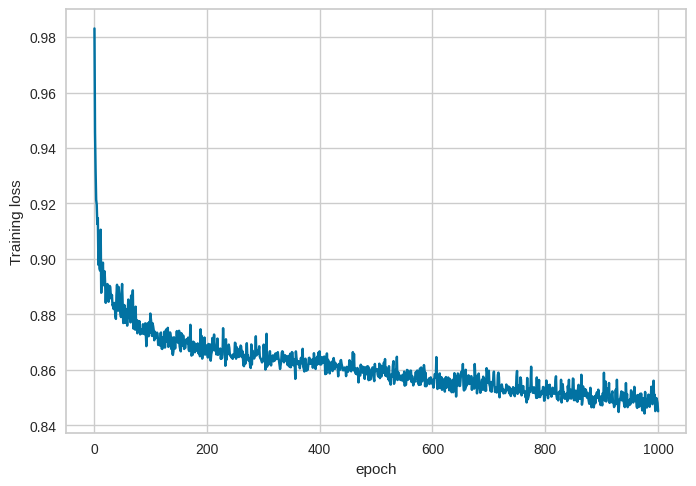

In [128]:
i = np.linspace(1,1000,1000)
plt.plot(i,history['train_loss'])
plt.xlabel('epoch')
plt.ylabel('Training loss')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

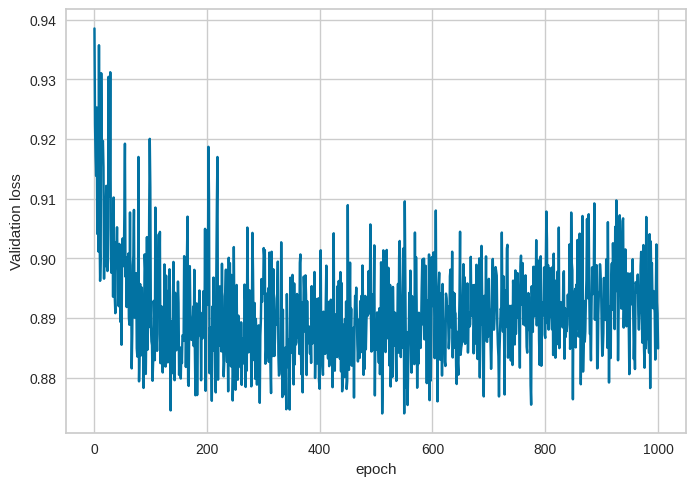

In [129]:
i = np.linspace(1,1000,1000)
plt.plot(i,history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('Validation loss')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

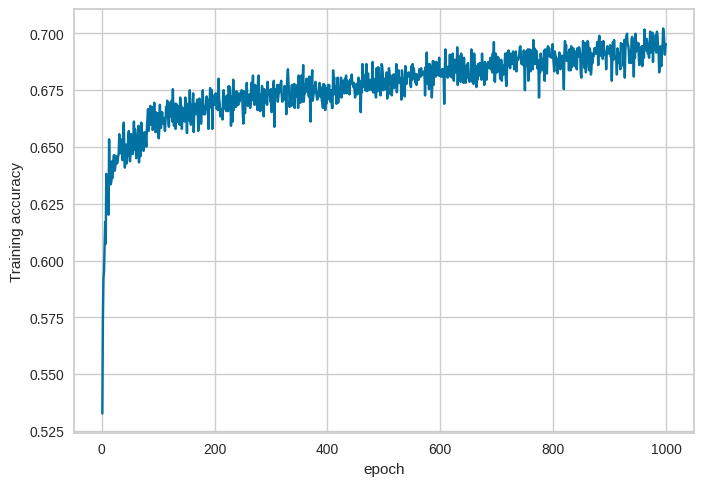

In [130]:
i = np.linspace(1,1000,1000)
plt.plot(i,history['train_acc'])
plt.xlabel('epoch')
plt.ylabel('Training accuracy')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

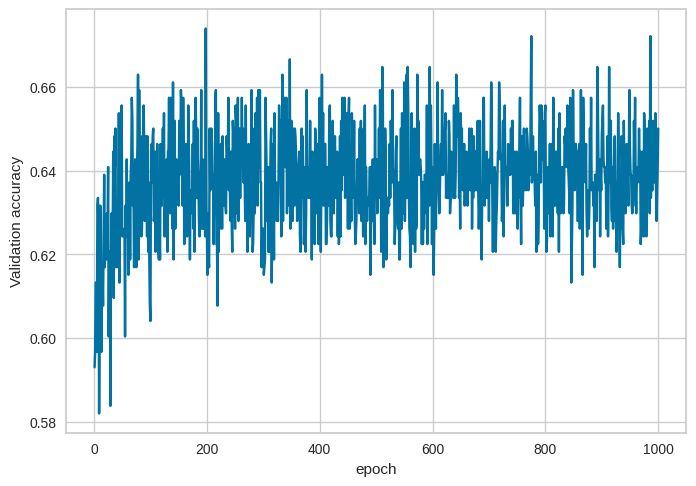

In [131]:
i = np.linspace(1,1000,1000)
plt.plot(i,history['val_acc'])
plt.xlabel('epoch')
plt.ylabel('Validation accuracy')
plt.show